In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from pyriemann.estimation import XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
from utils.feature_extraction import time_domain_features,standard_scaler_transform, wavelet_transform, bandpass_transform, psd_transform
from models.mlmodels import KNN_model_predict, LDA_model_predict, SVM_model_predict, XGB_model_predict, KNNDWN_model_predict
from utils.plots import get_metrics
from utils.dataloader import load_eeg_data_edf, load_eeg_data_gdf, load_eeg_data_mat



Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
def run_pipeline(x_data, y_data, dataset, subject, metrics_results, fs, binary=True):
    # params={'fs':fs, 'dataset':dataset, 'subject': subject, 'pipeline': 'XdawnCovariances -> TangentSpace'}
    # n_components = 2 
    # # take 50/25/25 percent of the data to train/validate/test
    
    # #------ Pipe XdawnCovariances -> TangentSpace
    # cov = XdawnCovariances(n_components)
    # tang =  TangentSpace(metric='riemann')
    # x = cov.fit_transform(x_data, y_data)
    # x = tang.fit_transform(x, y_data)
    # X_train, X_test, Y_train, Y_test = train_test_split( x, y_data, test_size=0.5, random_state=42)


    # #------------------------- KNN ---------------------------------------------------
    # y_true, y_pred, best_score = KNN_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'KNN', params))

    # #------------------------- SVM ---------------------------------------------------
    # y_true, y_pred, best_score = SVM_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'SVM', params))

    # #------------------------- XGB ---------------------------------------------------
    # y_true, y_pred, best_score = XGB_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None, binary=binary)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'XGB', params))




    #------ Pipe time domain features + wavelet
    params={'fs':fs, 'dataset':dataset, 'subject': subject, 'pipeline': 'time domain features -> wavelet'}
    x = time_domain_features(x_data, params['fs'])
    x = wavelet_transform(x, params)
    X_train, X_test, Y_train, Y_test = train_test_split( x, y_data, test_size=0.5, random_state=42)
    
    #------------------------- KNN ---------------------------------------------------
    y_true, y_pred, best_score = KNN_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'KNN', params))

    #------------------------- SVM ---------------------------------------------------
    y_true, y_pred, best_score = SVM_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'SVM', params))

    #------------------------- XGB ---------------------------------------------------
    y_true, y_pred, best_score = XGB_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None, binary=binary)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'XGB', params))





In [5]:
metrics_results = []

## Dataset A

### 1. Training all subjects' data at once

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)
Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


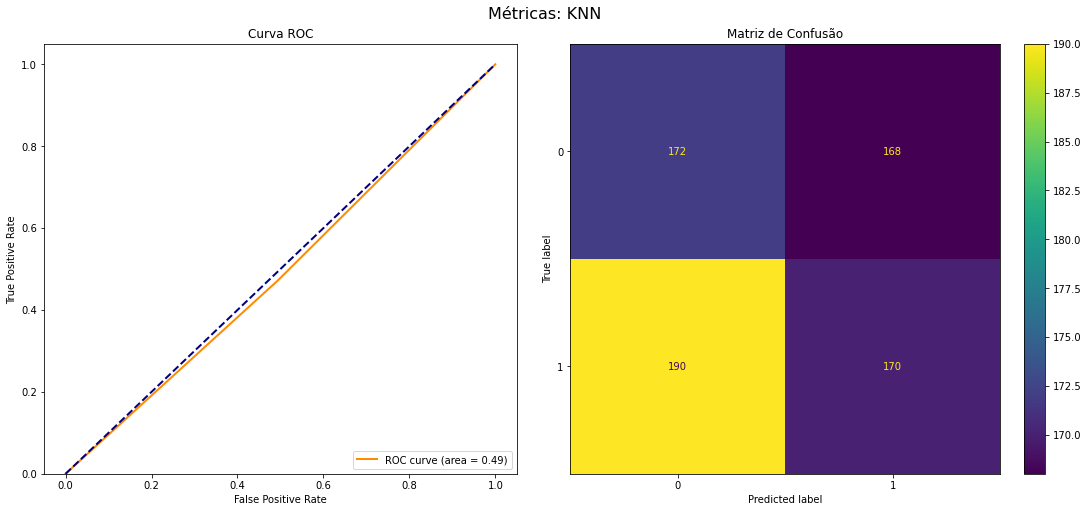

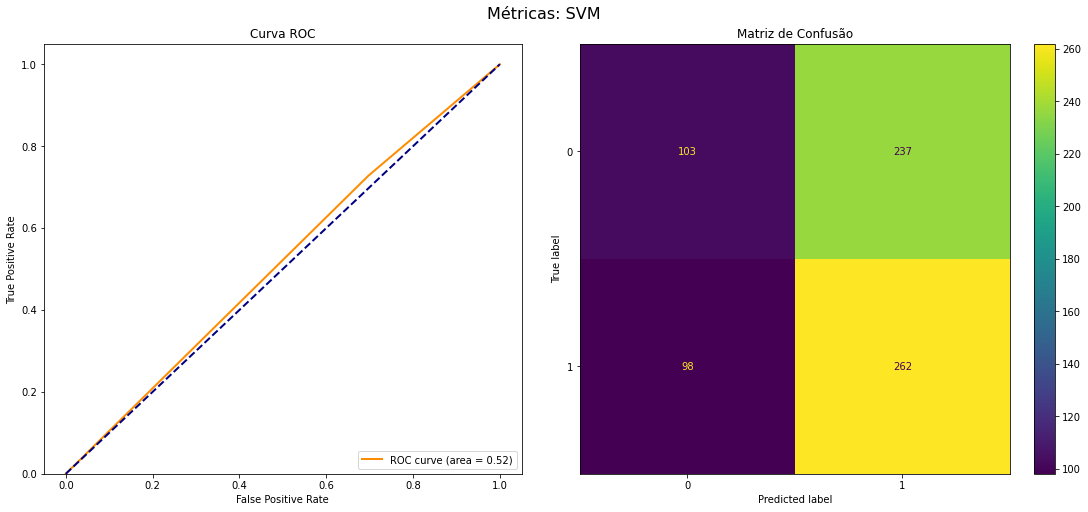

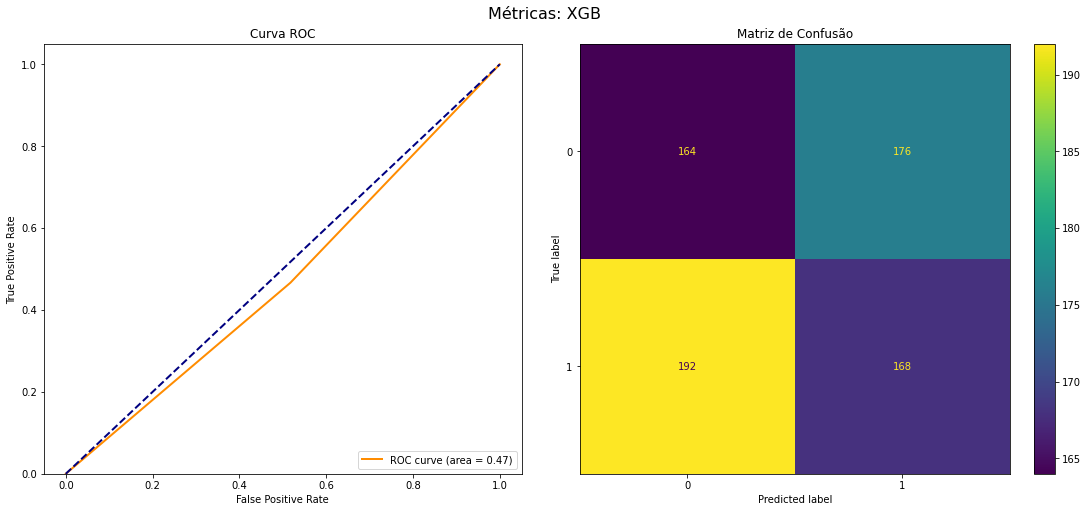

In [6]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
ext = '*.mat'
x_mat,y_mat = load_eeg_data_mat(directory, ext)
nb_classes = np.unique(y_mat).shape[0]
_, channels, samples = np.shape(x_mat)
run_pipeline(x_mat, y_mat, "BCICIV_I", "all", metrics_results, fs=100, binary=True)

### 2. Training the subjects' data separately

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190549)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190473)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190329)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190608)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190602)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\plots.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,7))


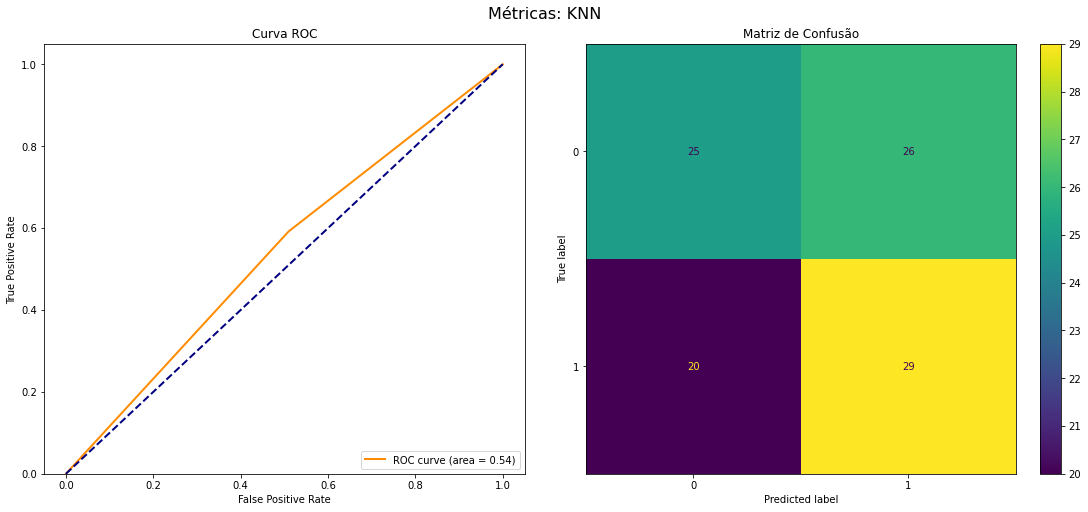

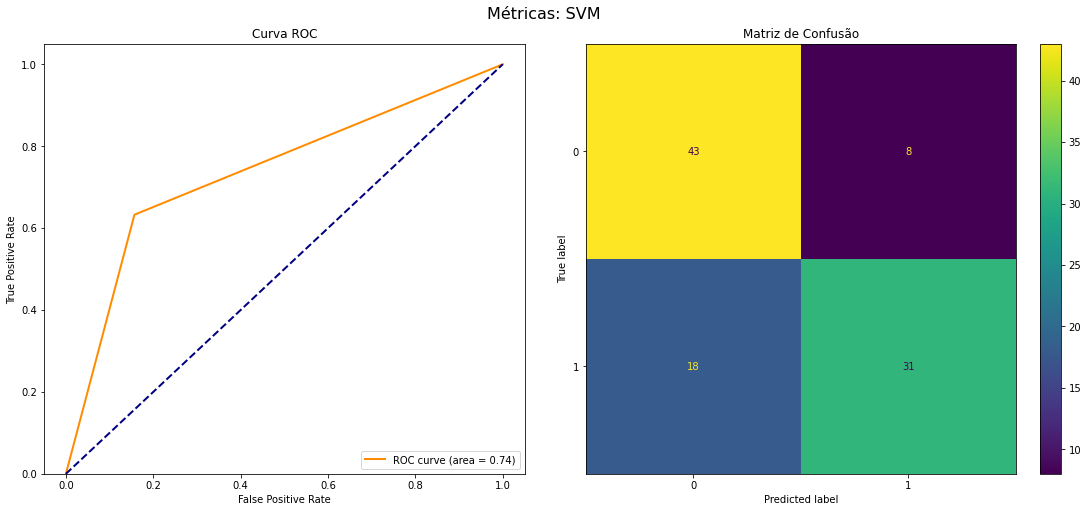

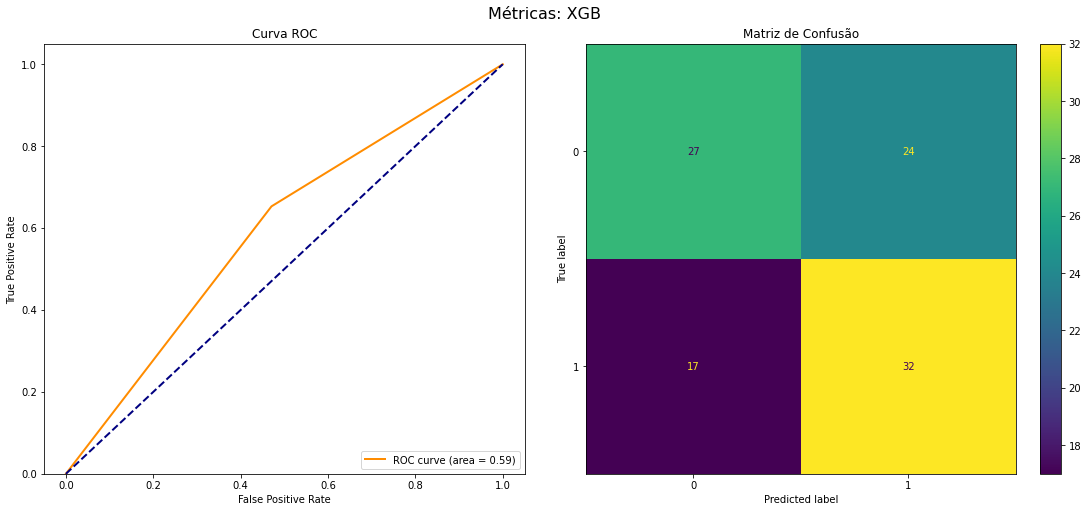

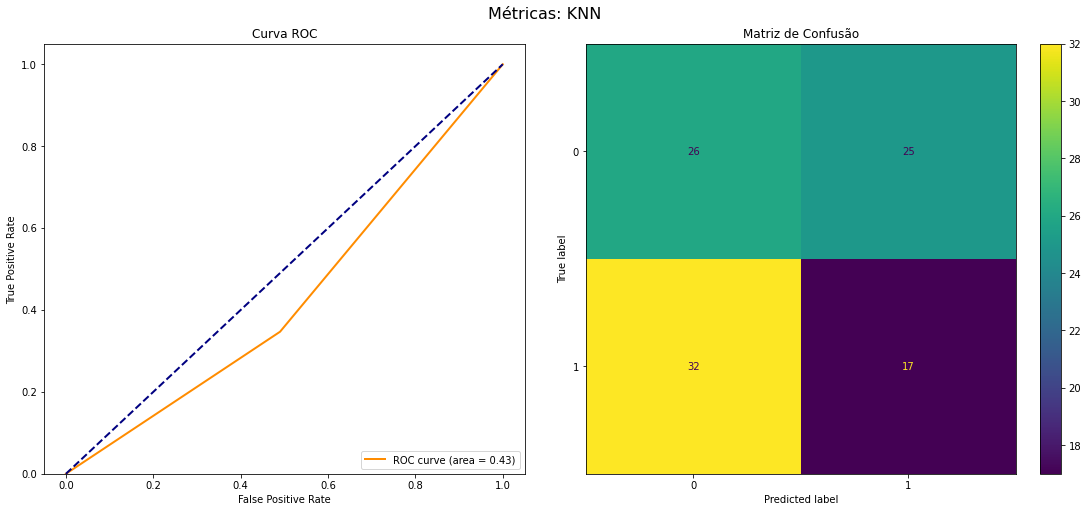

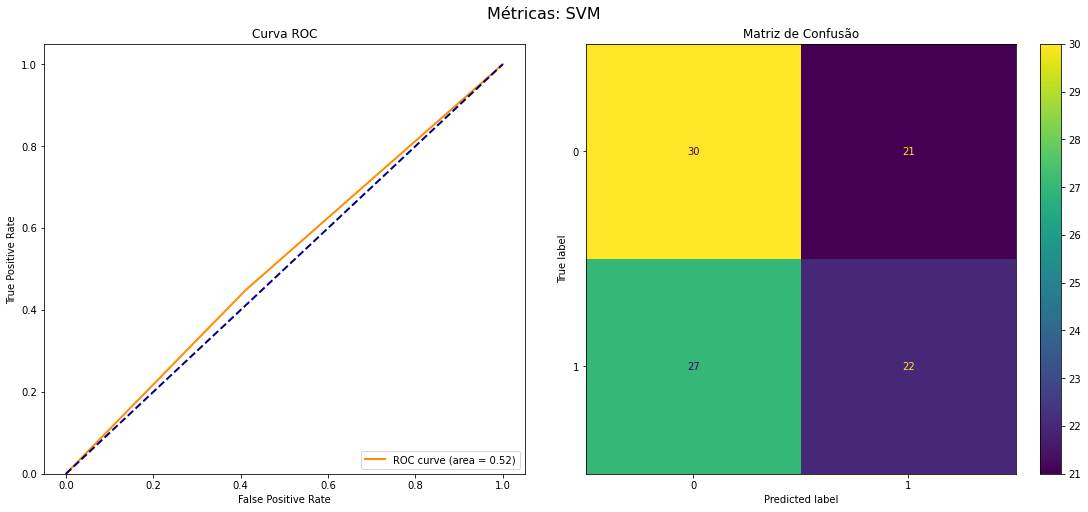

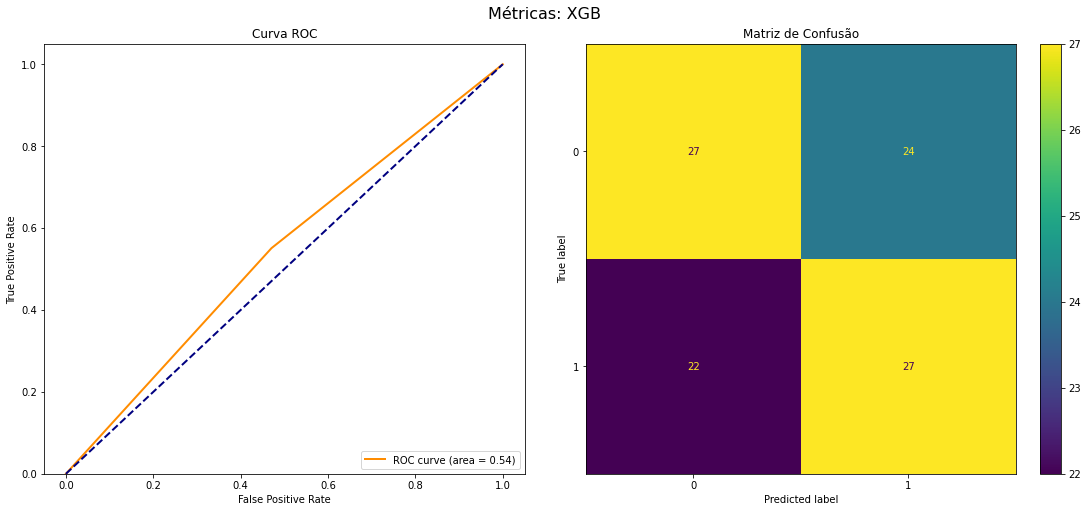

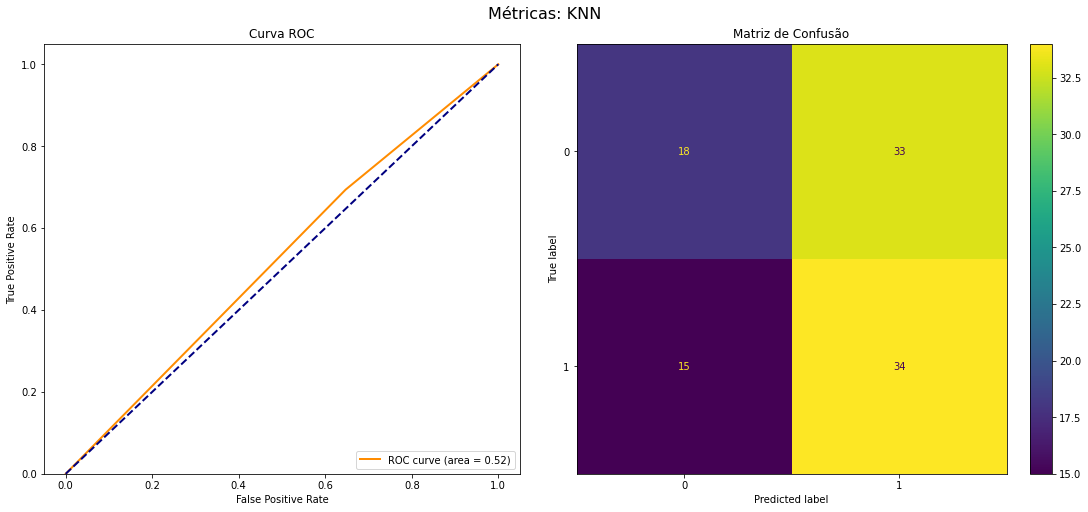

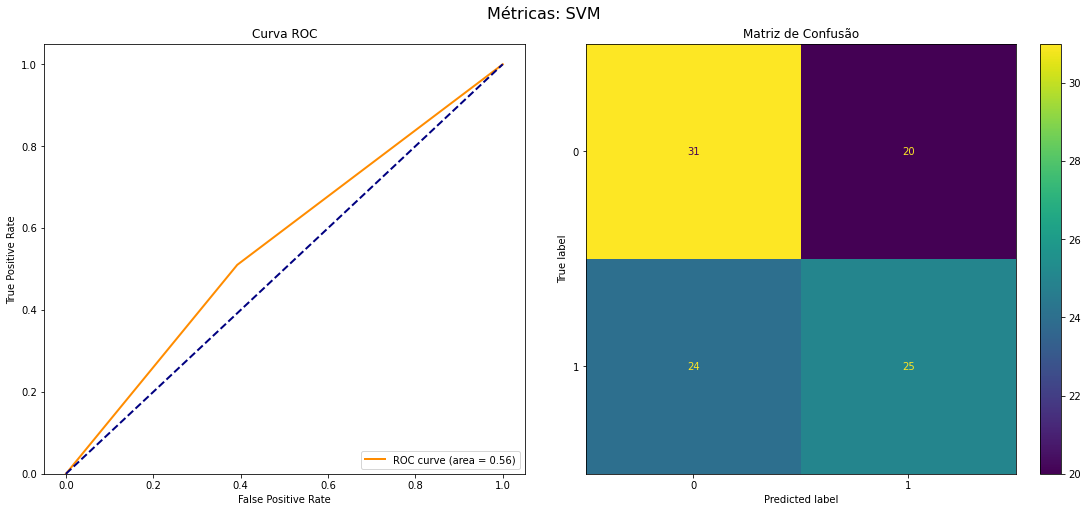

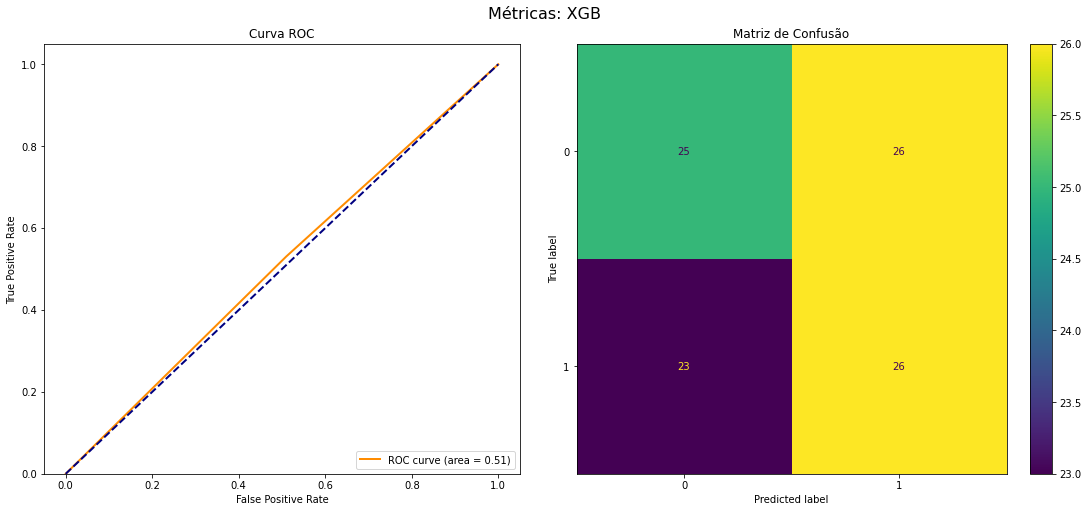

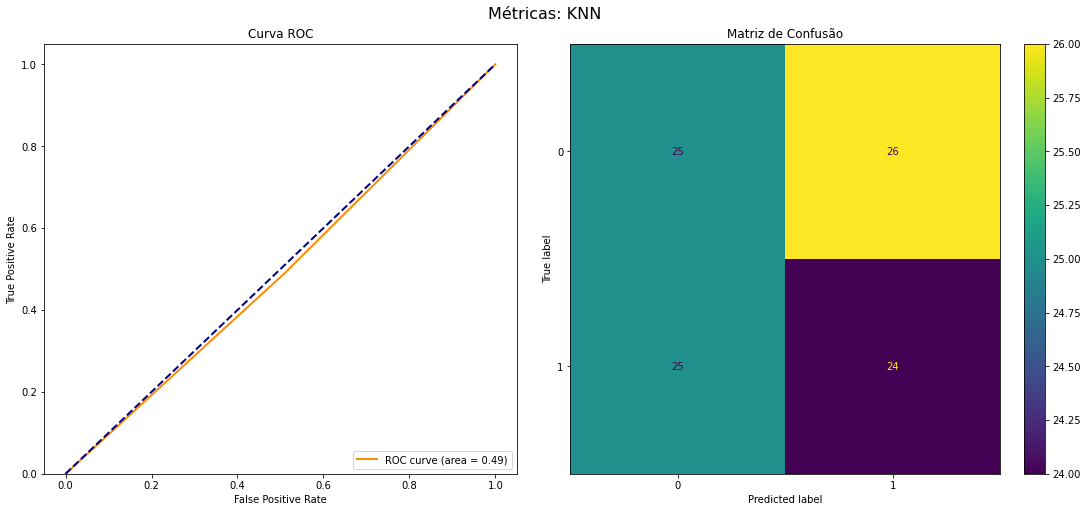

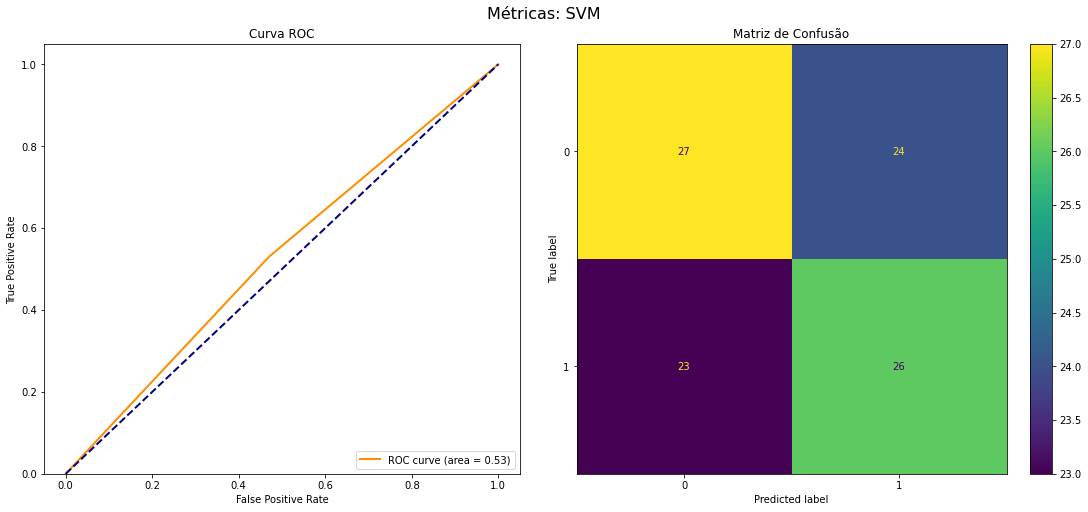

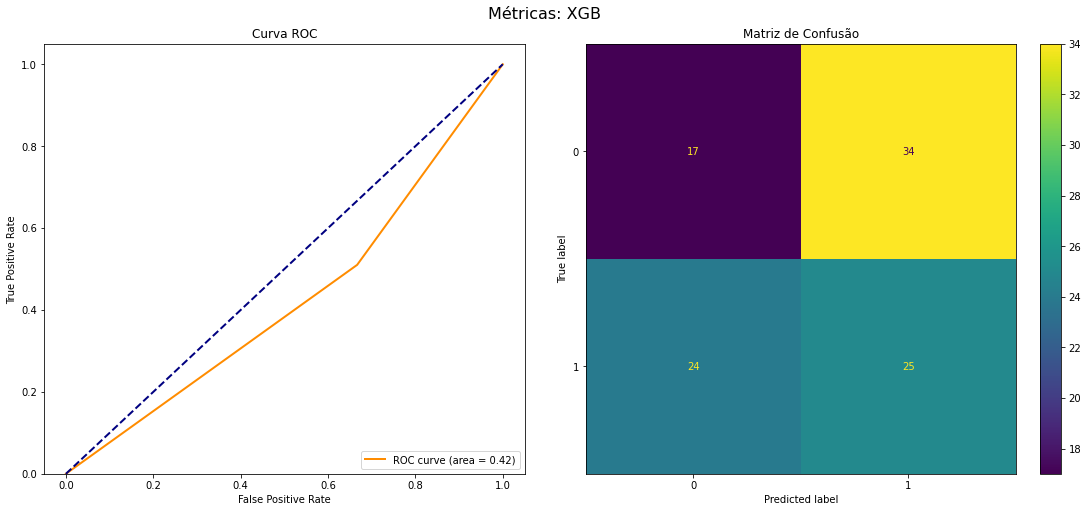

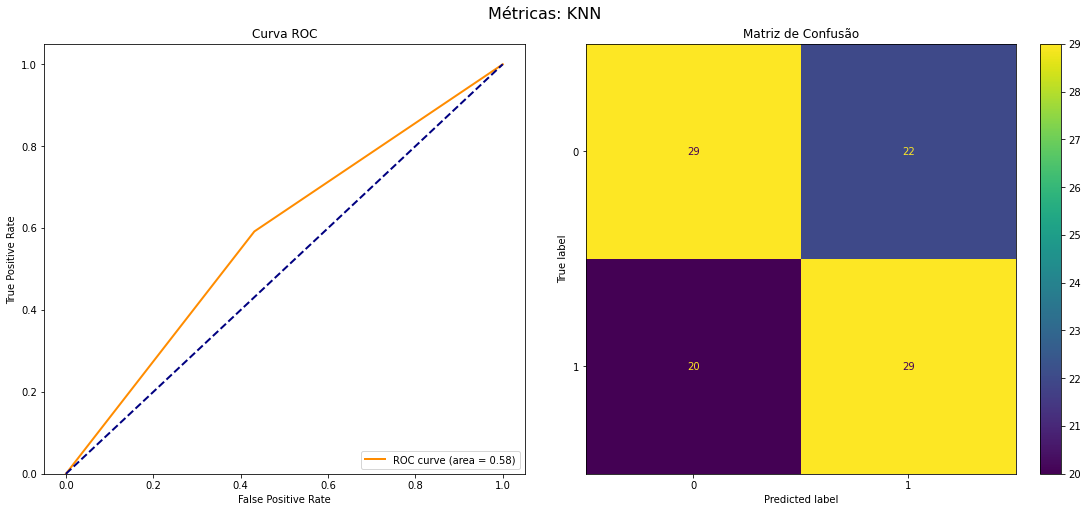

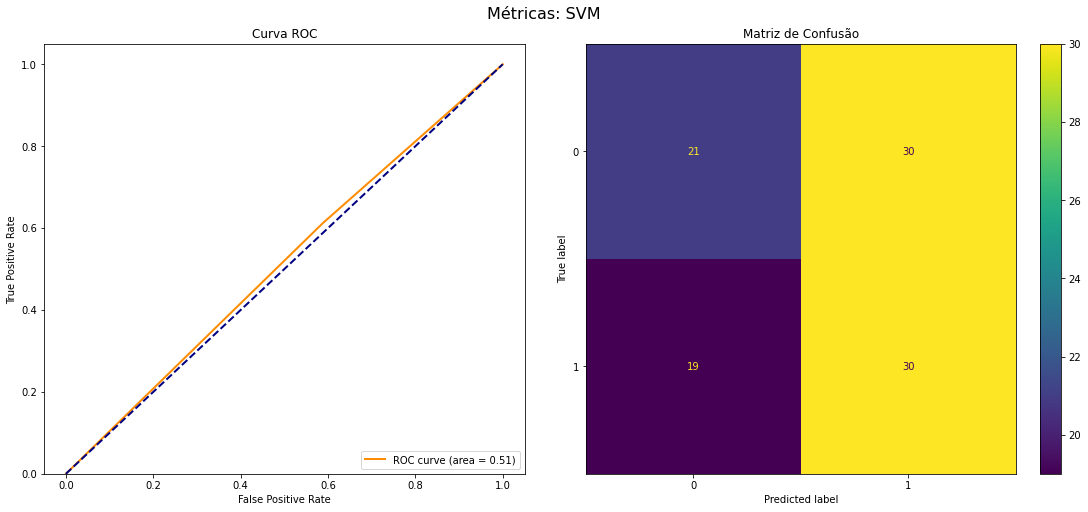

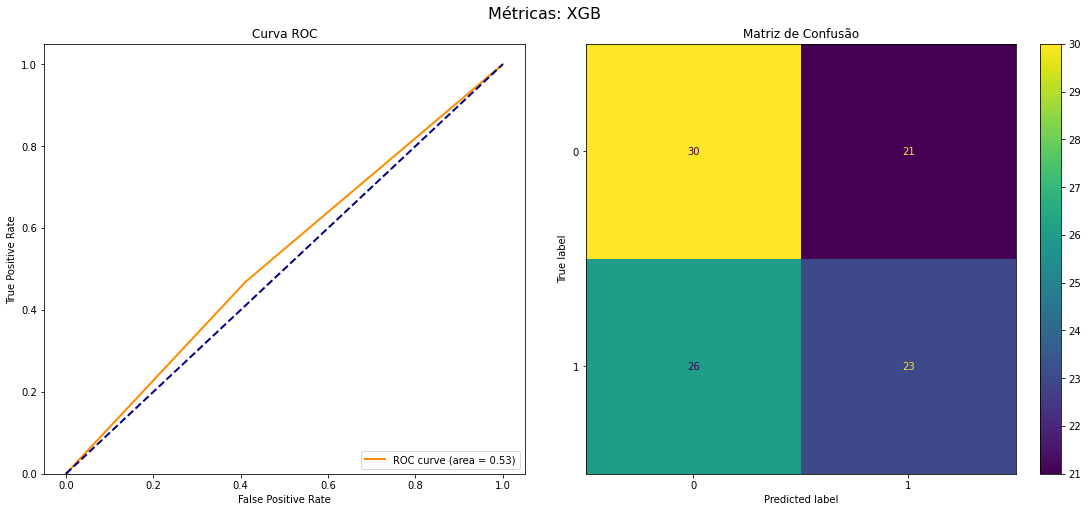

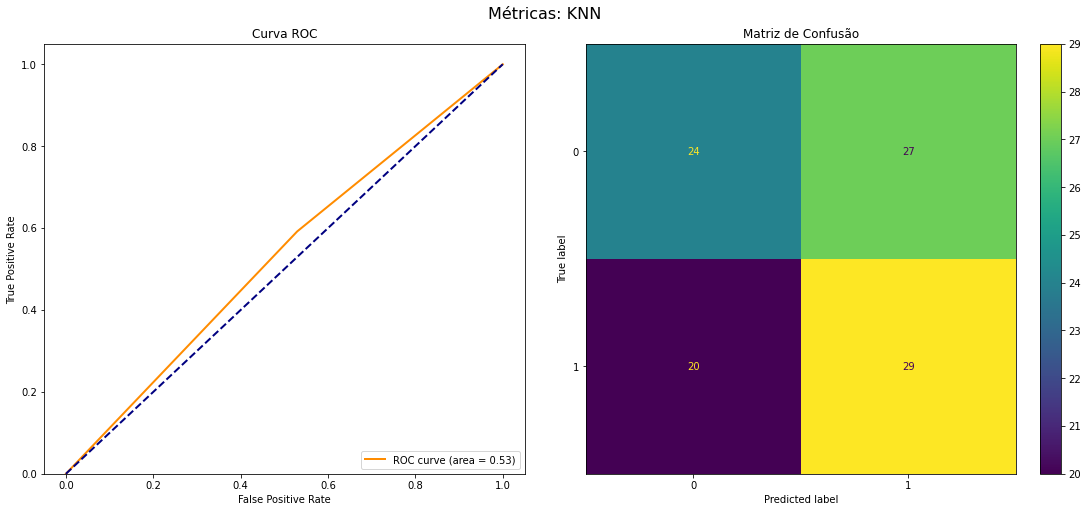

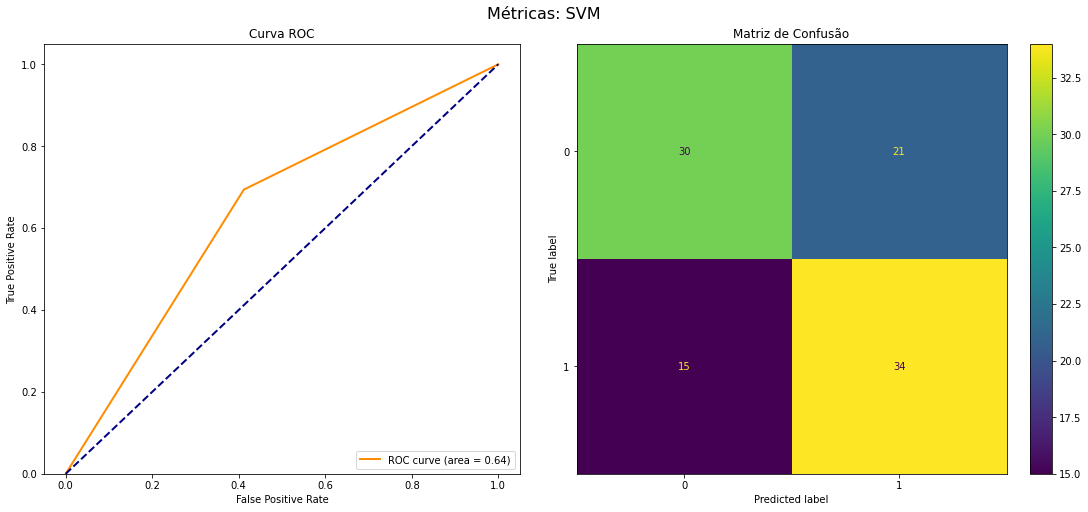

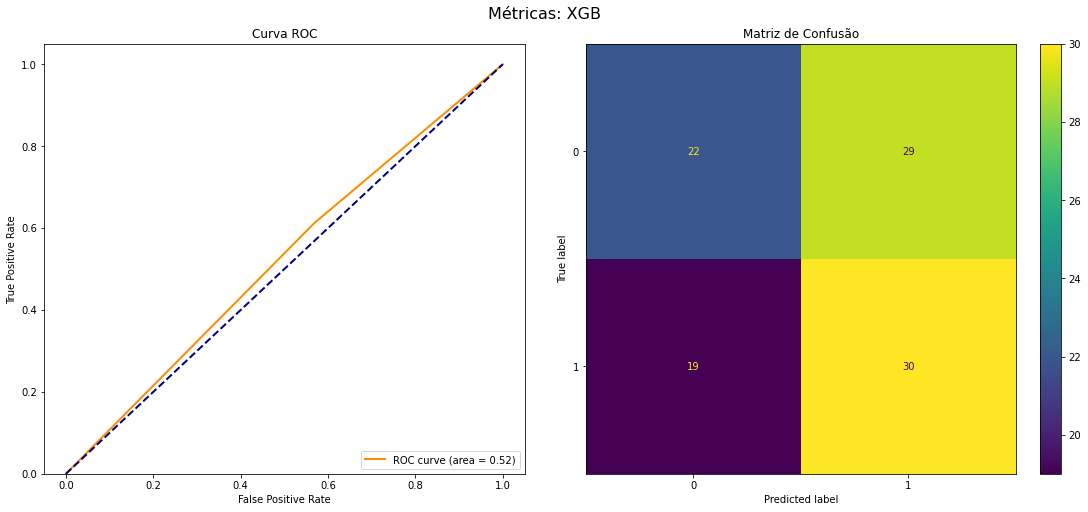

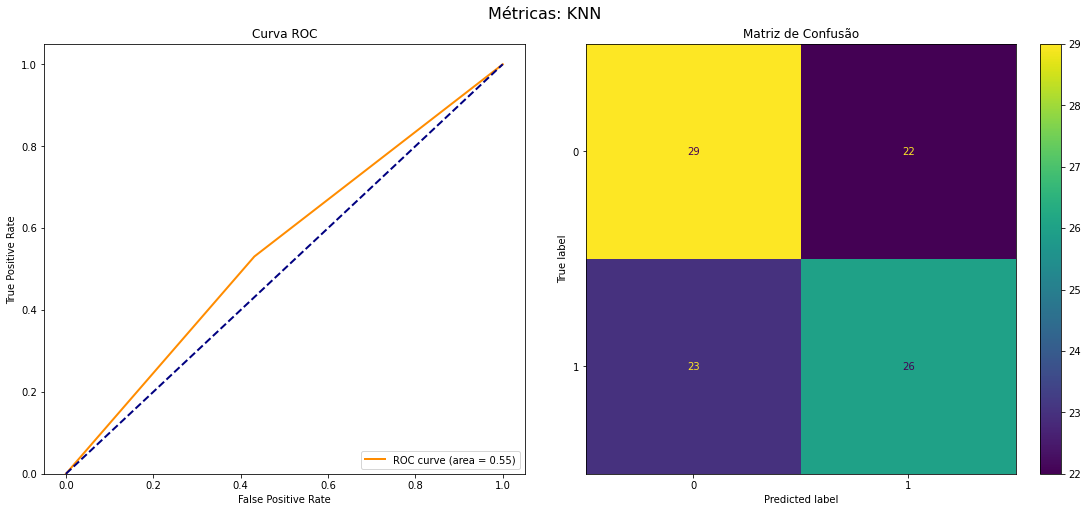

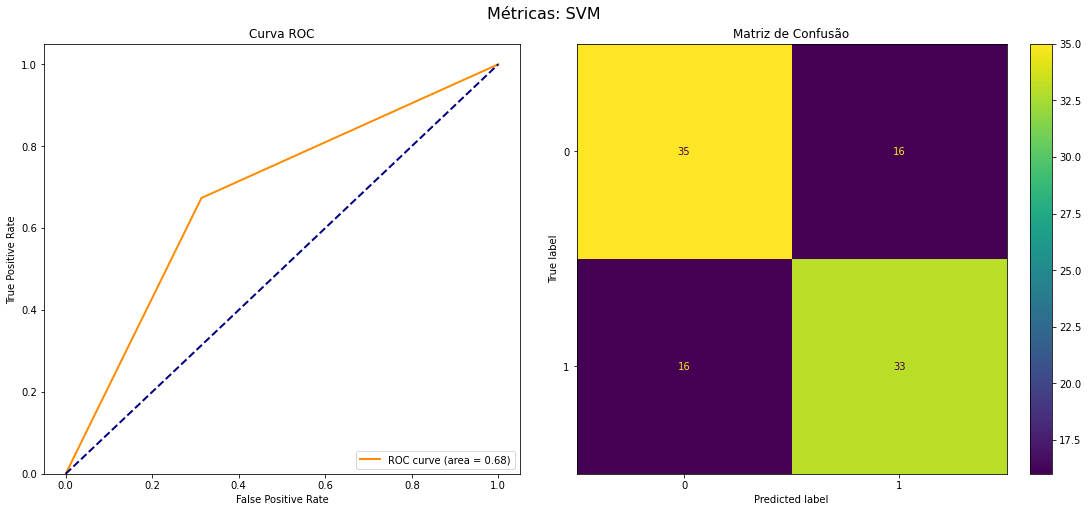

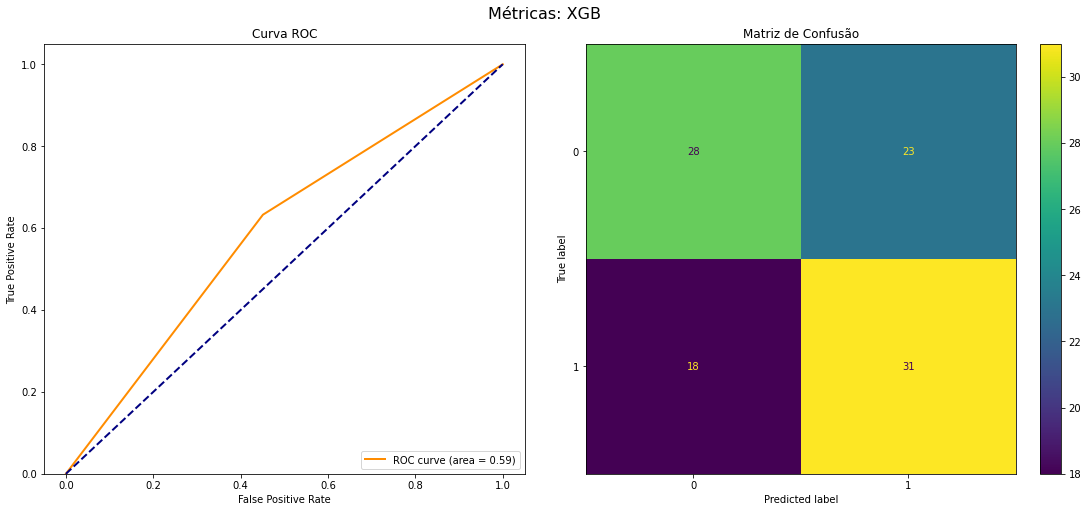

In [7]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
files = [ file.stem for file in Path(directory).glob('*.mat')]
for file in files:
    extension = file + '.mat'
    x_mat,y_mat = load_eeg_data_mat(directory, extension)
    if  np.shape(x_mat)[0] == 0:
        continue
    
    nb_classes = np.unique(y_mat).shape[0]
    _, channels, samples = np.shape(x_mat)
    run_pipeline(x_mat, y_mat, "BCICIV_I", file, metrics_results, fs=100, binary=True)

## Dataset B

### 1. Training all subjects' data at once

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 201 original time poin

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


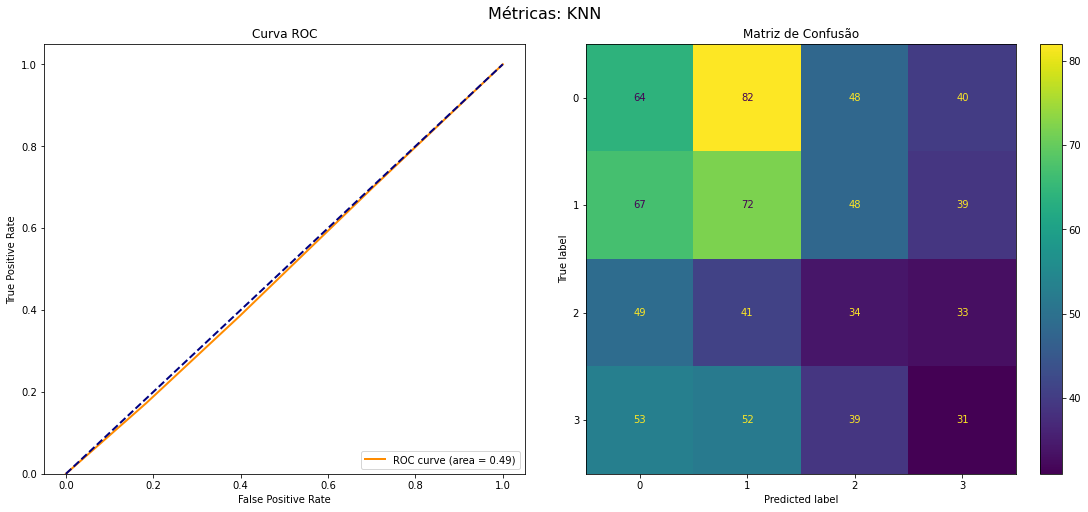

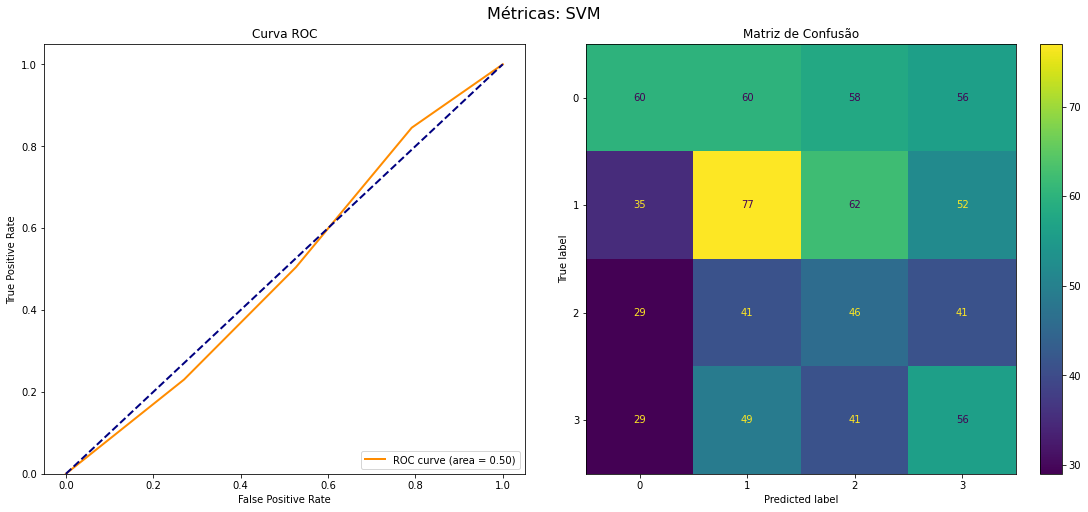

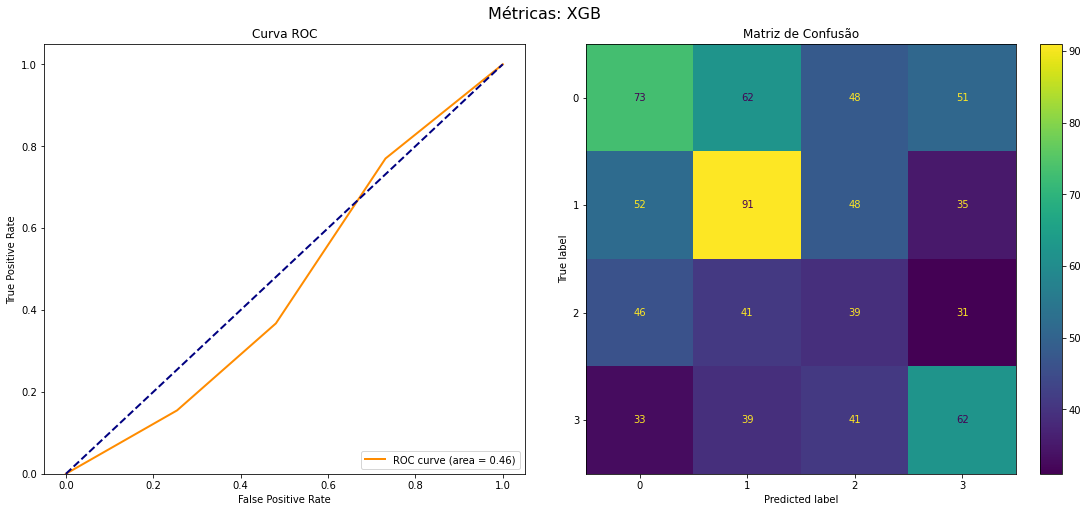

In [8]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_2a_gdf-dataset/' 
extension = '*T.gdf'


x_train_BCICIV, y_train_BCICIV = load_eeg_data_gdf(directory, extension)
nb_classes = np.unique(y_train_BCICIV).shape[0]
run_pipeline(x_train_BCICIV, y_train_BCICIV, "BCICIV_II", 'all', metrics_results, fs=250, binary=False)

### 2. Training the subjects' data separately

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 201 original time poin

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


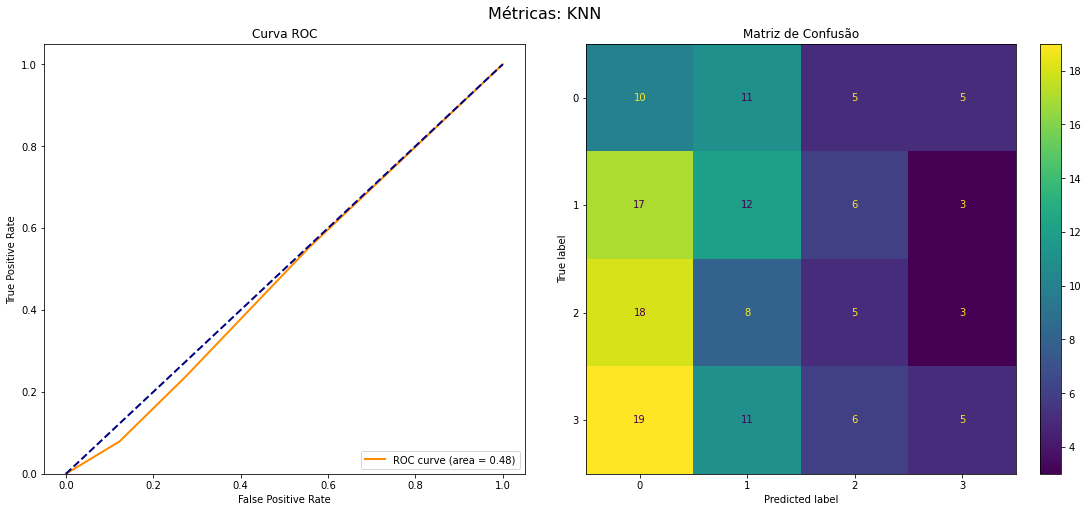

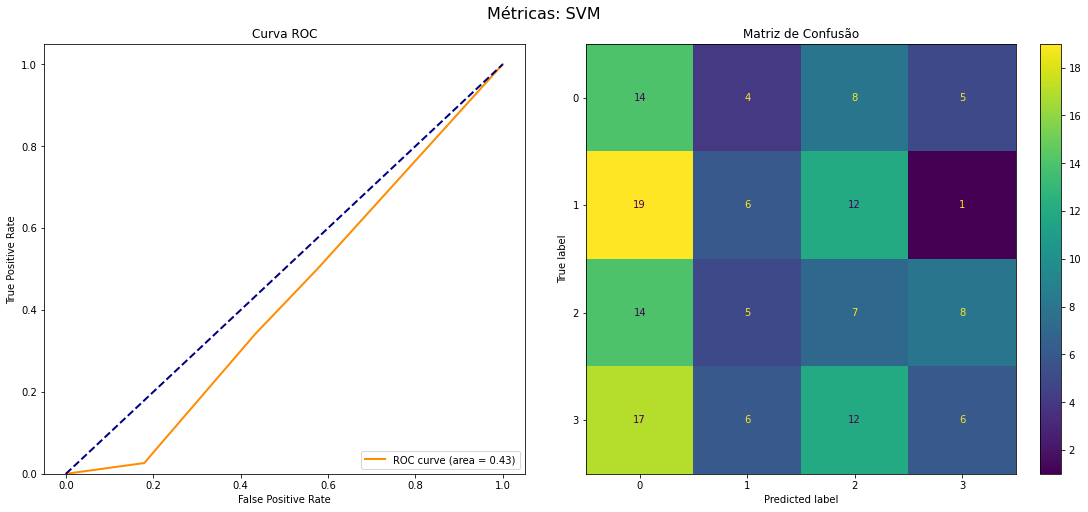

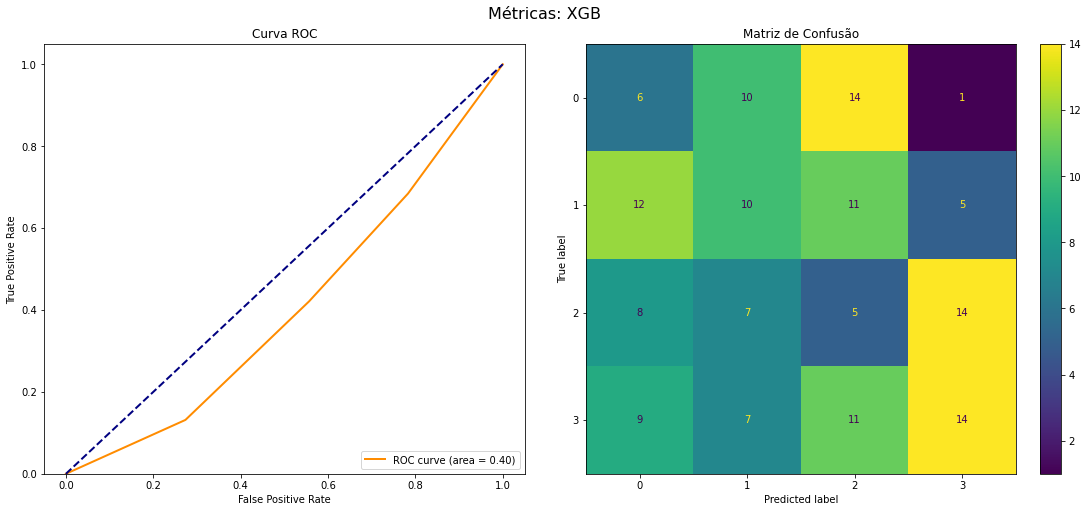

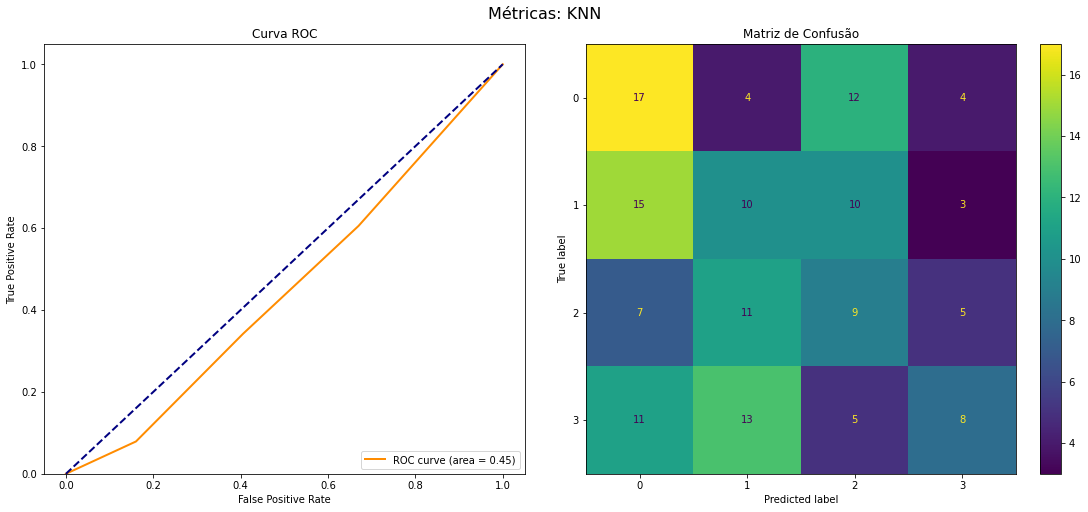

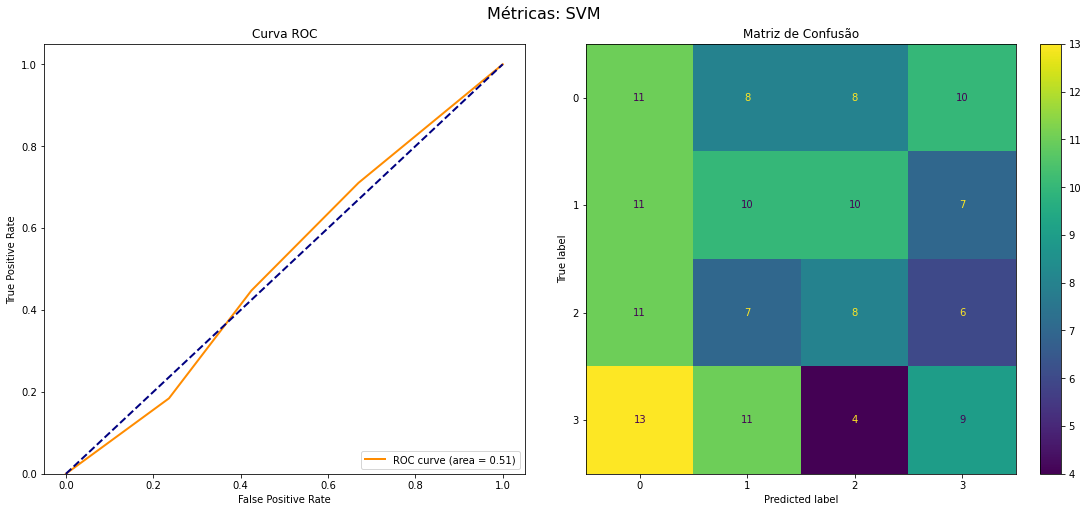

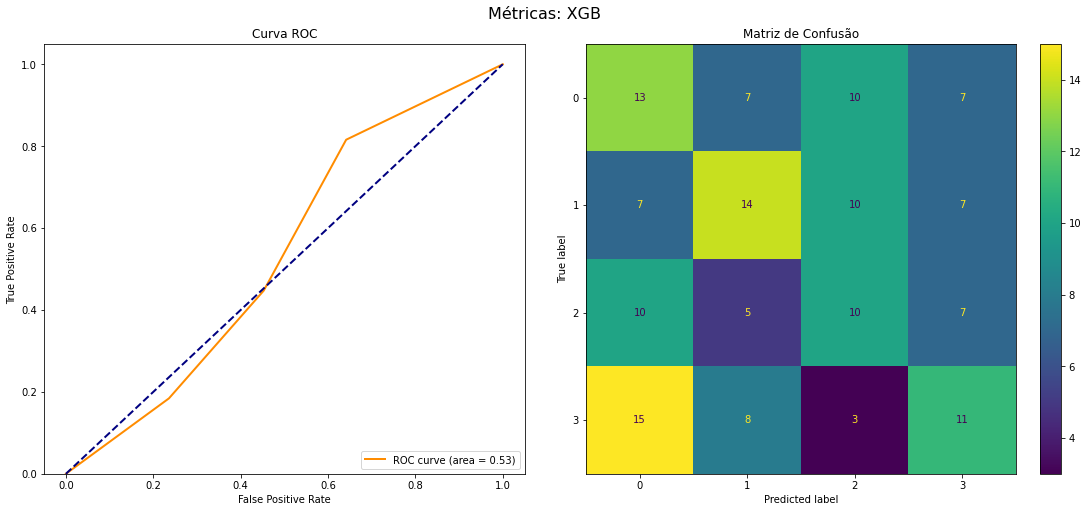

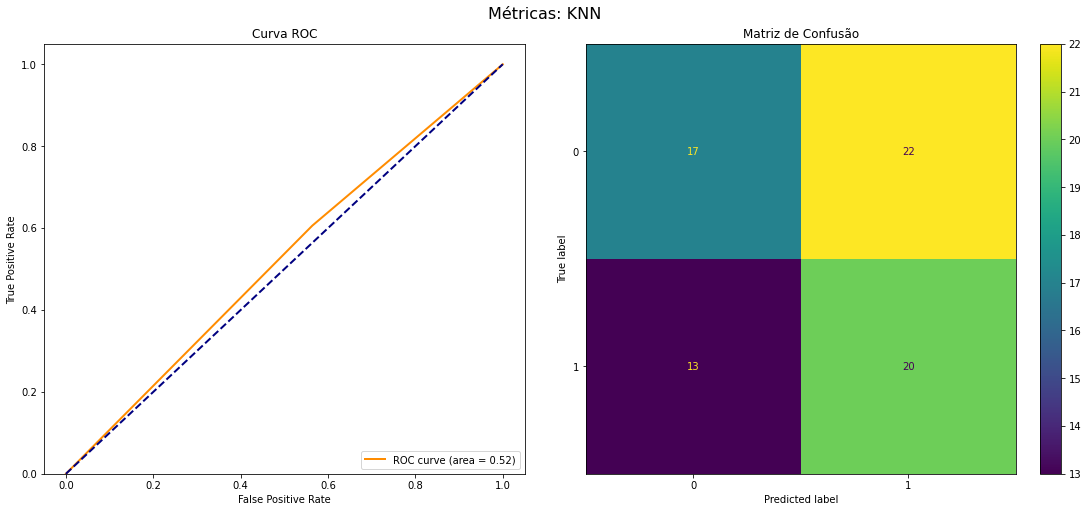

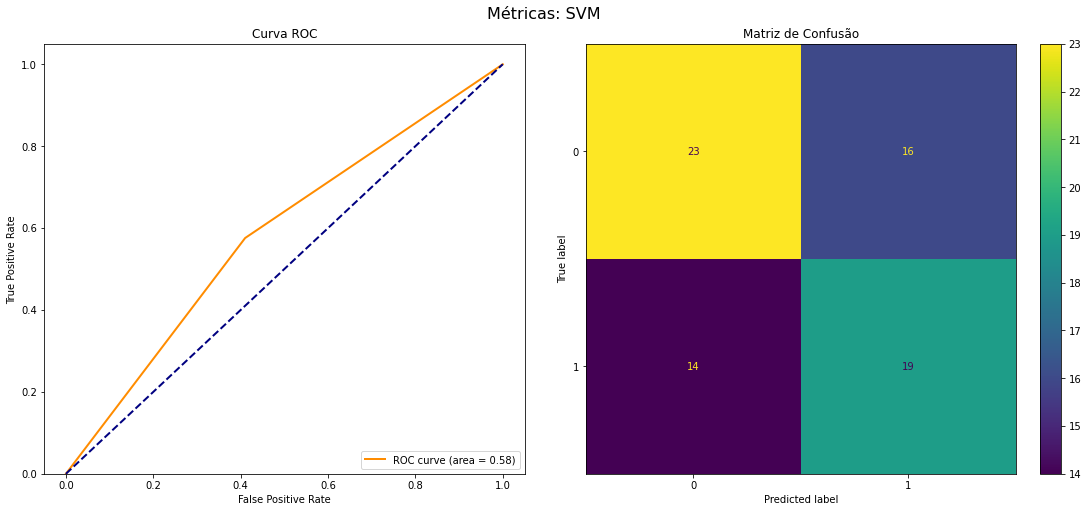

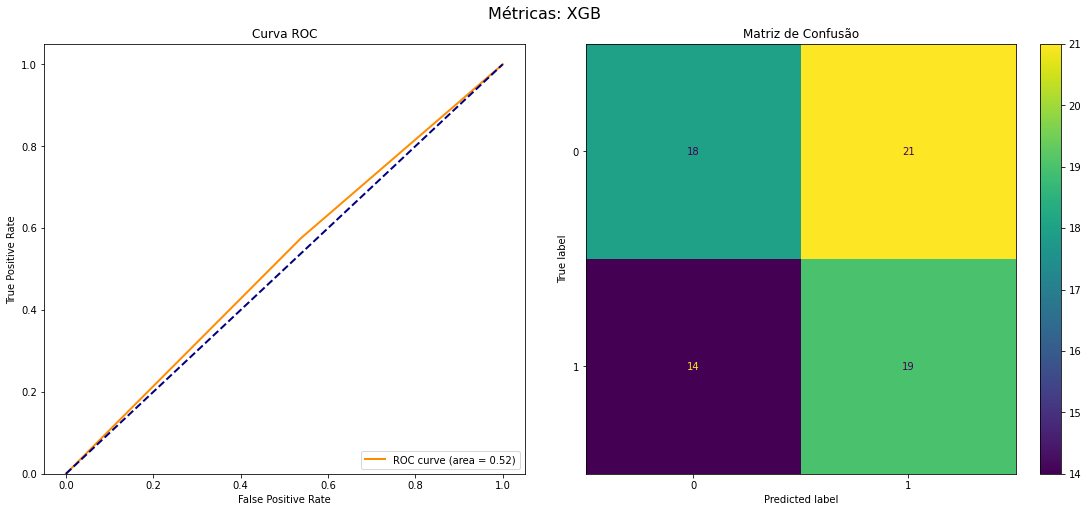

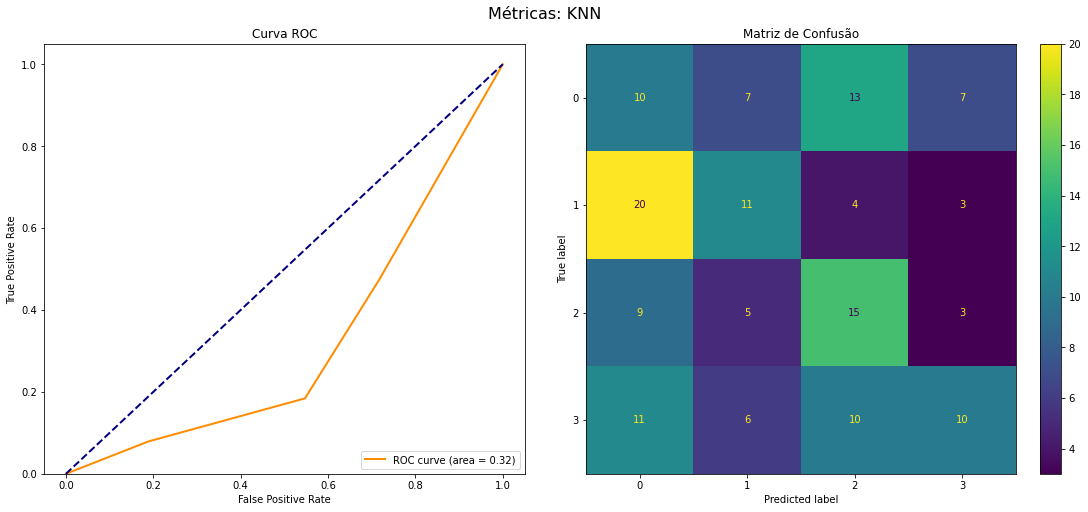

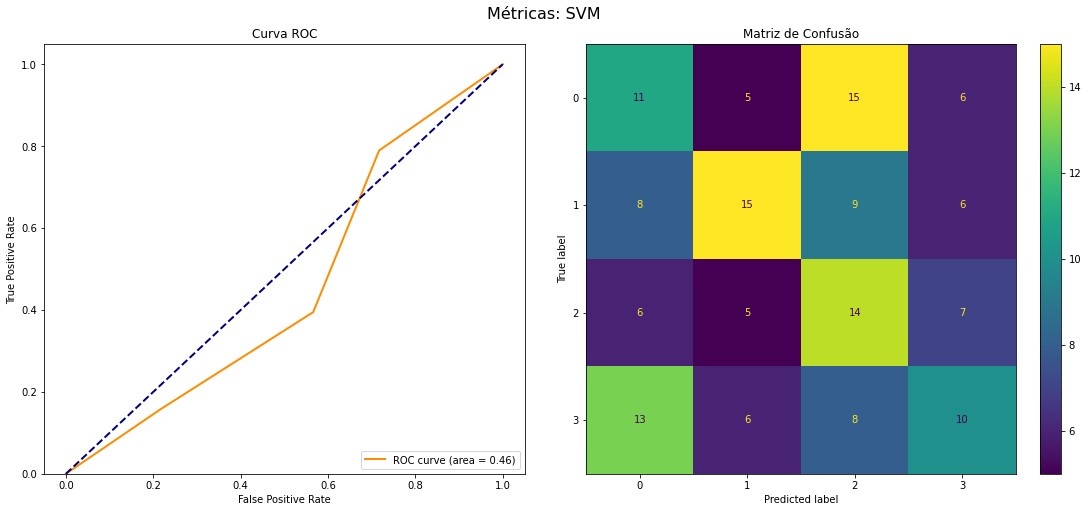

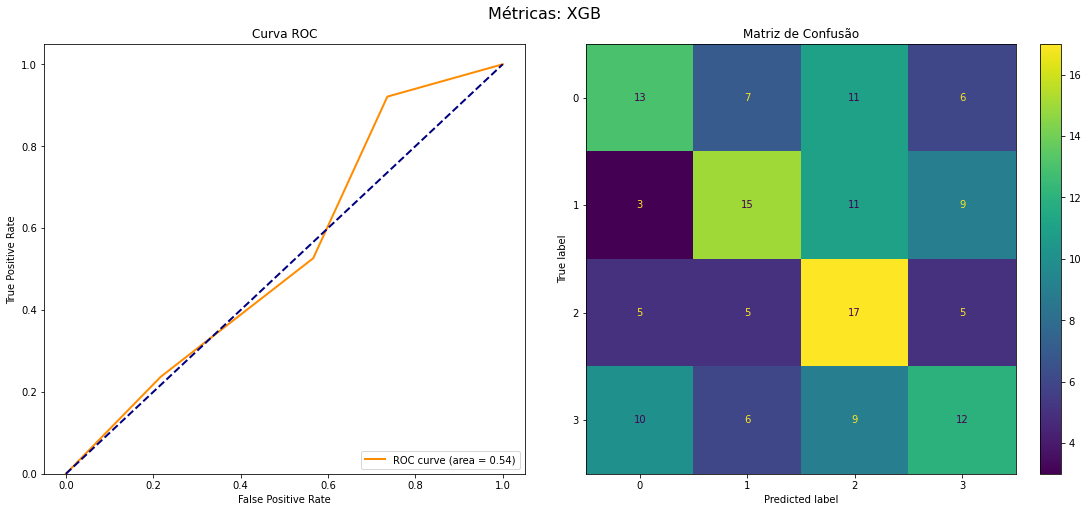

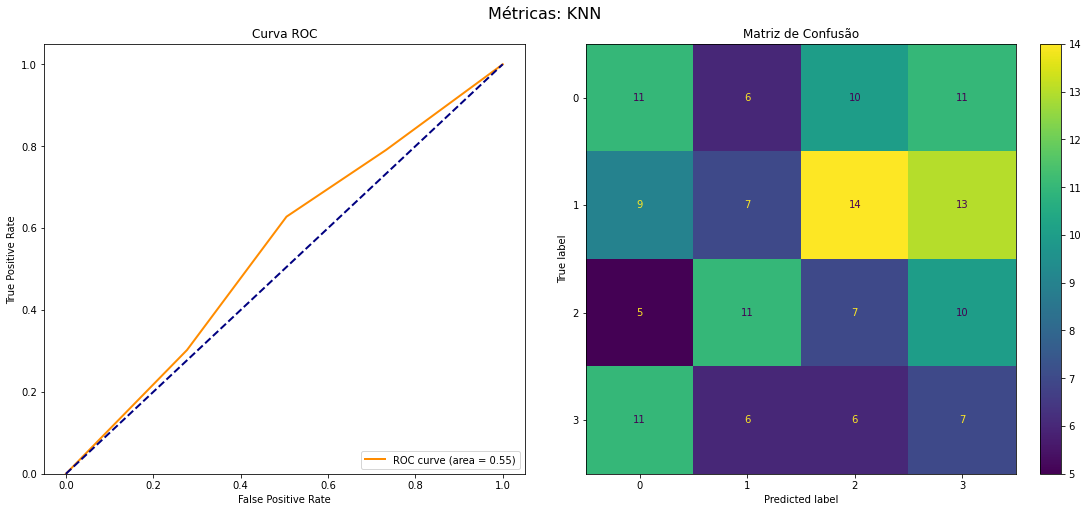

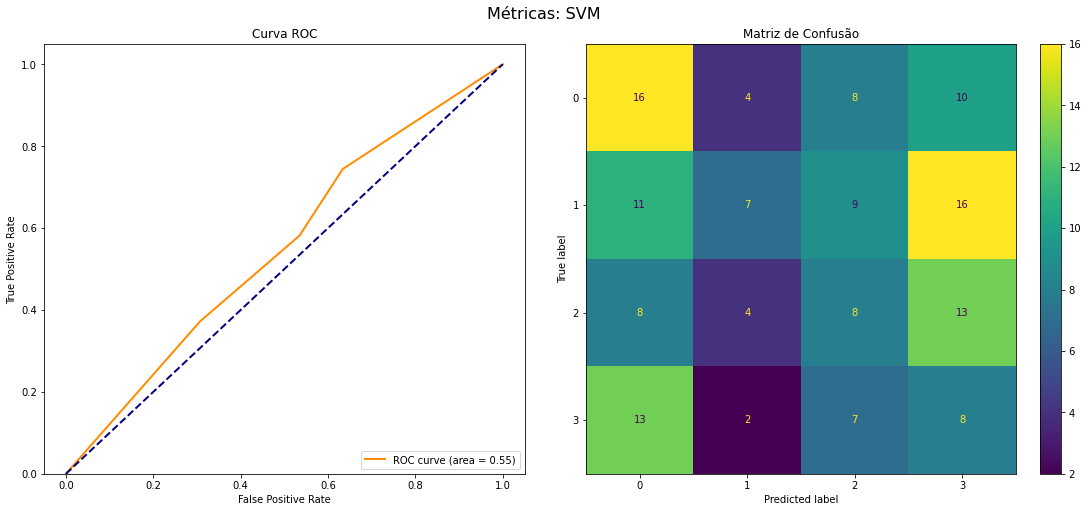

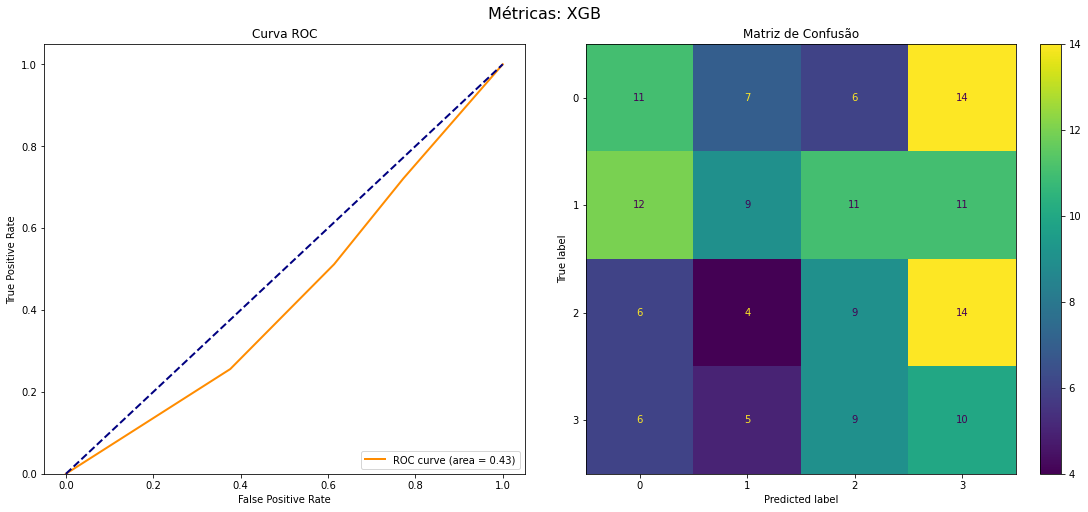

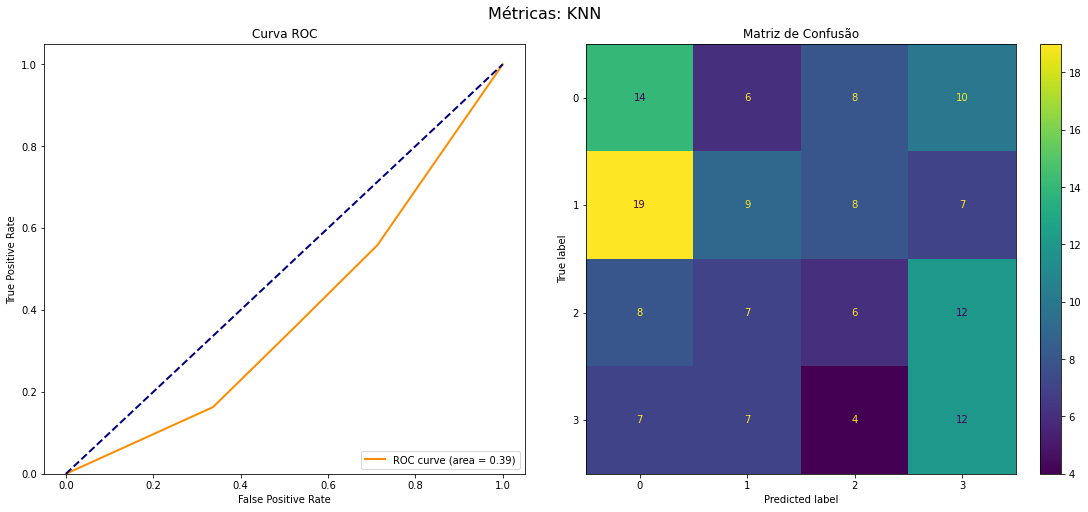

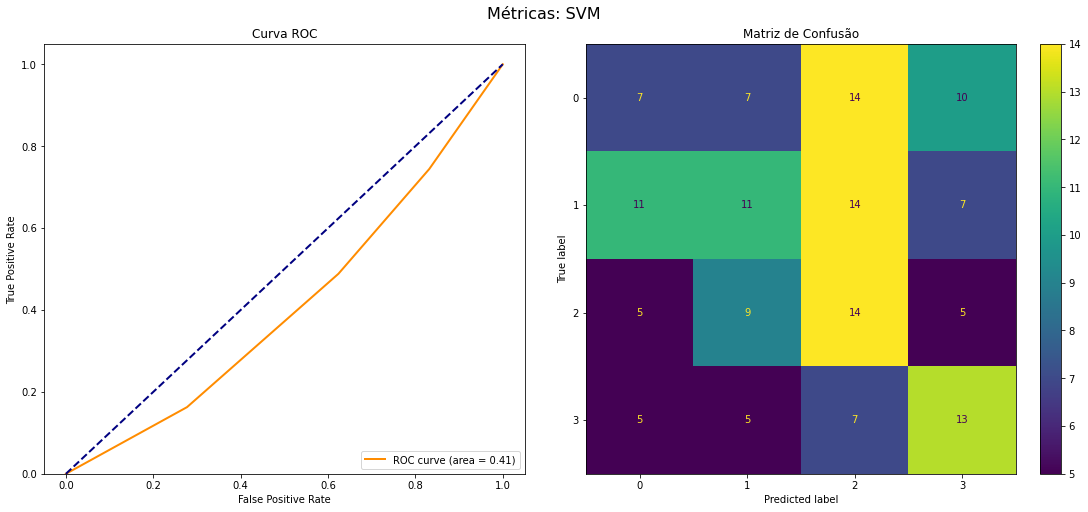

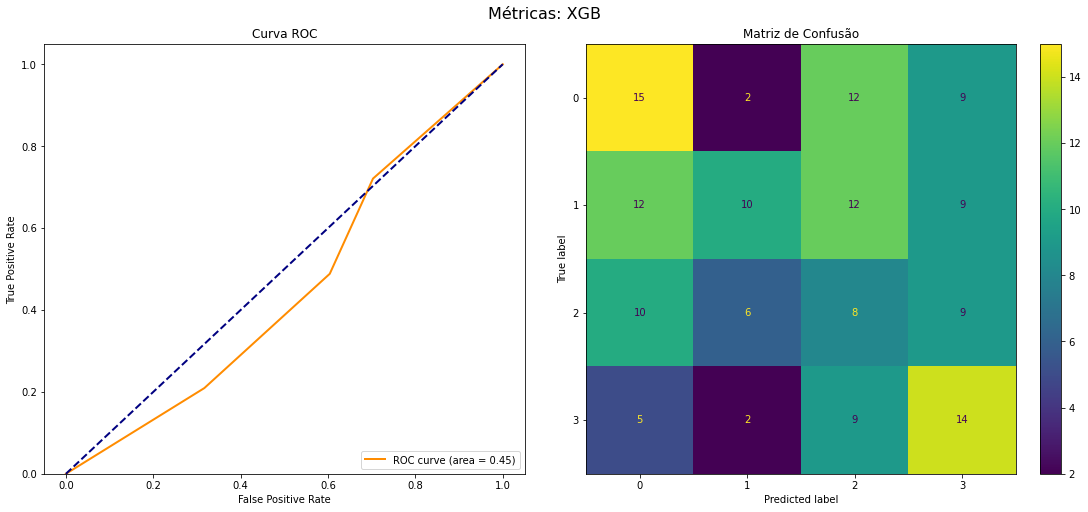

In [9]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_2a_gdf-dataset/'
files = [ file.stem for file in Path(directory).glob('*T.gdf')]
for file in files:
    extension = file + '.gdf'
    x_train_BCICIV, y_train_BCICIV = load_eeg_data_gdf(directory, extension)
    binary = len(np.unique(y_train_BCICIV)) == 2
    run_pipeline(x_train_BCICIV, y_train_BCICIV, "BCICIV_II", file, metrics_results, fs=250, binary=binary)

## Dataset C

### 1. Training all subjects' data at once

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


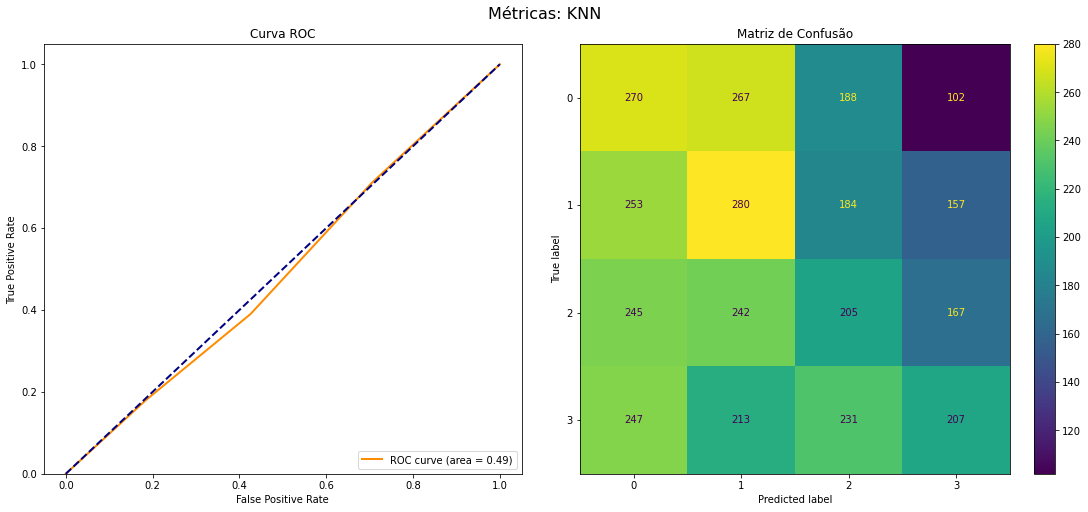

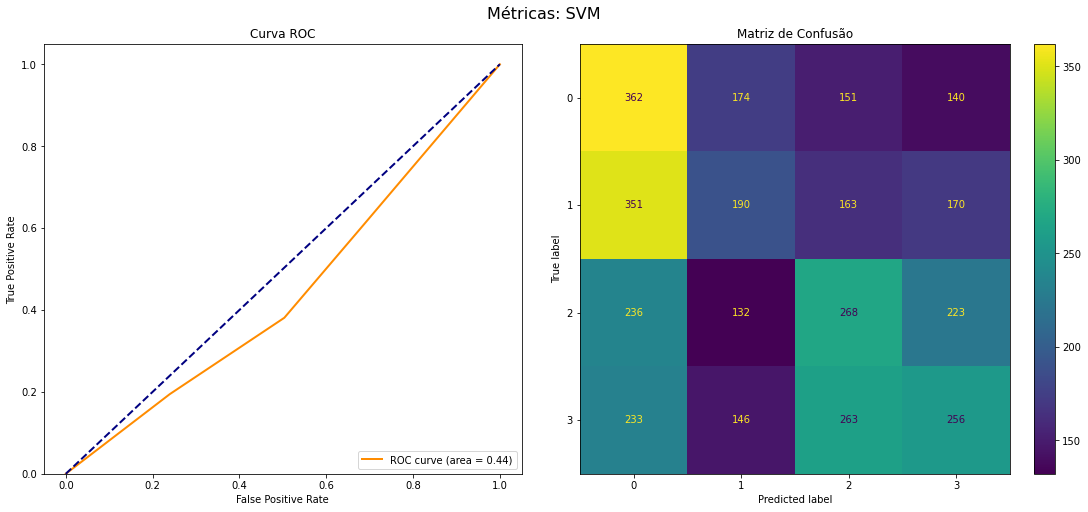

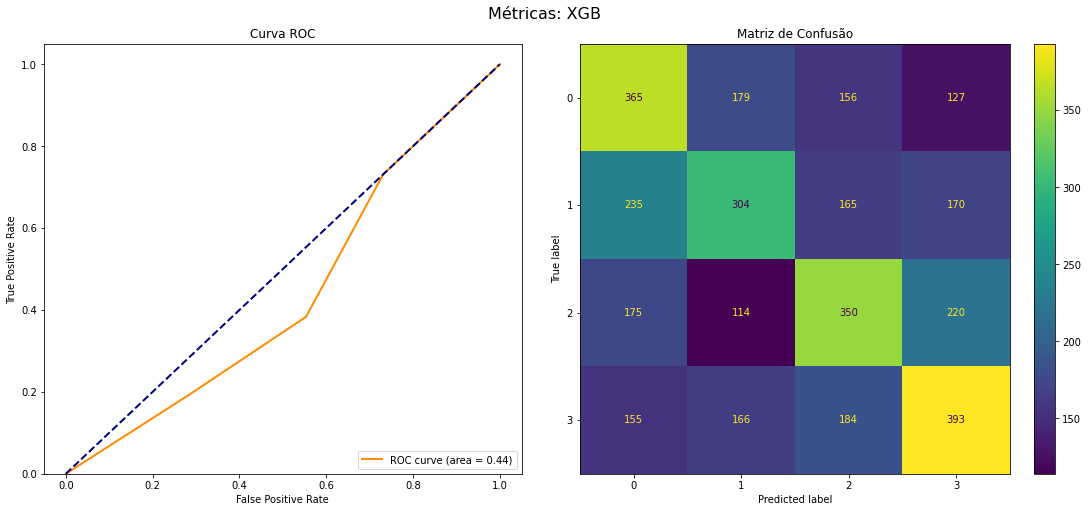

In [10]:
directory = 'C:/Users/Maods/Documents/TCC/data/eeg-motor-movementimagery-dataset/files/'
extension = '**/*.edf'

x_movementimagery, y_movementimagery  = load_eeg_data_edf(directory, extension)
run_pipeline(x_movementimagery, y_movementimagery, "eeg-mi", 'all', metrics_results, fs=160, binary=False)

### 2. Training the subjects' data separately

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S002\S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S002\S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S003\S003R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S003\S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S004\S004R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S004\S004R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S005\S005R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S005\S005R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S007\S007R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S007\S007R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S008\S008R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S008\S008R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S009\S009R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped


c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\plots.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,7))


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S009\S009R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S009\S009R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S010\S010R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S010\S010R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S011\S011R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S011\S011R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S014\S014R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S014\S014R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S015\S015R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S015\S015R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S017\S017R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S017\S017R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S018\S018R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S018\S018R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S020\S020R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S020\S020R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S021\S021R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S021\S021R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S022\S022R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S022\S022R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S023\S023R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S023\S023R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S024\S024R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S024\S024R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S025\S025R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S025\S025R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S026\S026R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S026\S026R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S027\S027R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S027\S027R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S028\S028R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S028\S028R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S029\S029R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S029\S029R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S030\S030R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S030\S030R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S031\S031R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S031\S031R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S032\S032R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S032\S032R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S033\S033R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S033\S033R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S034\S034R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S034\S034R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S035\S035R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S035\S035R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S037\S037R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S037\S037R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S038\S038R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S038\S038R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S039\S039R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S039\S039R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S041\S041R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S041\S041R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S042\S042R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S042\S042R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S043\S043R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S043\S043R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S051\S051R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S051\S051R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S052\S052R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S052\S052R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


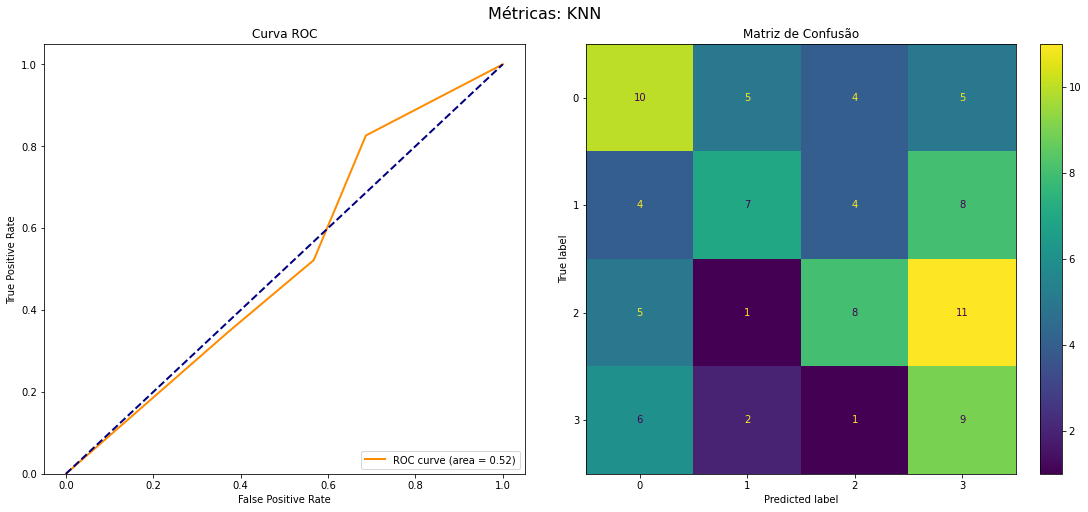

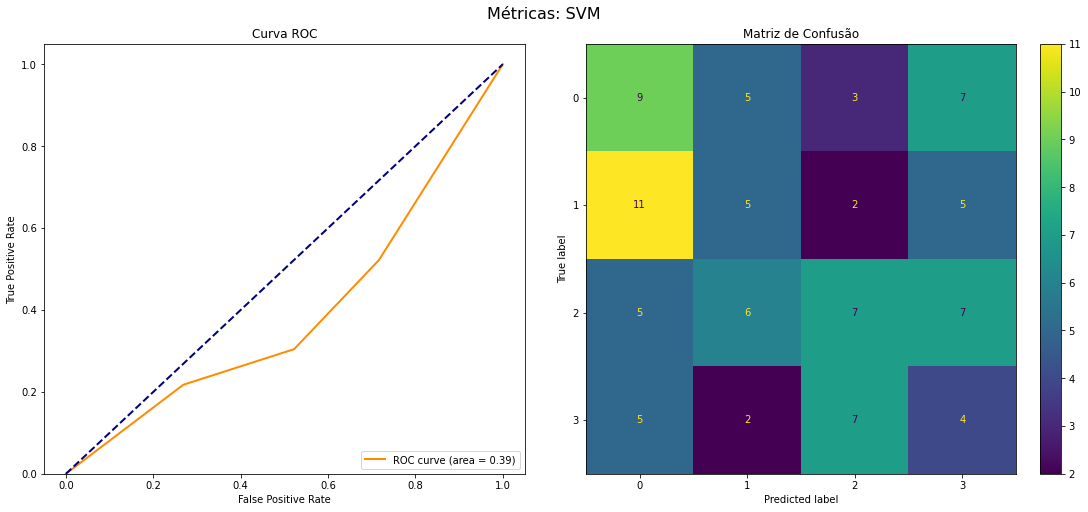

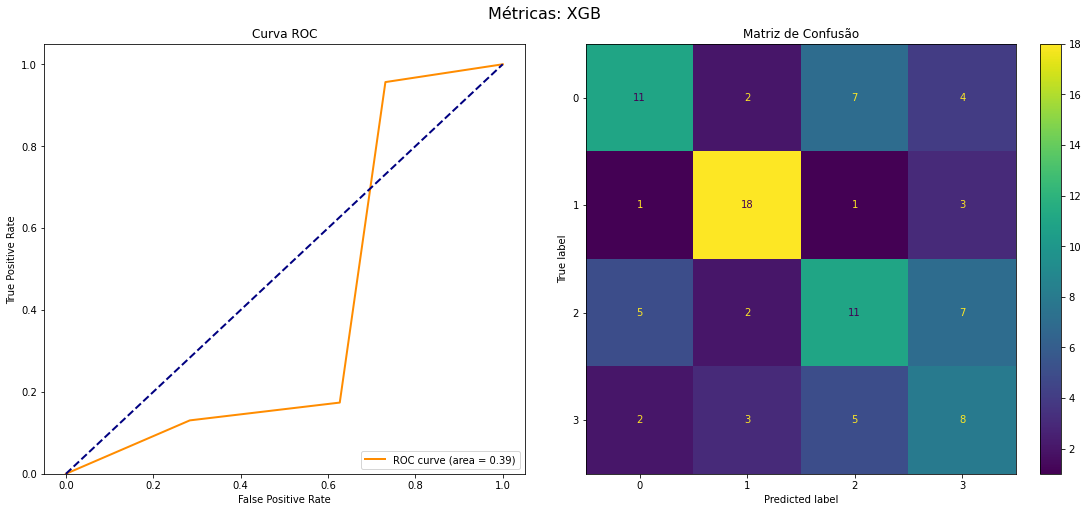

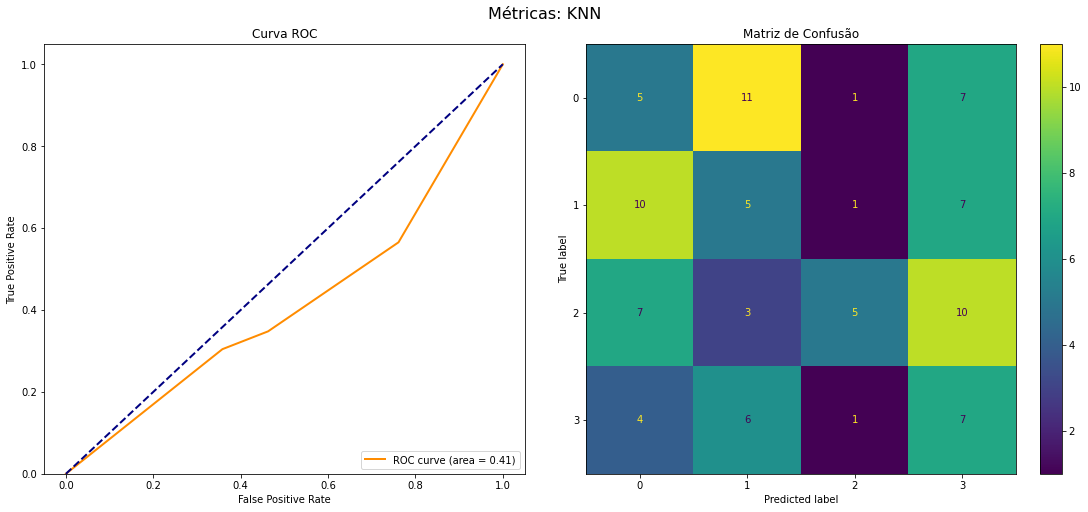

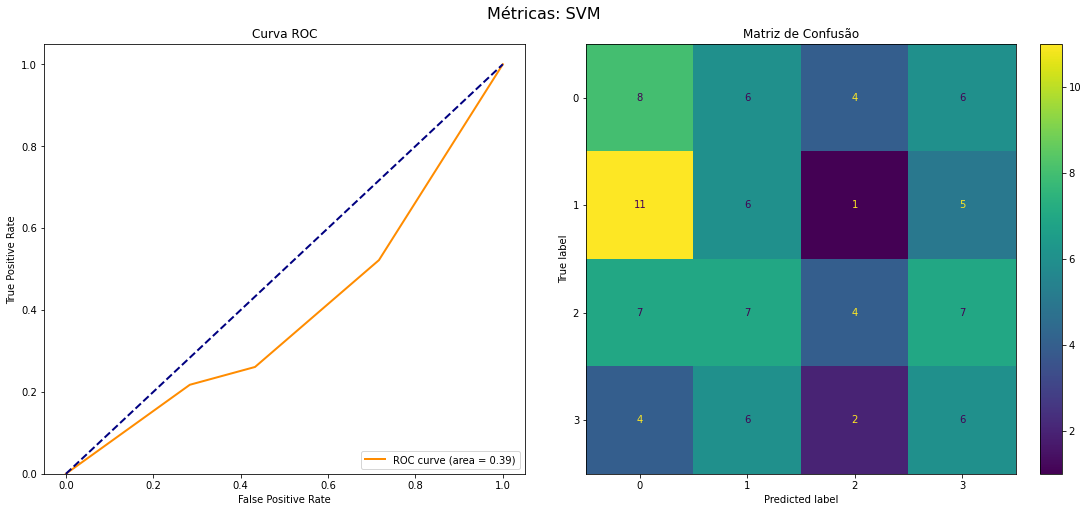

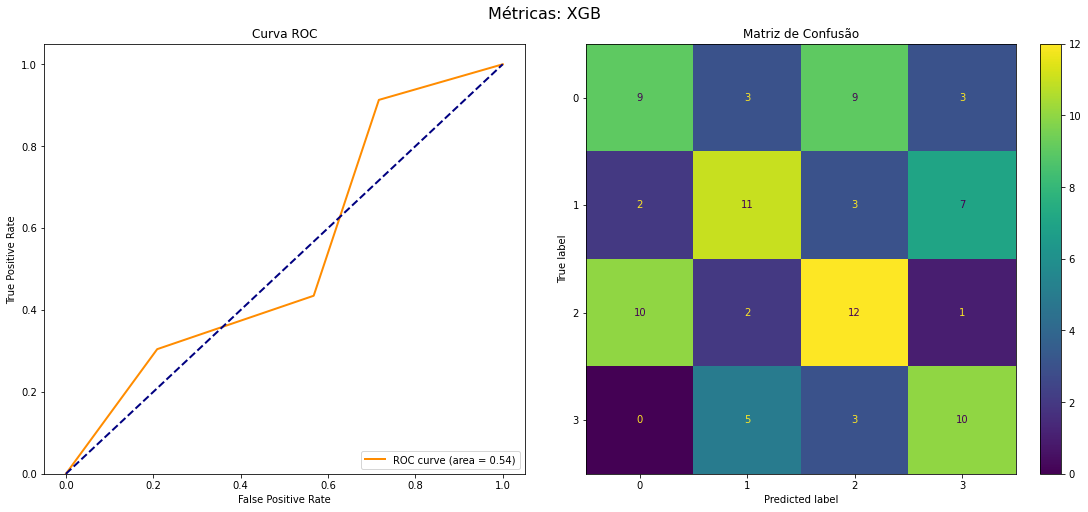

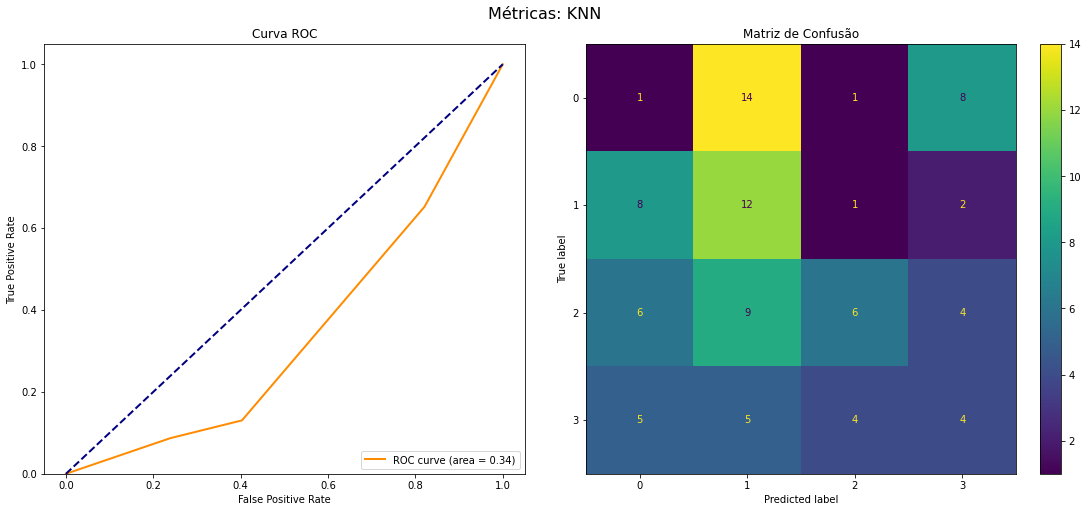

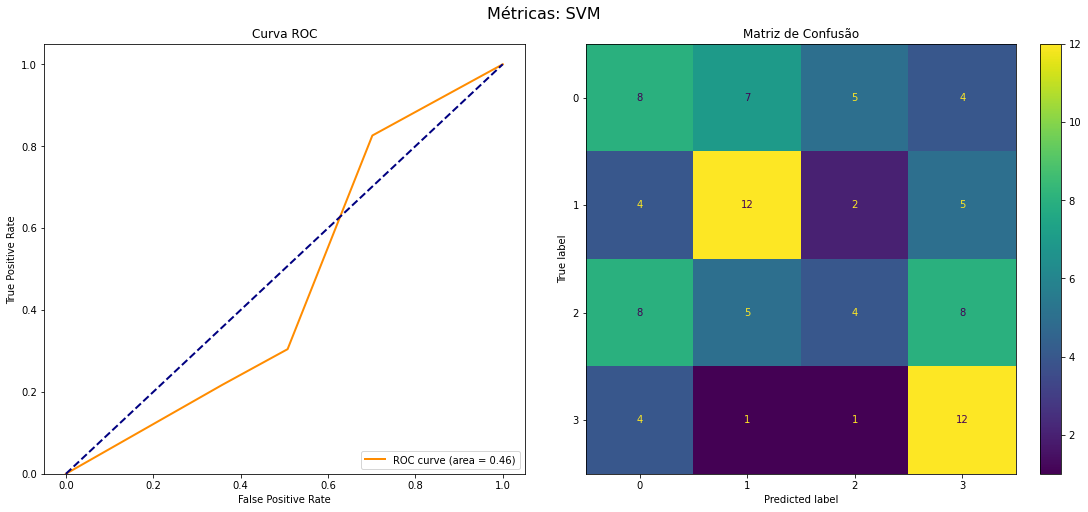

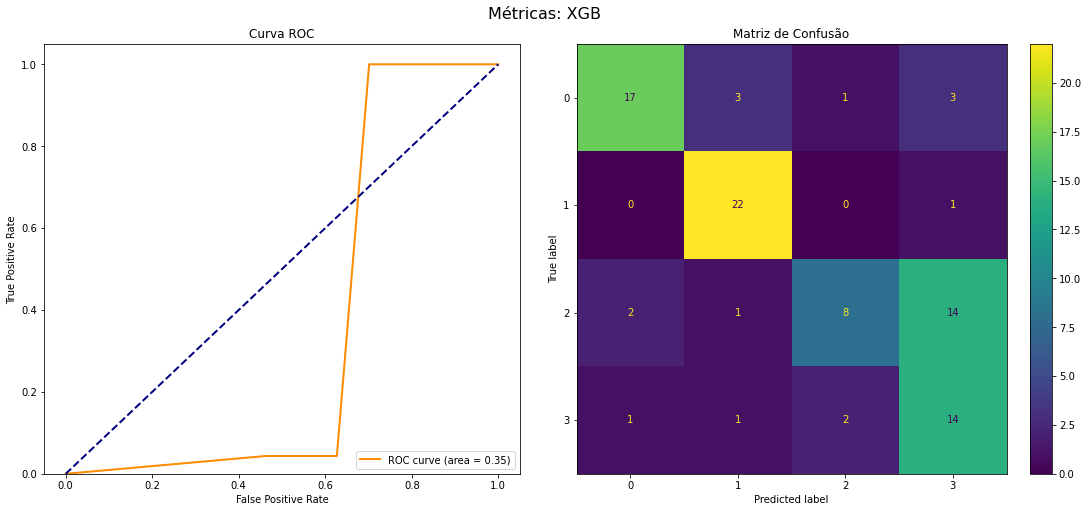

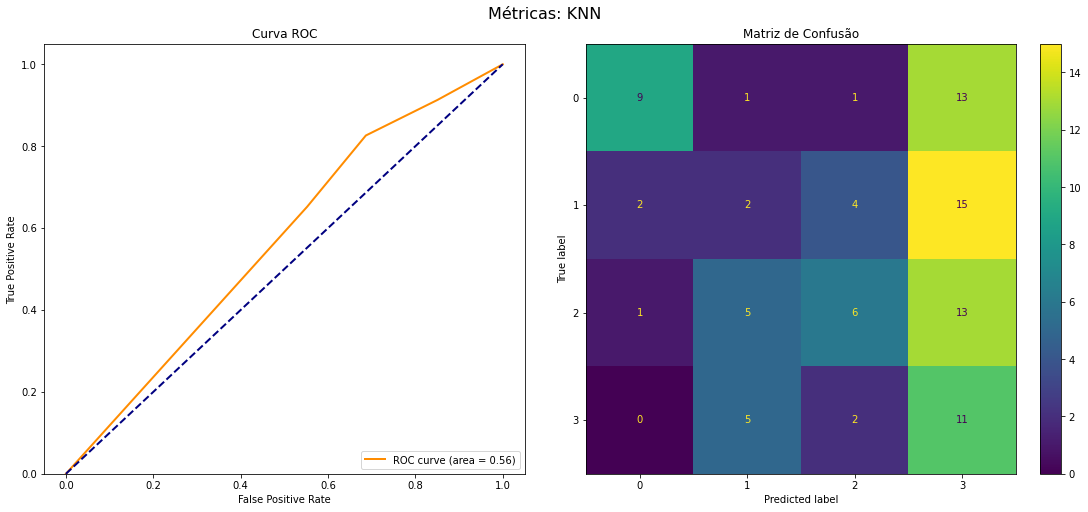

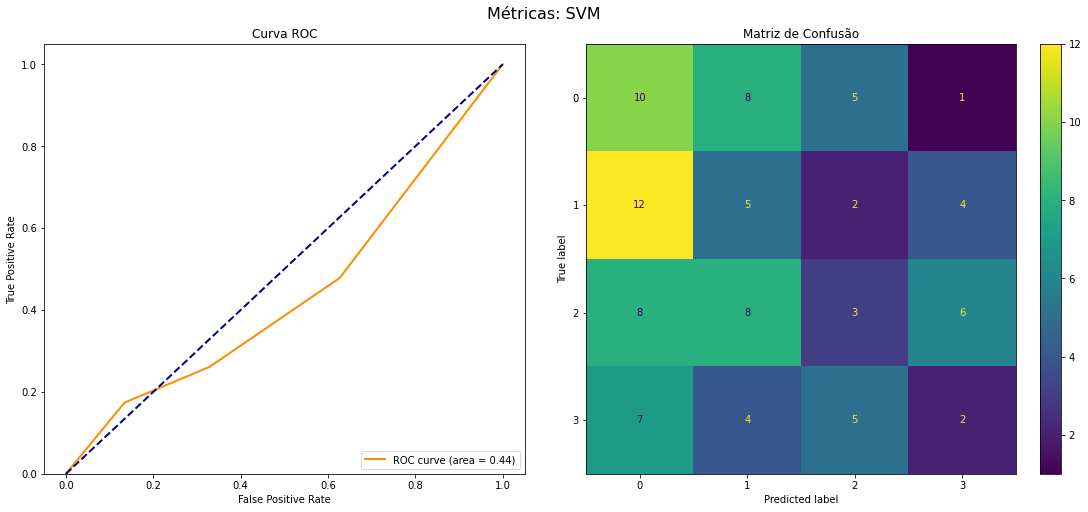

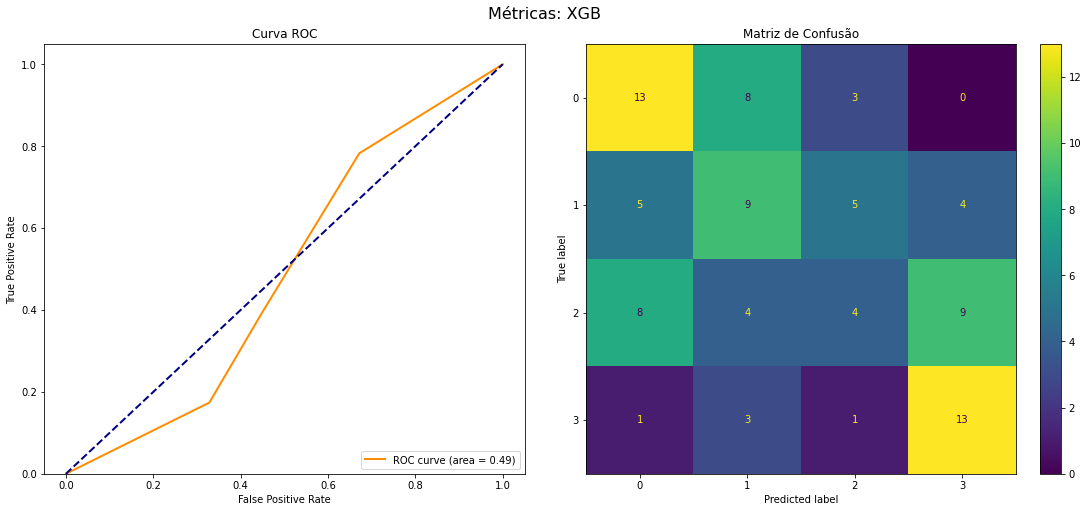

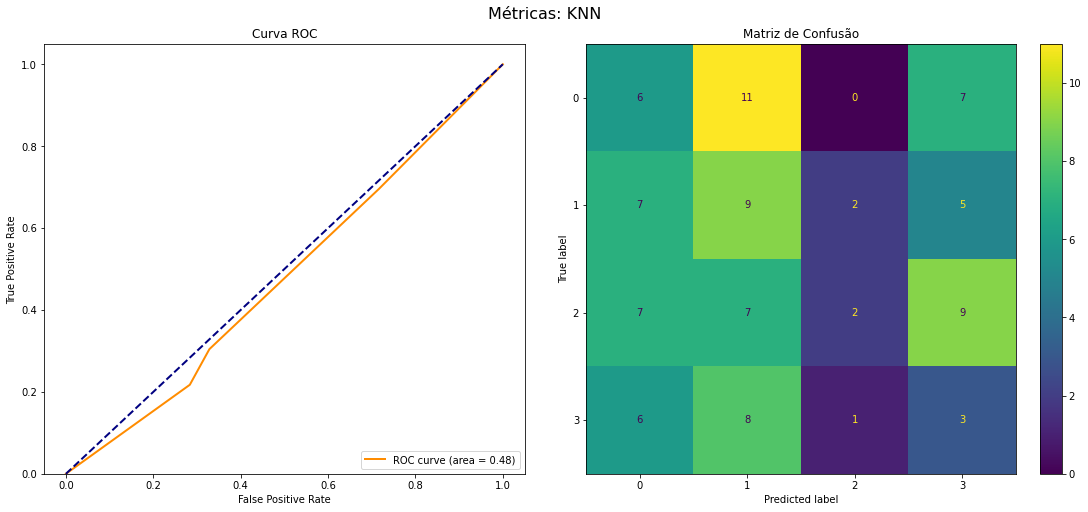

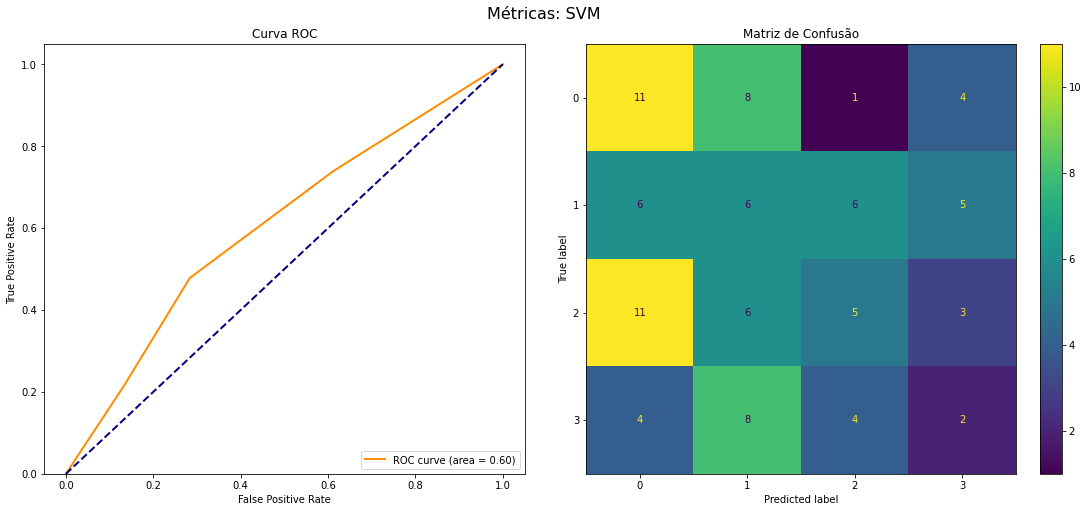

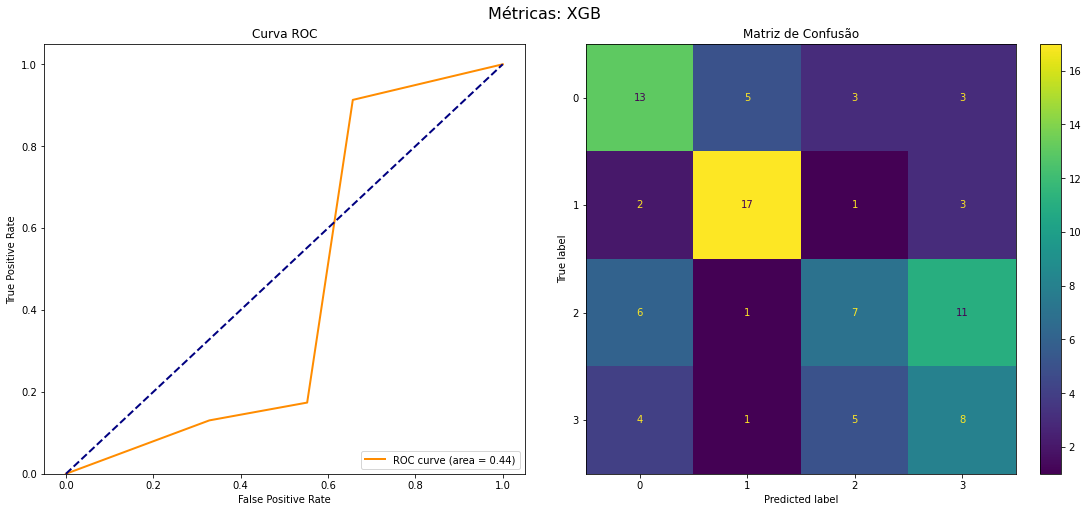

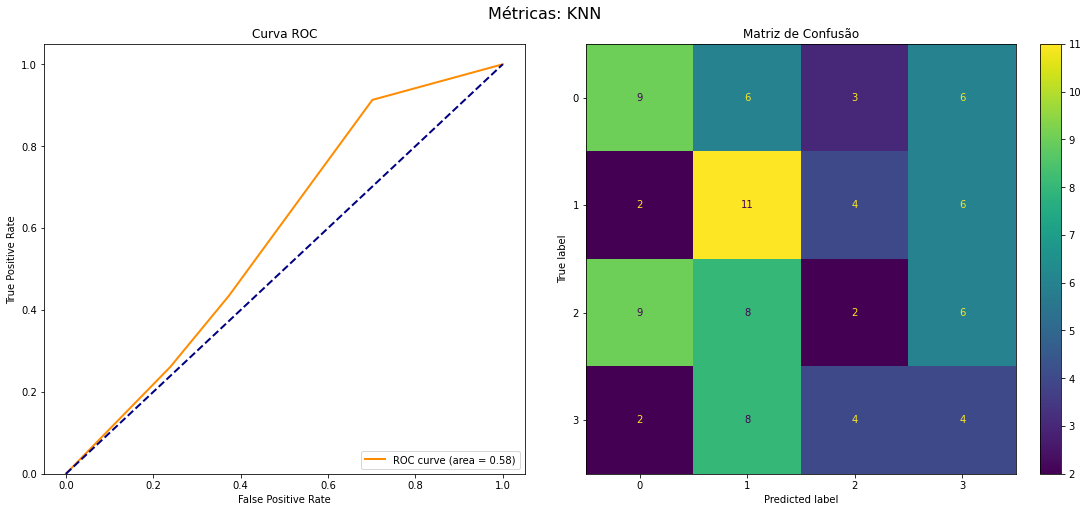

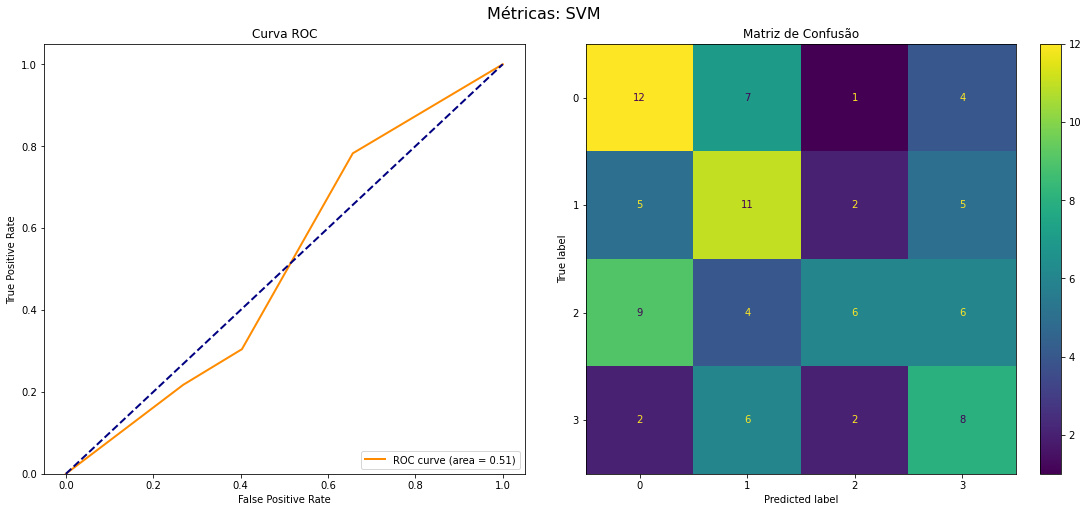

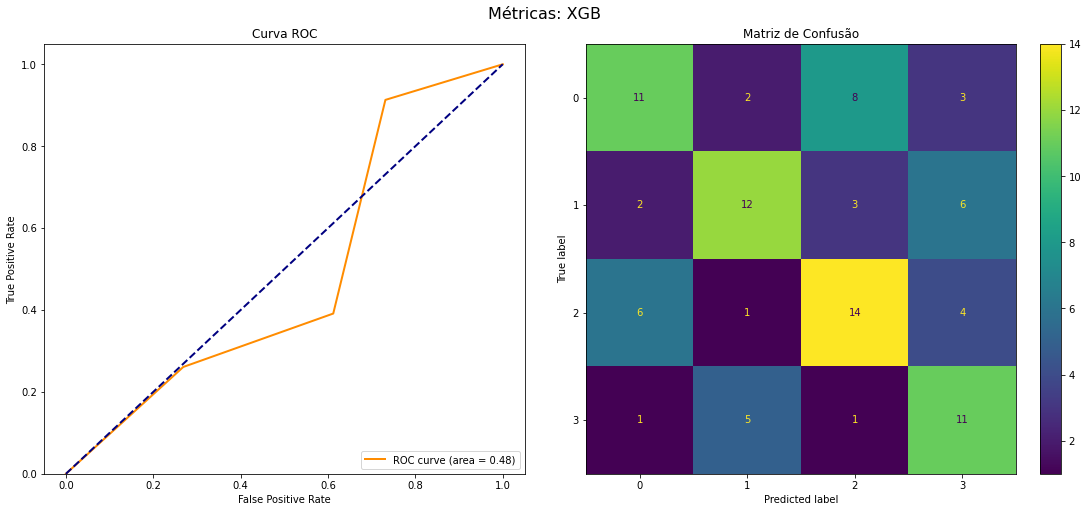

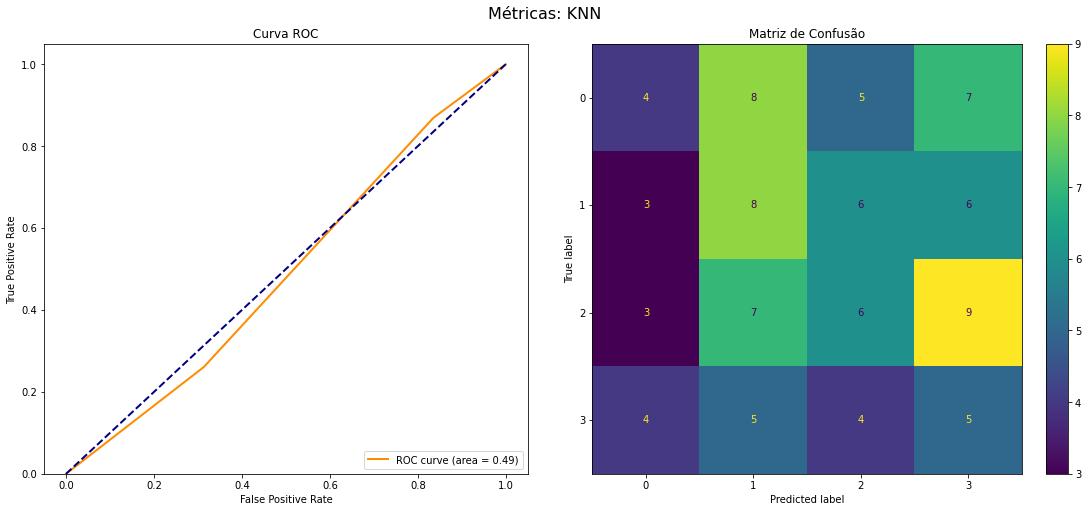

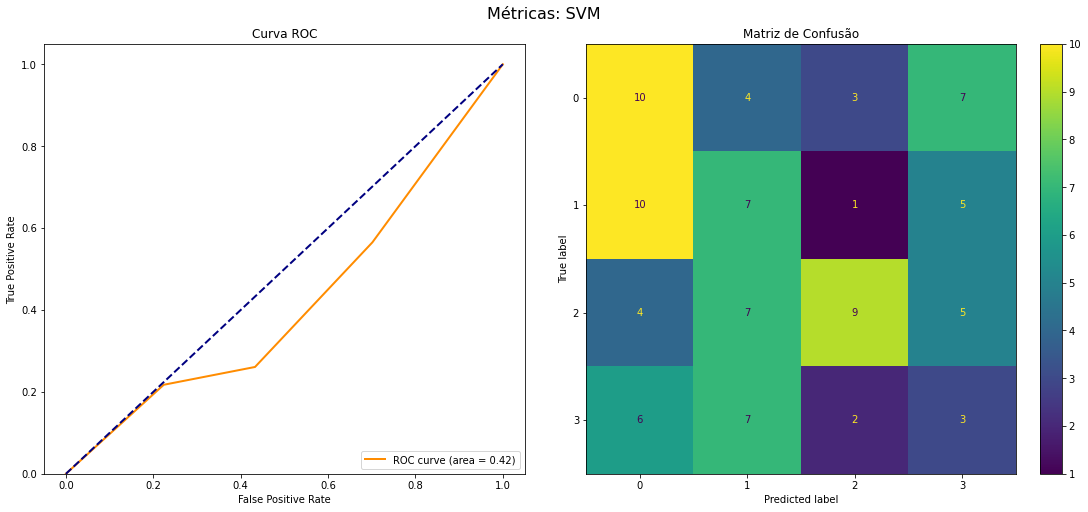

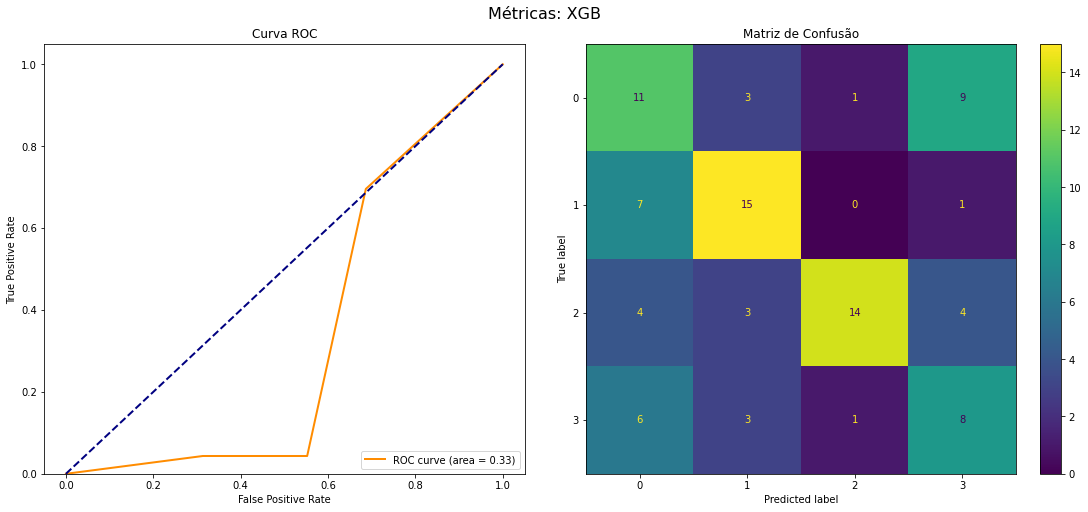

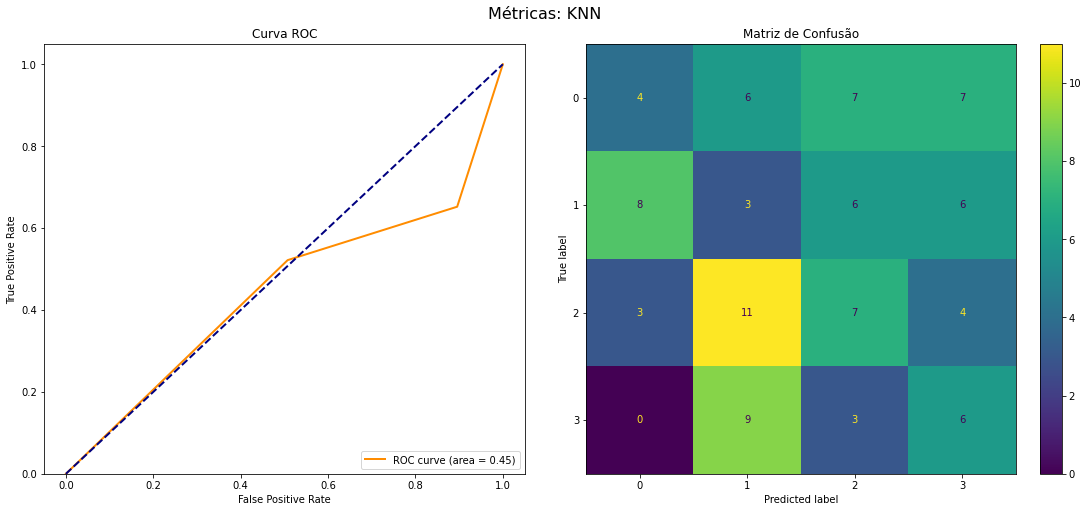

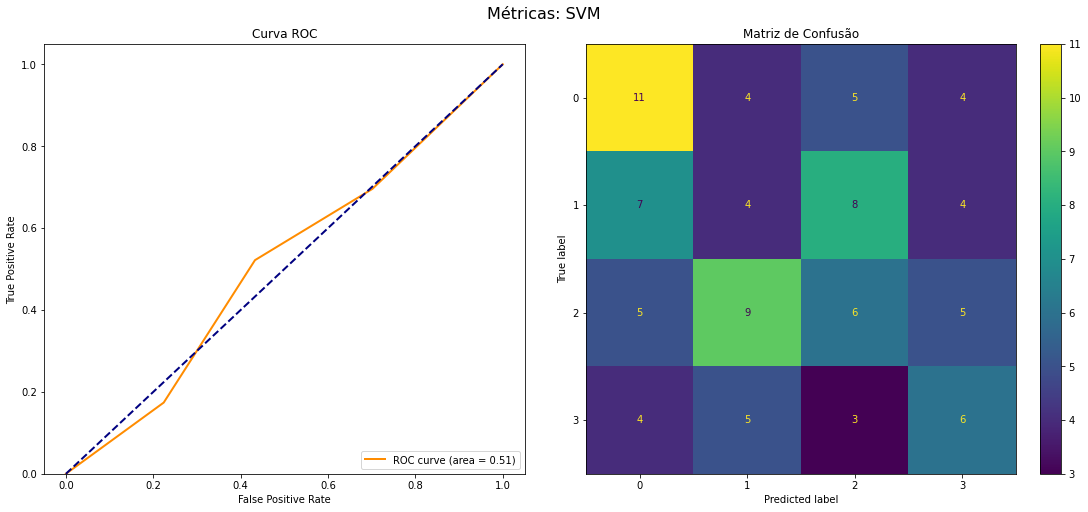

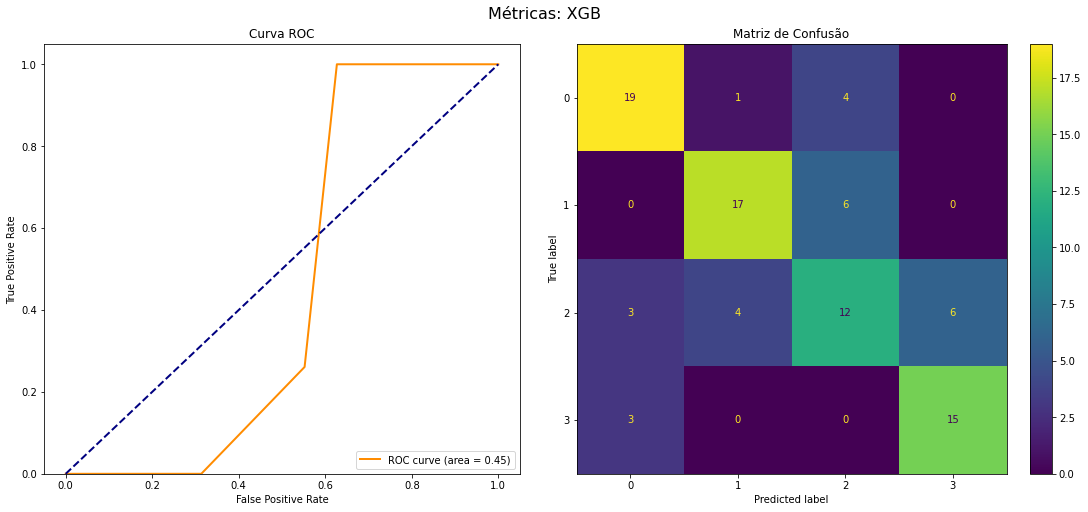

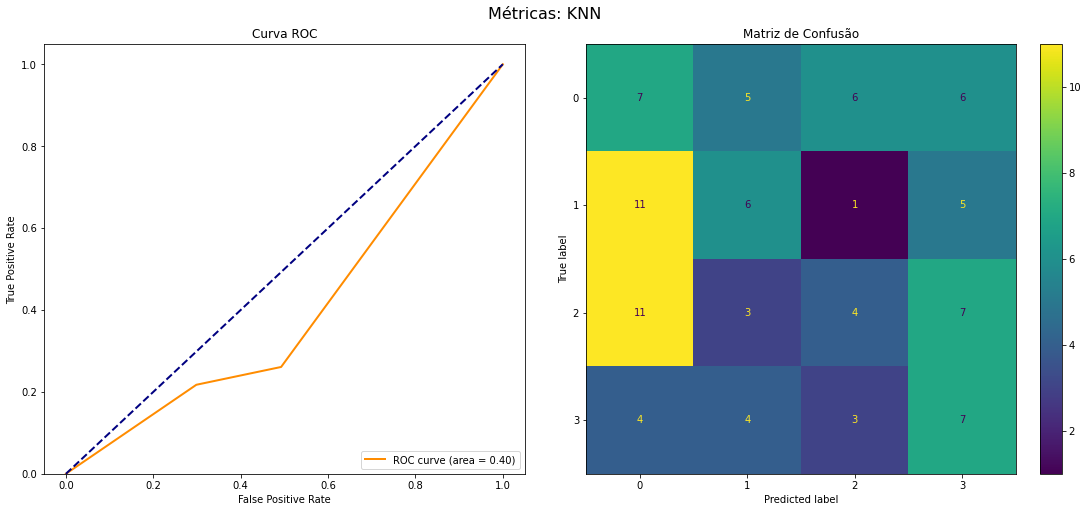

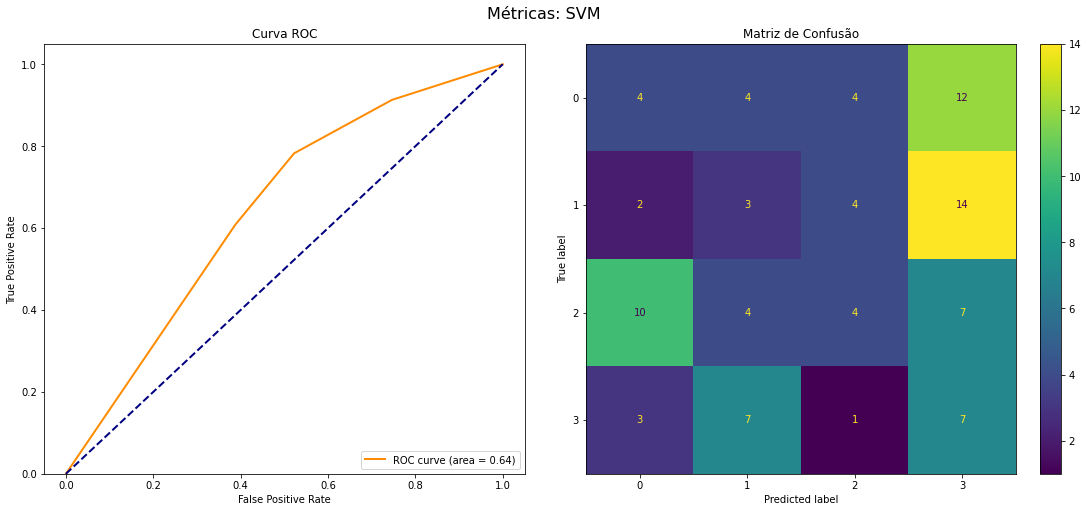

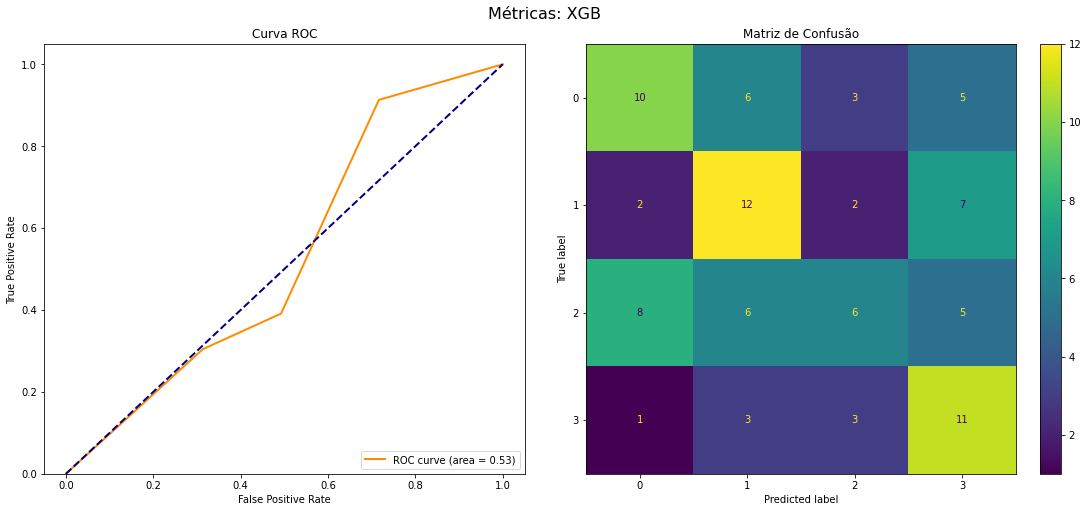

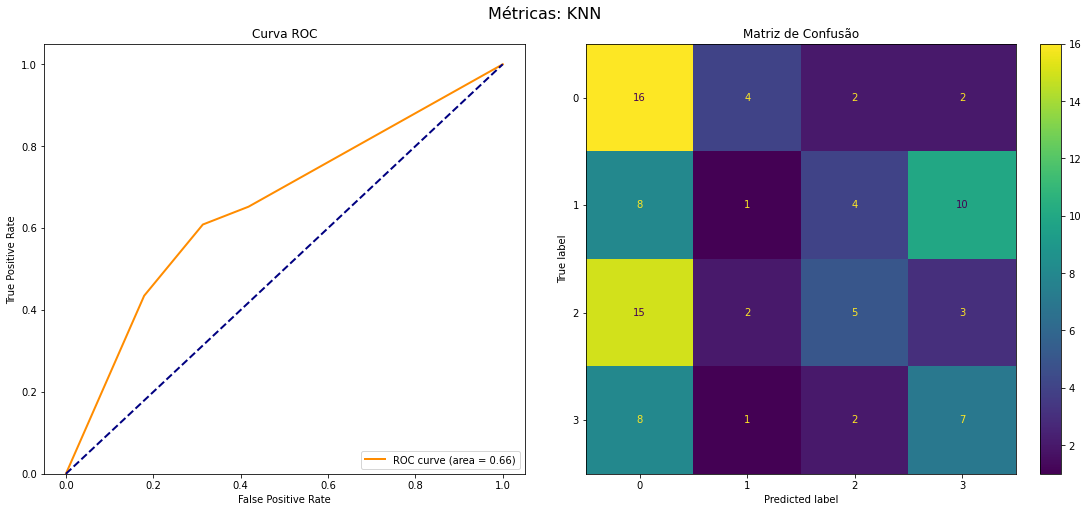

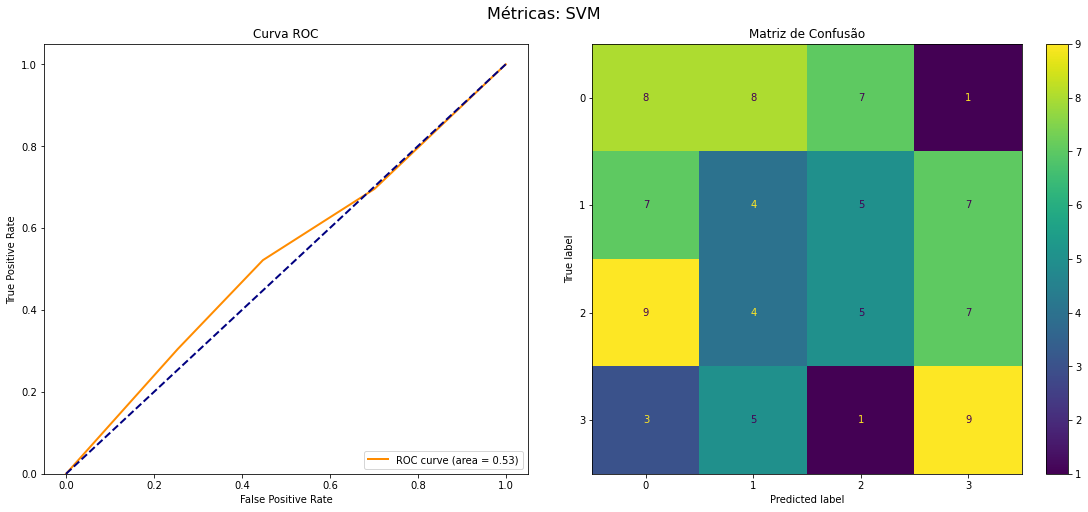

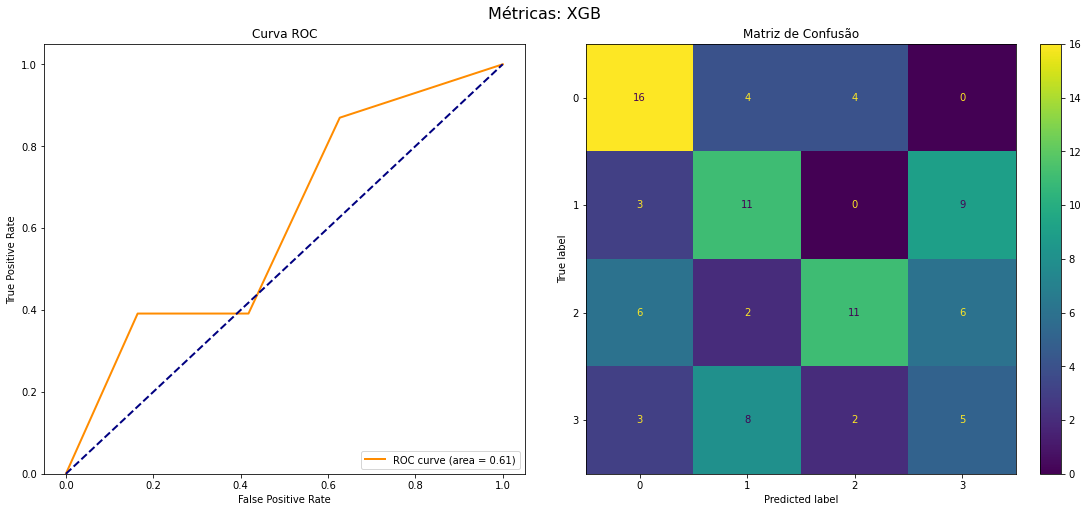

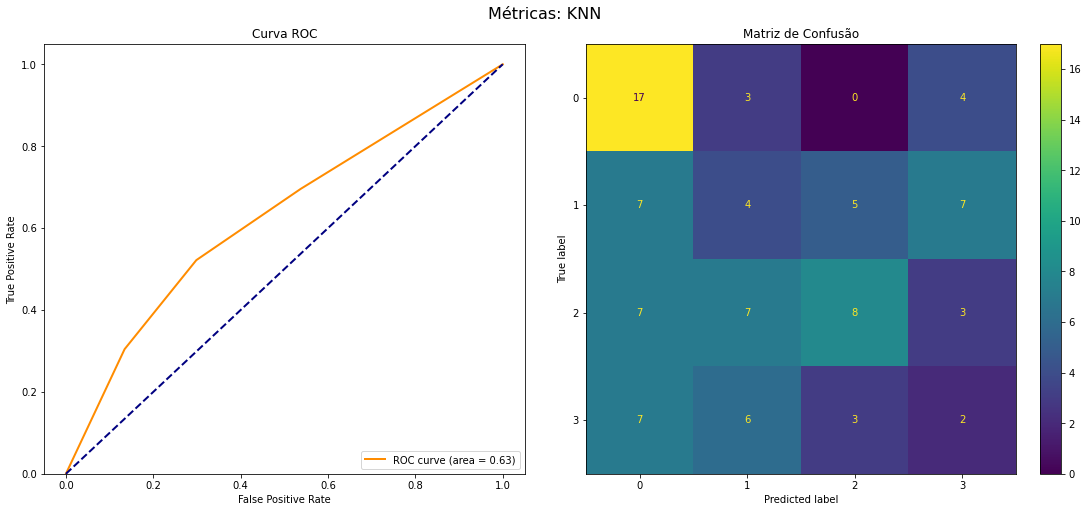

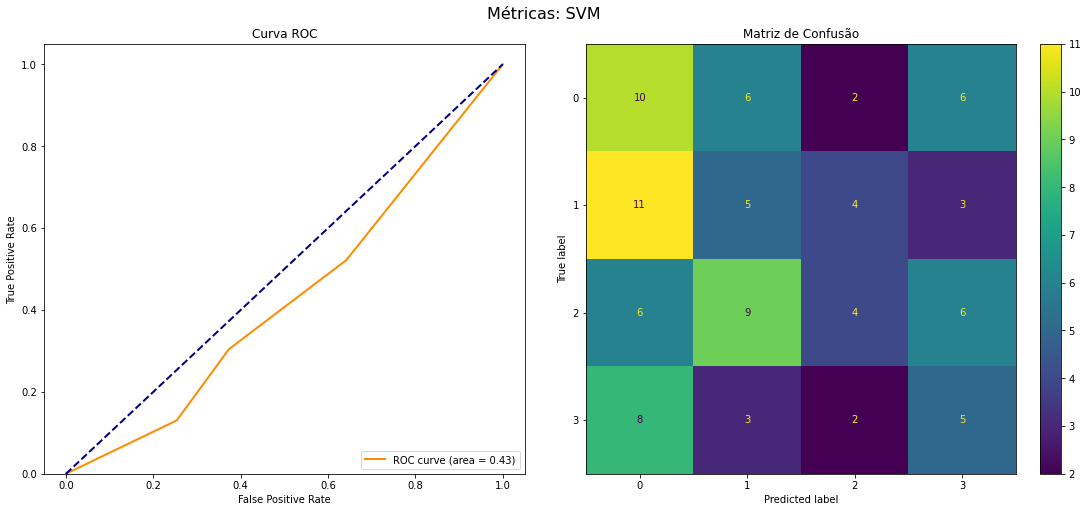

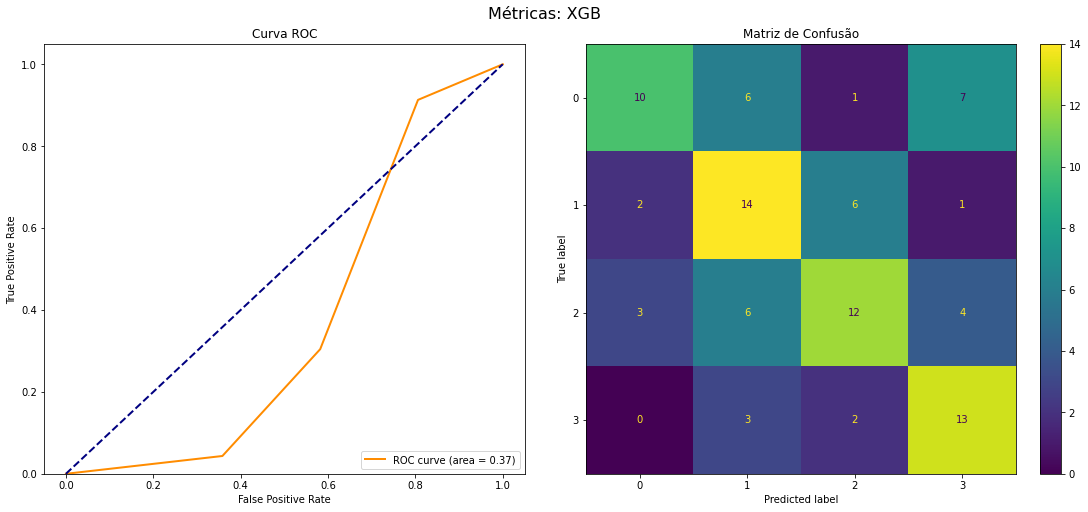

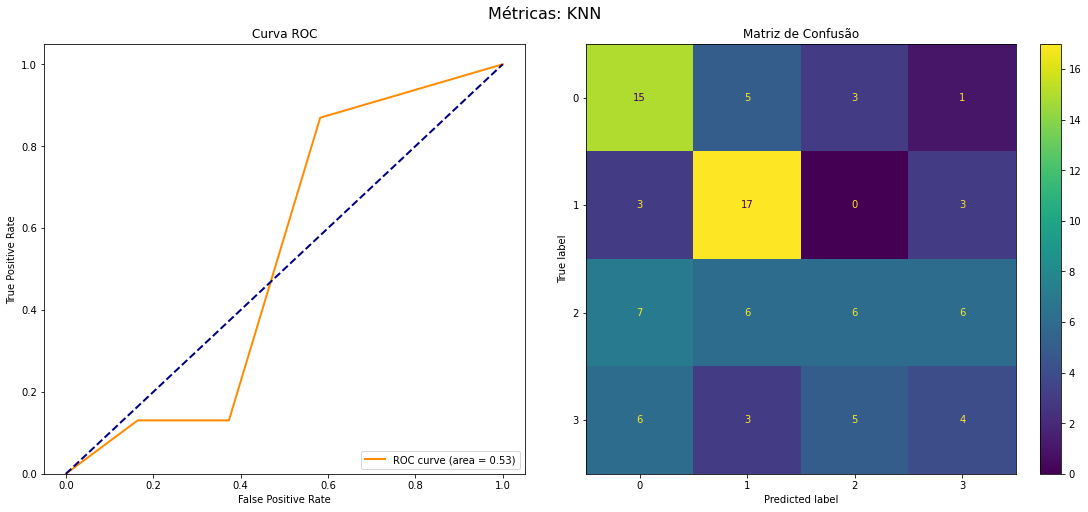

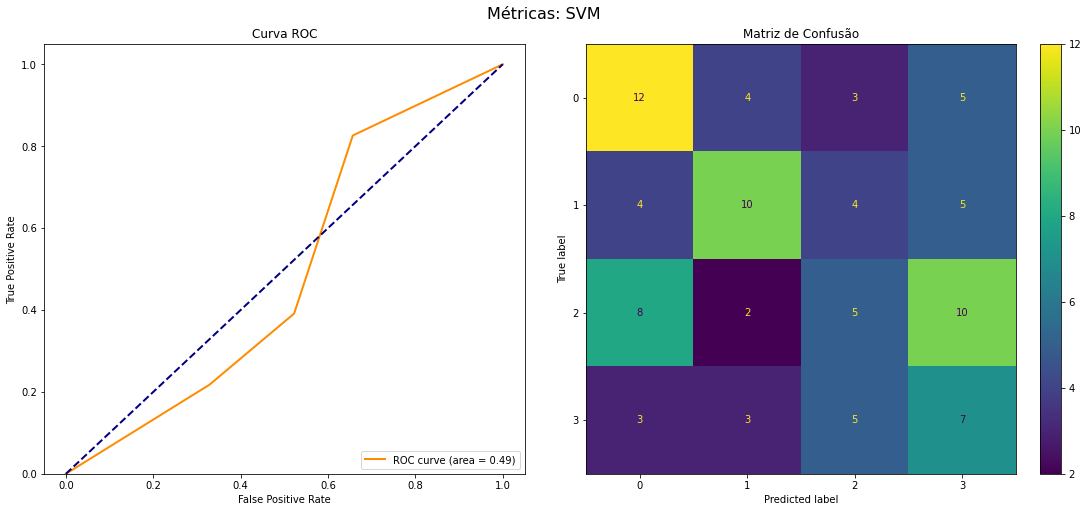

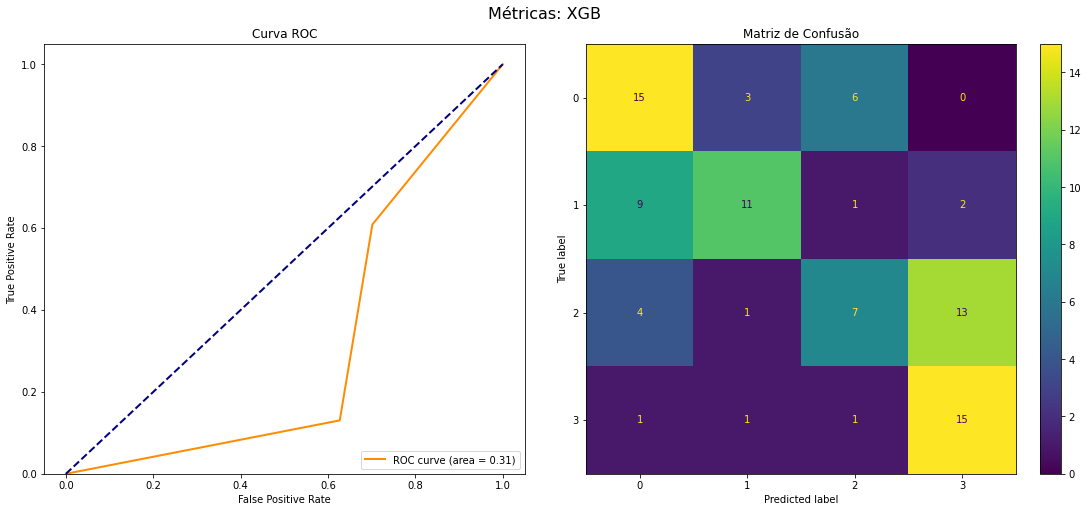

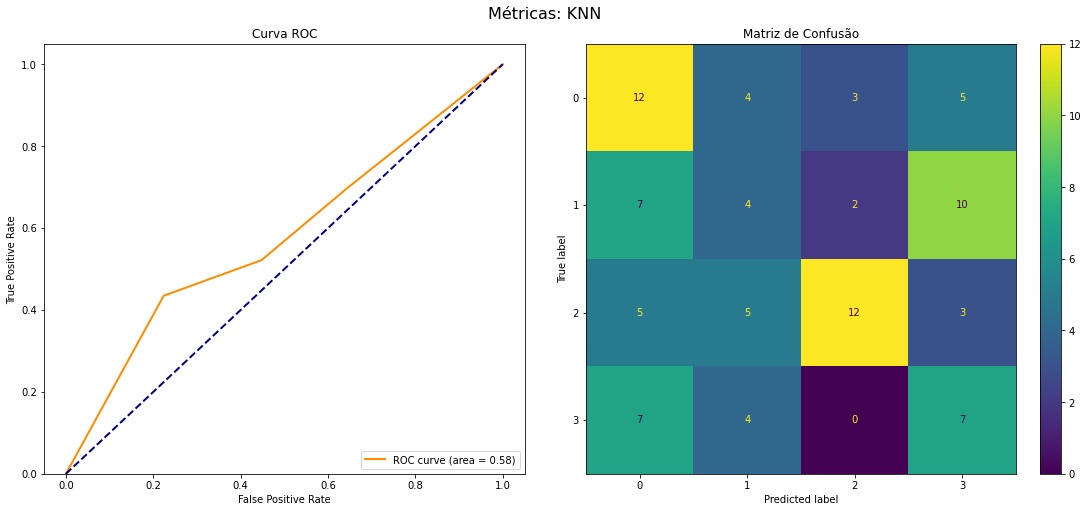

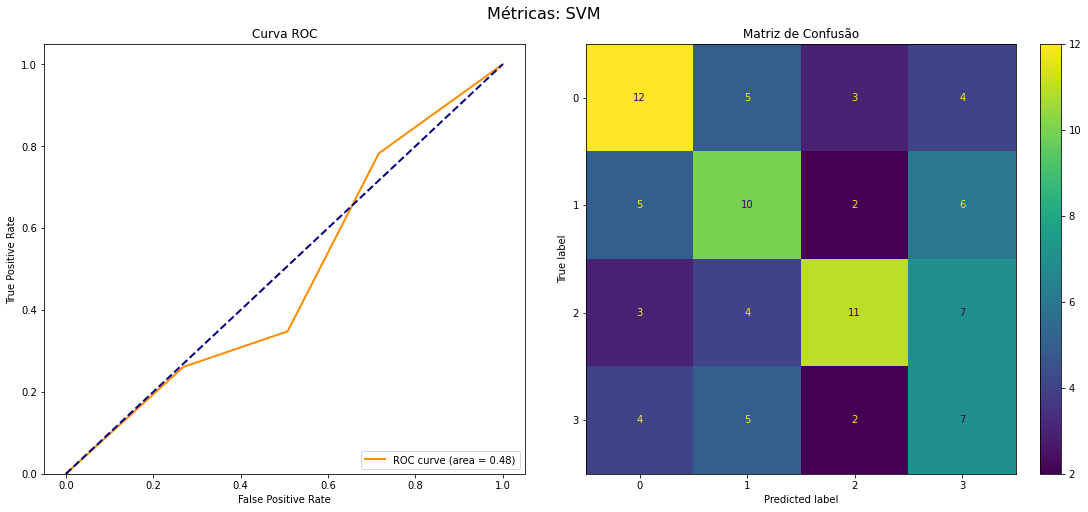

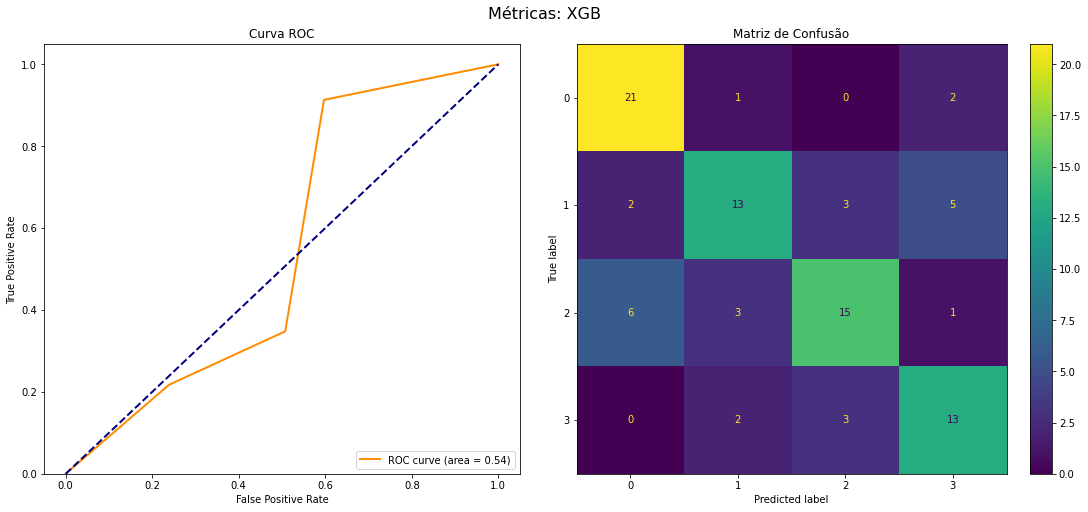

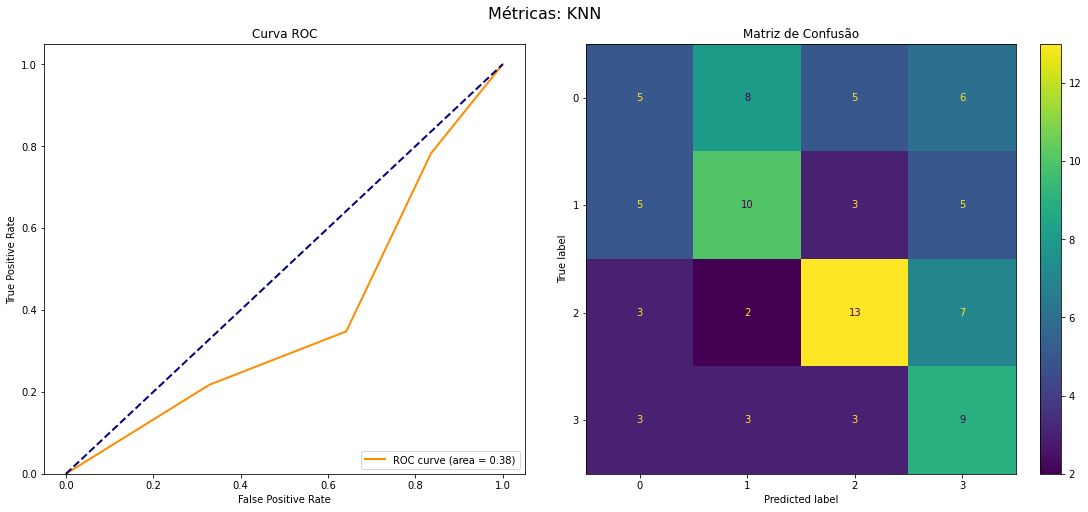

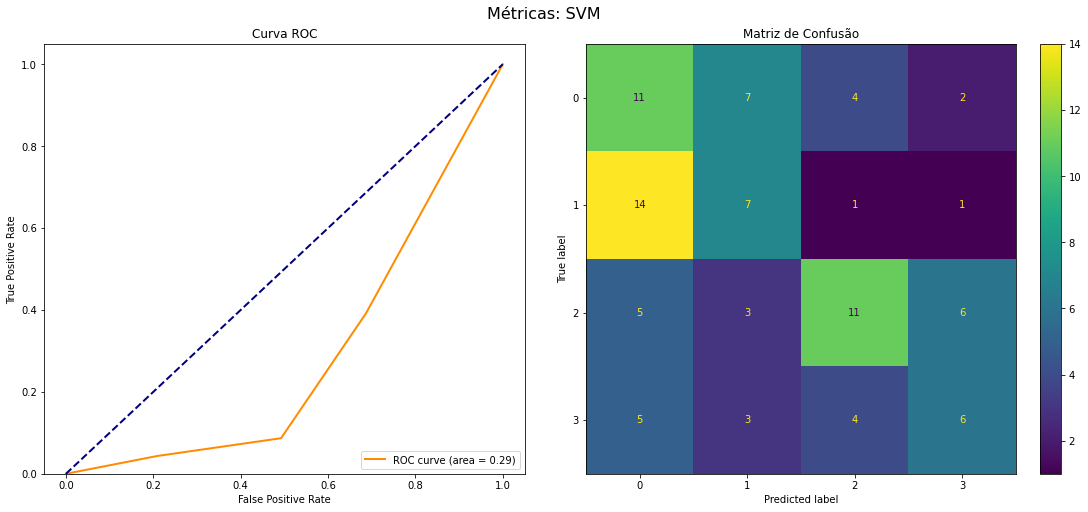

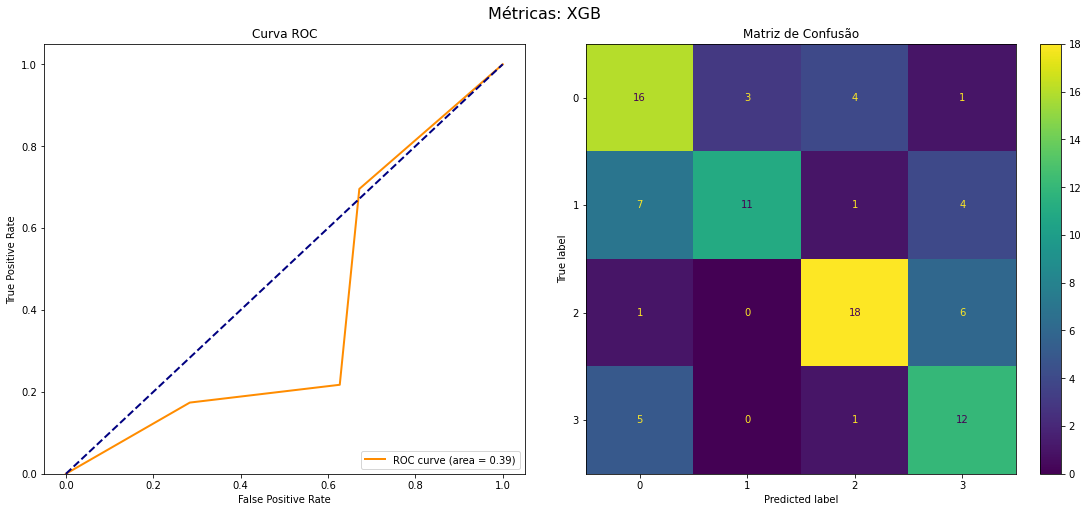

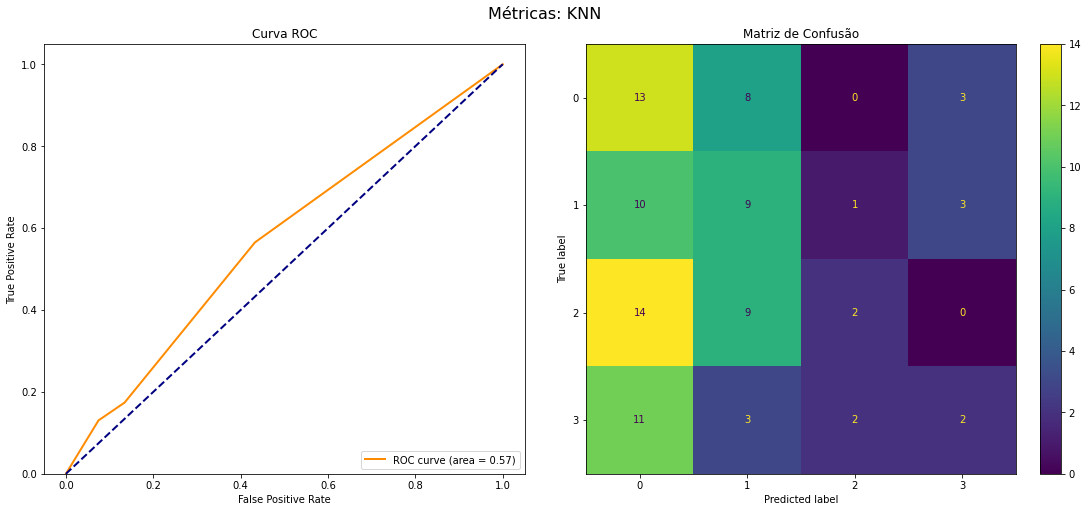

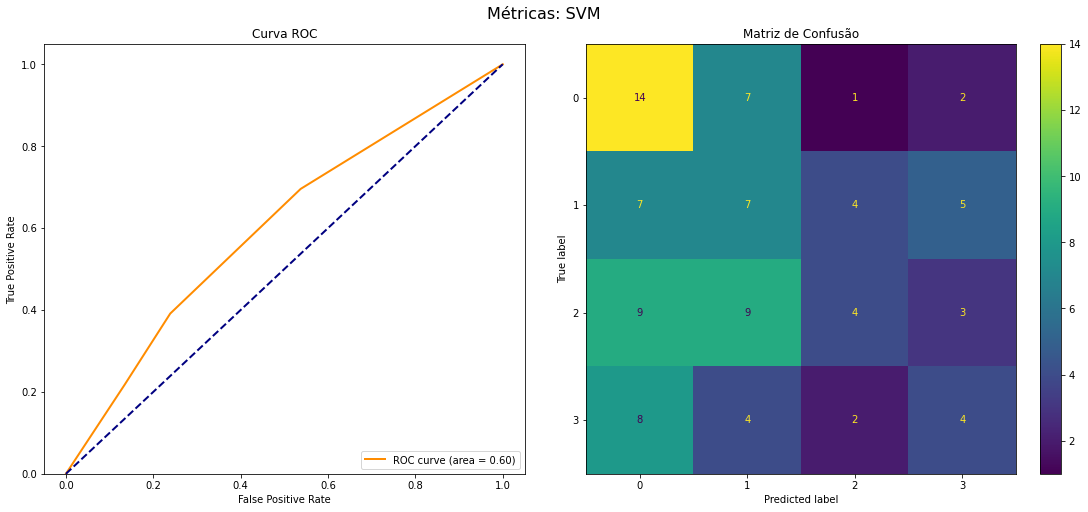

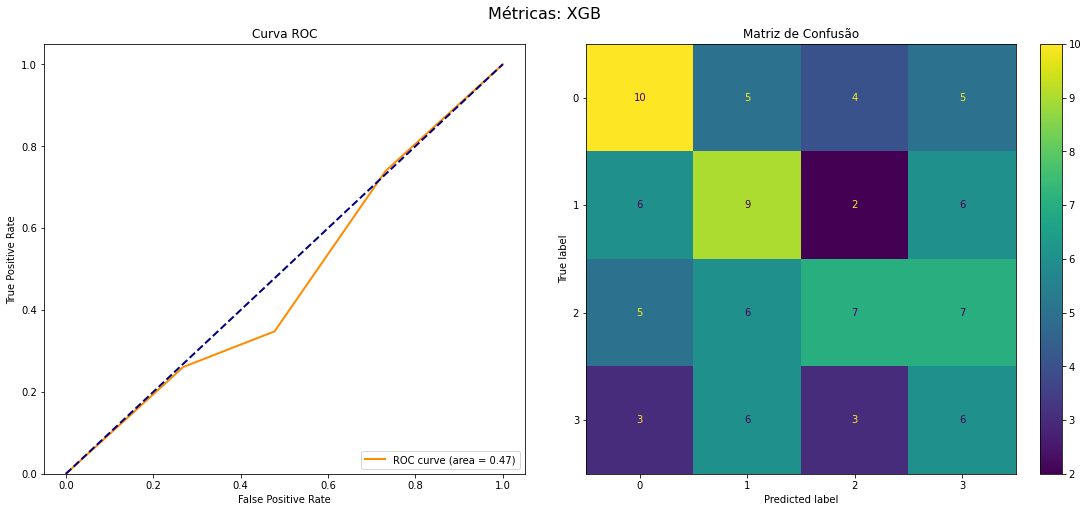

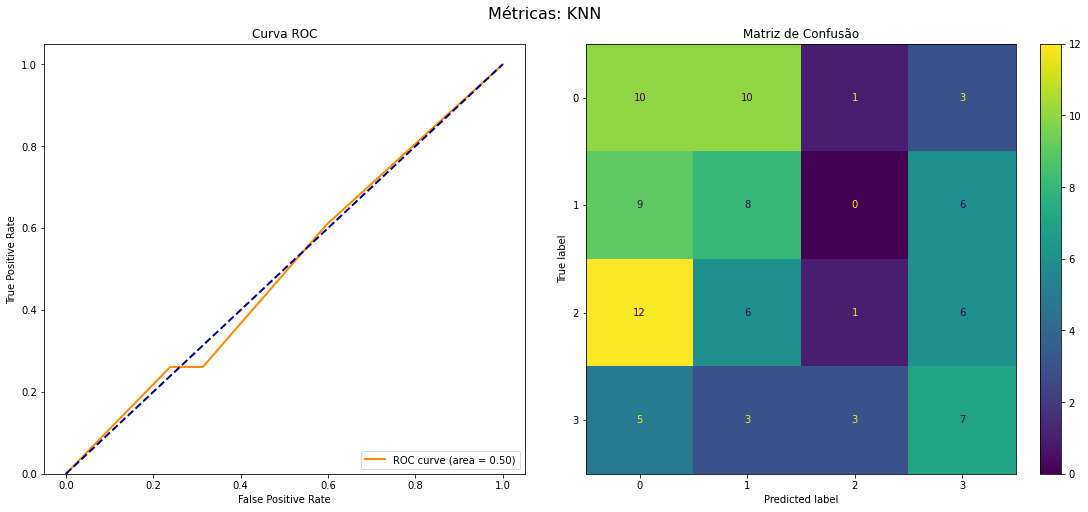

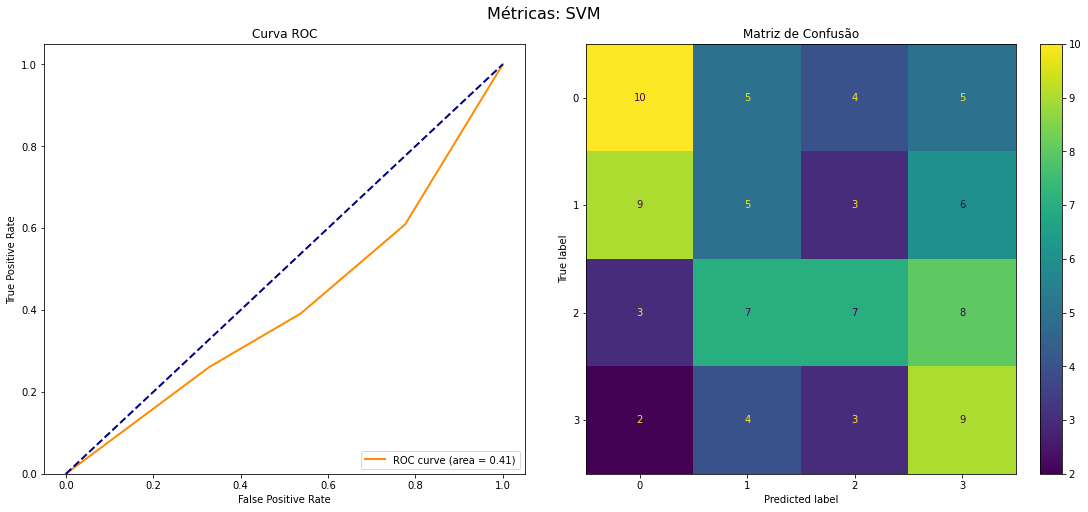

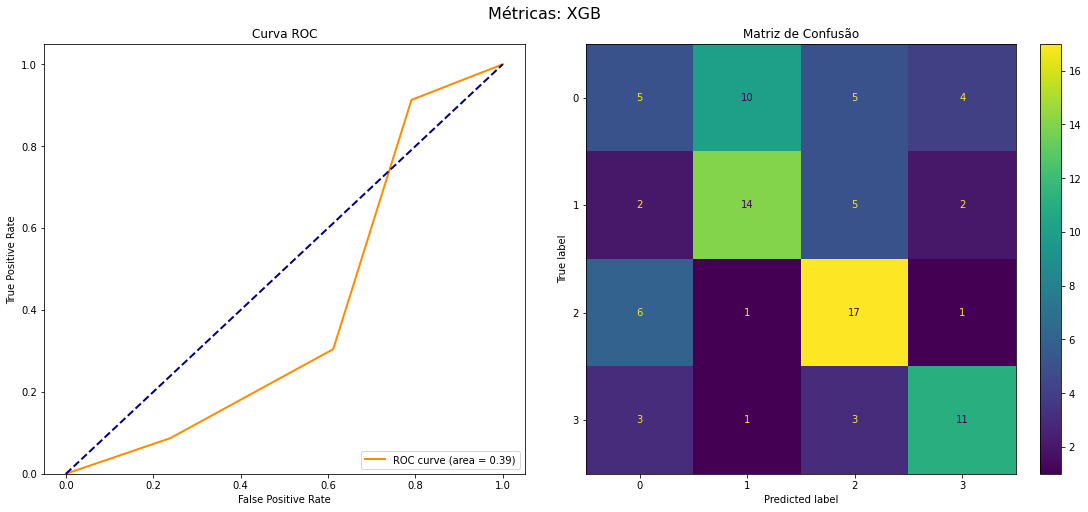

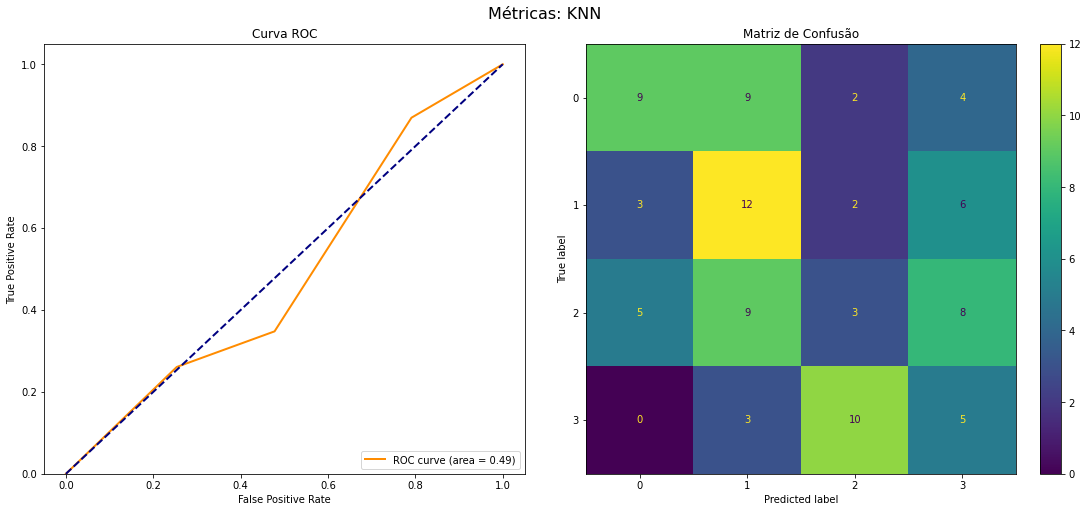

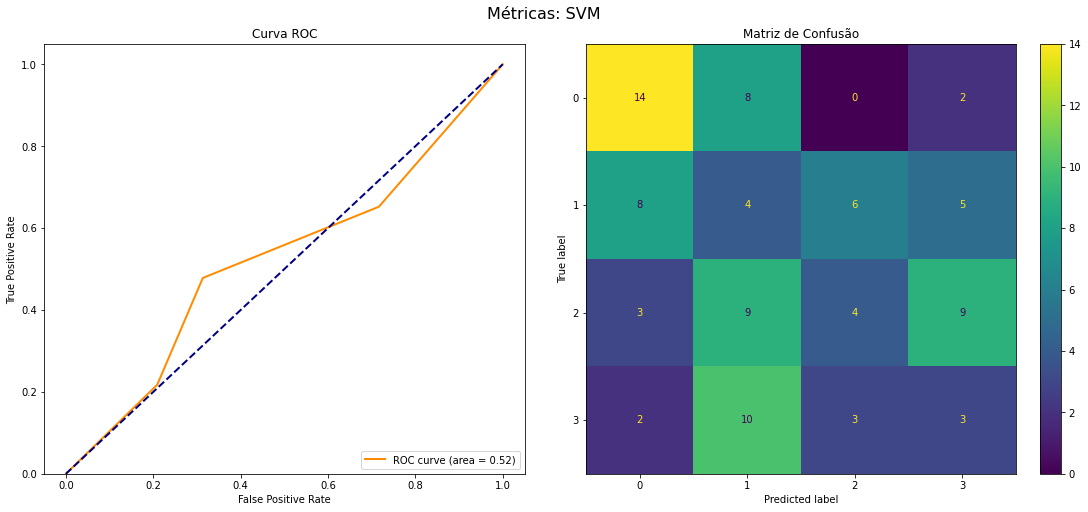

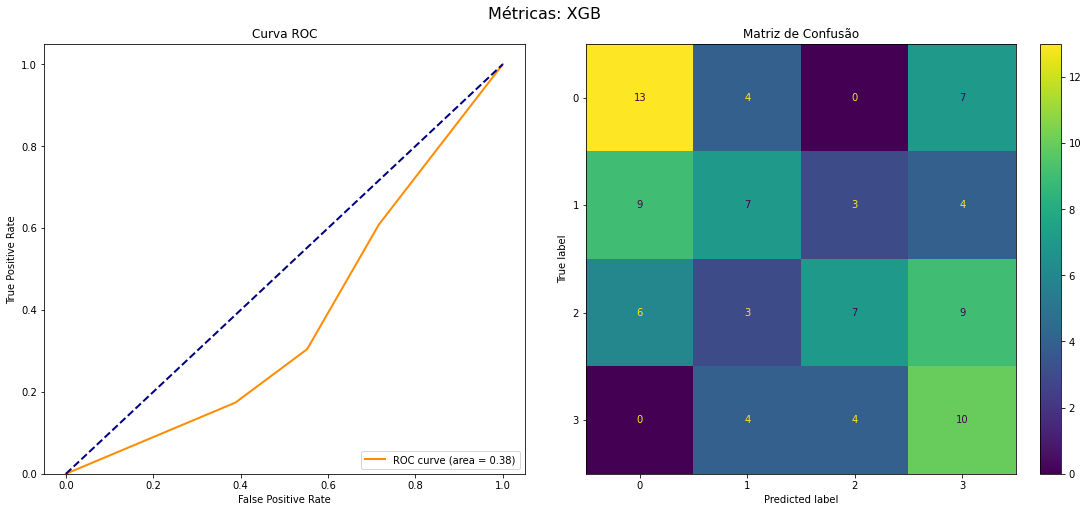

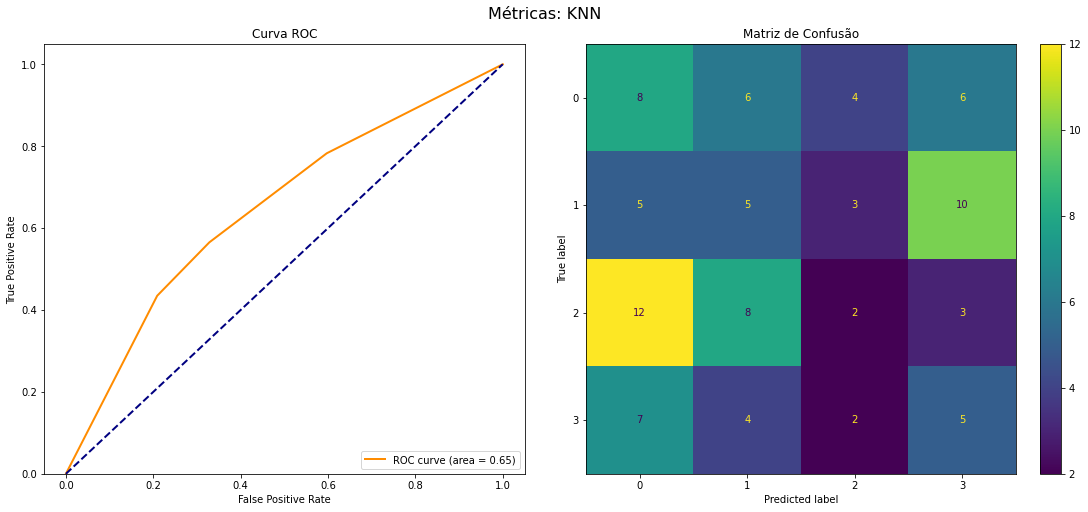

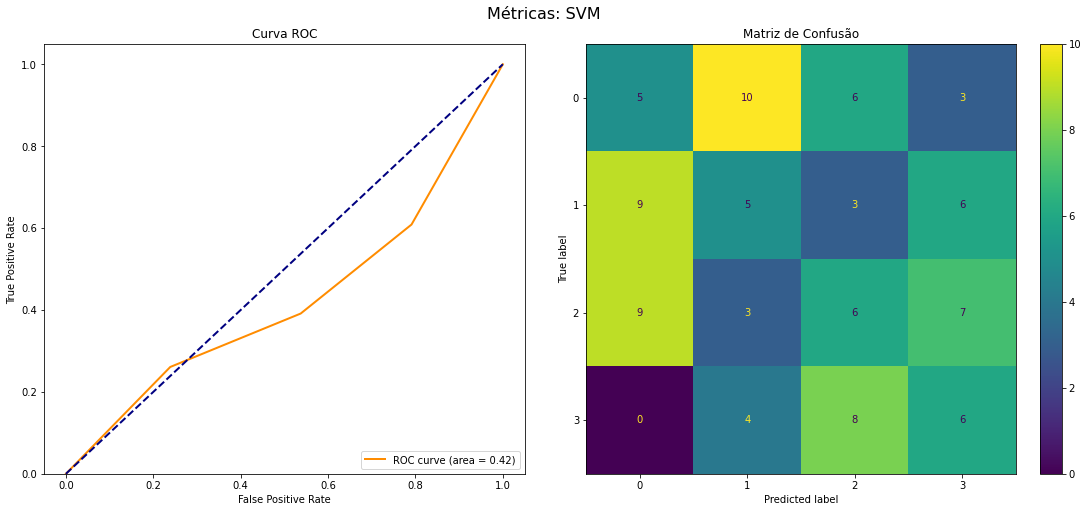

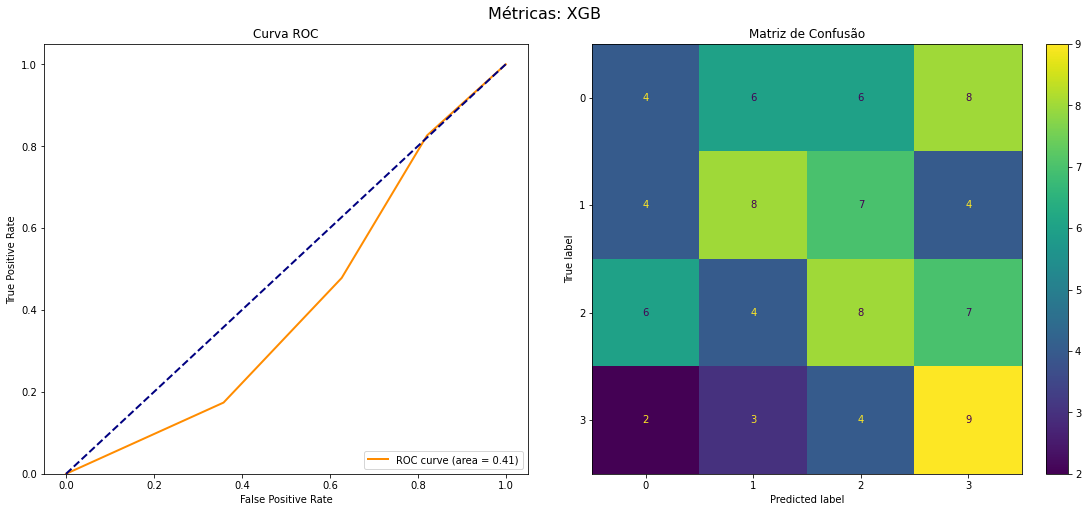

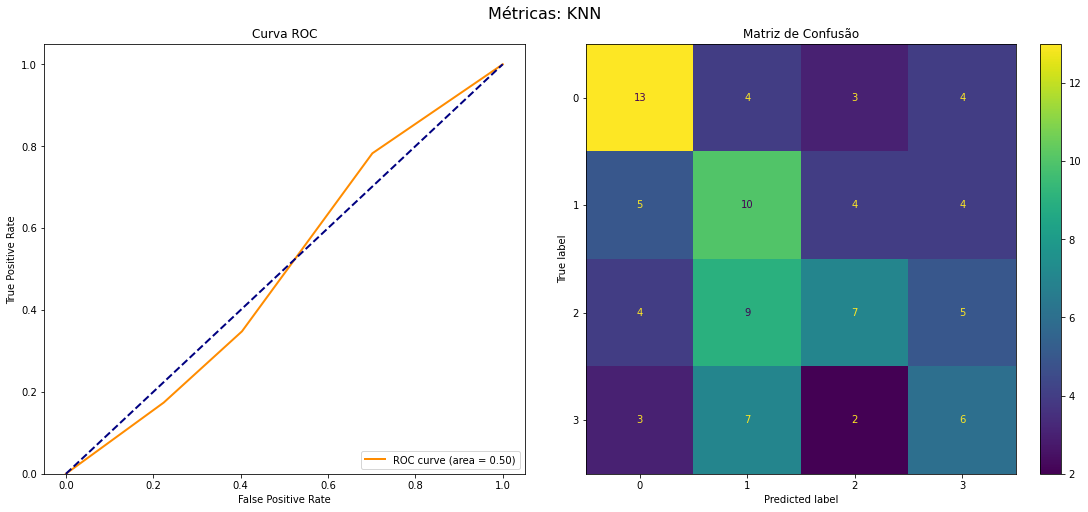

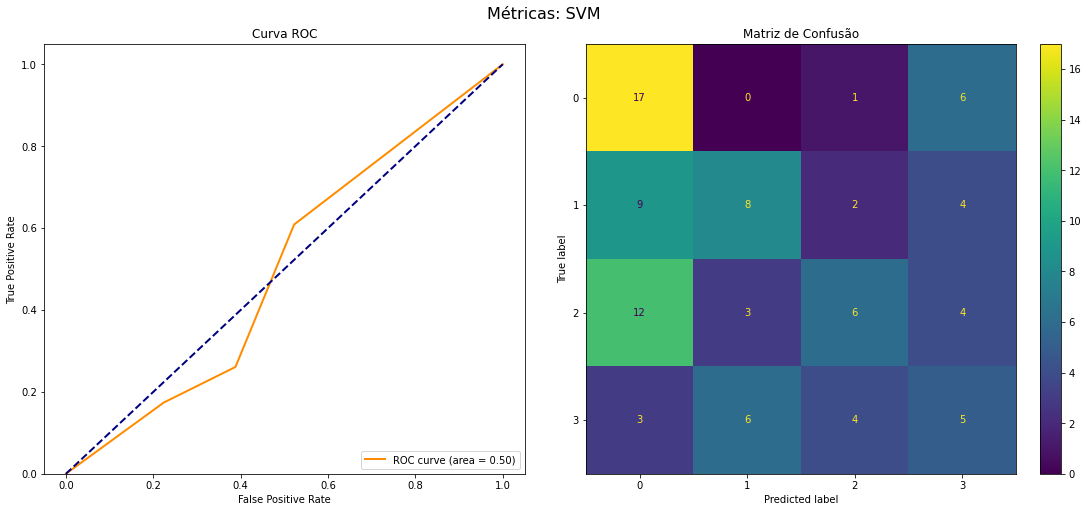

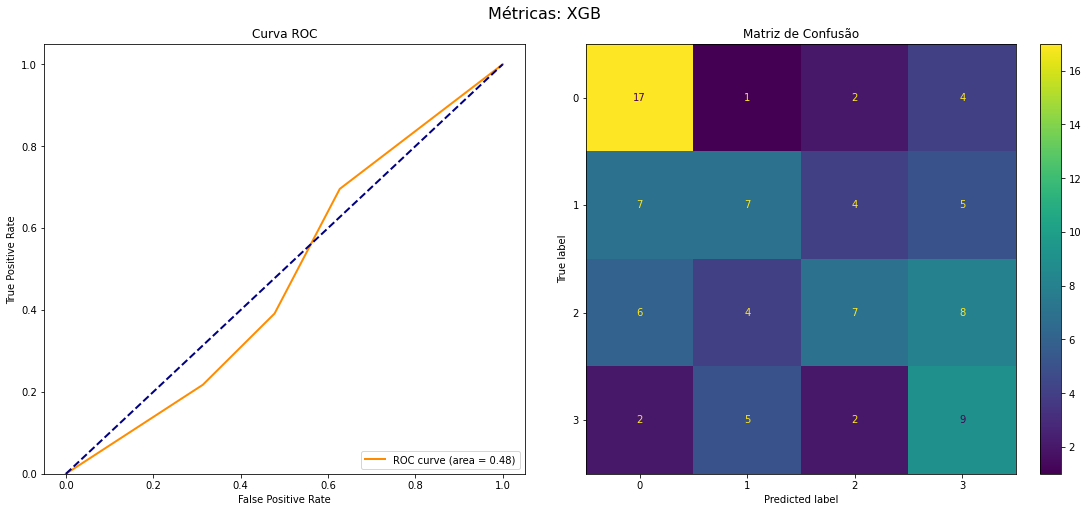

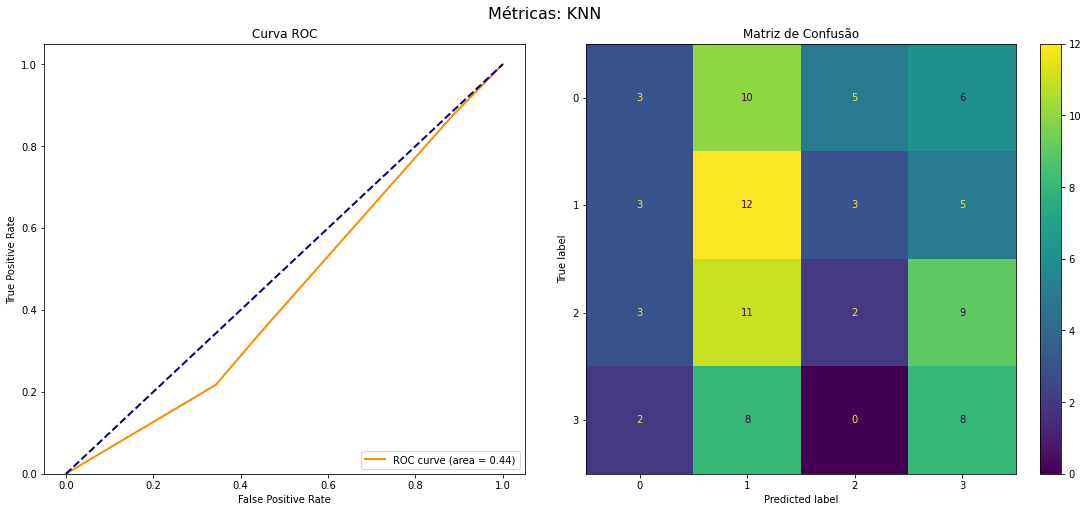

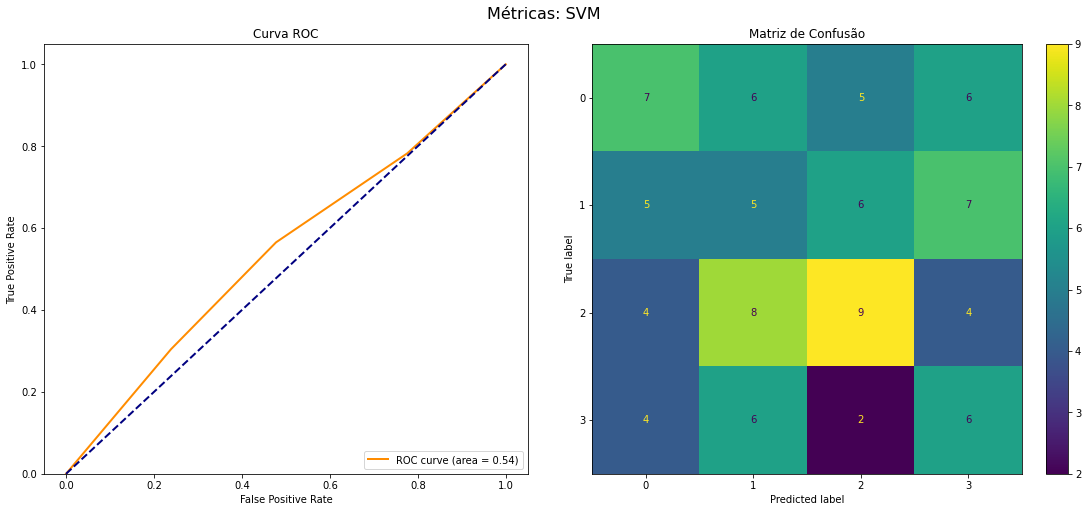

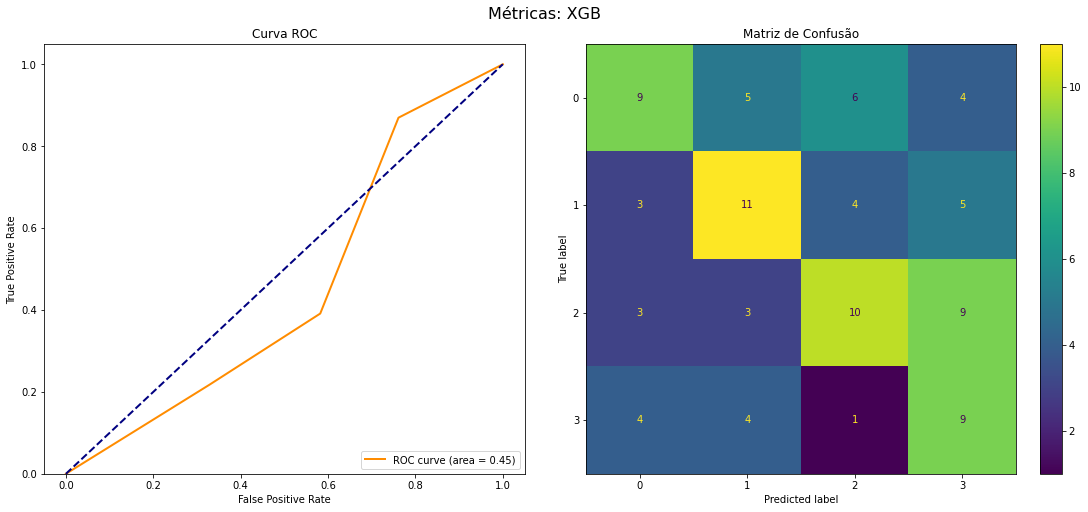

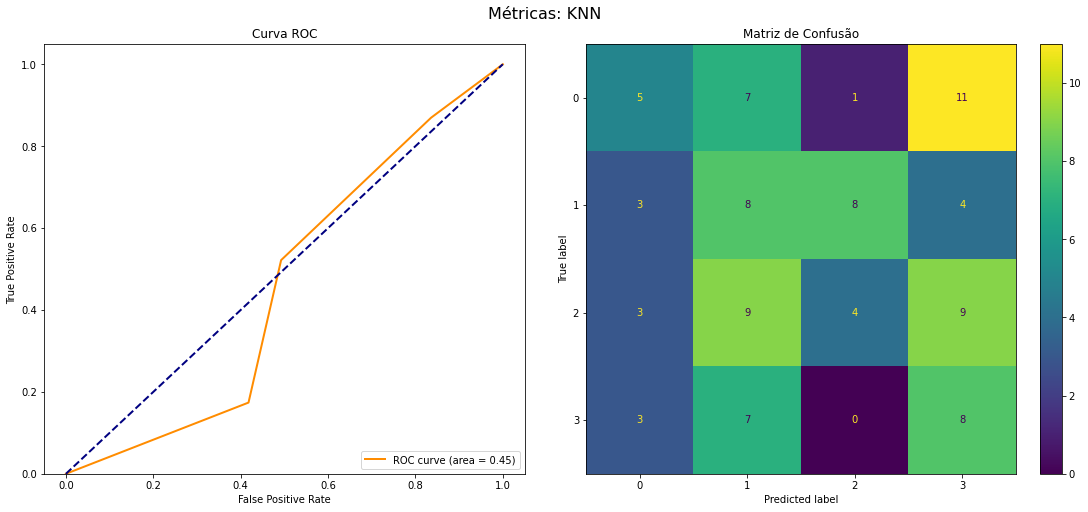

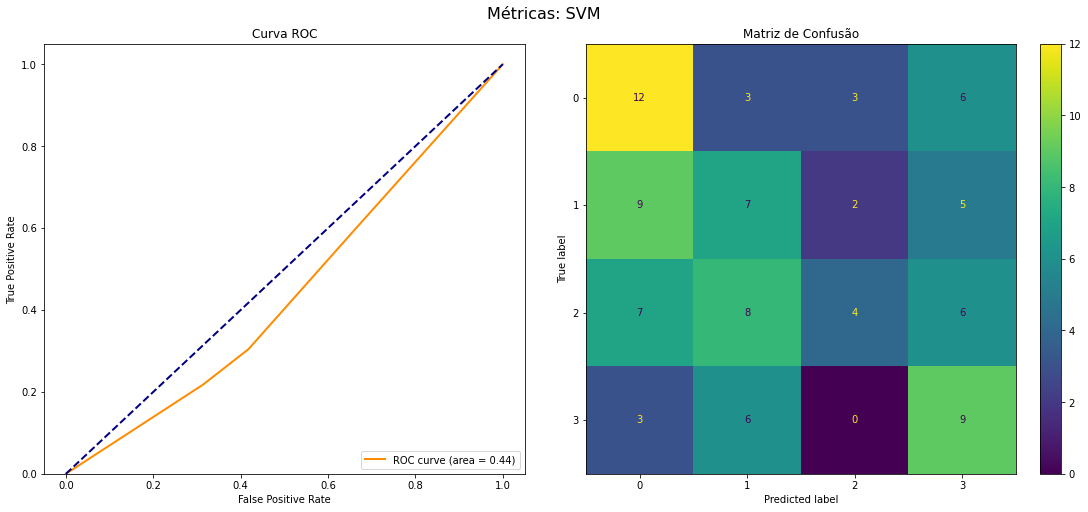

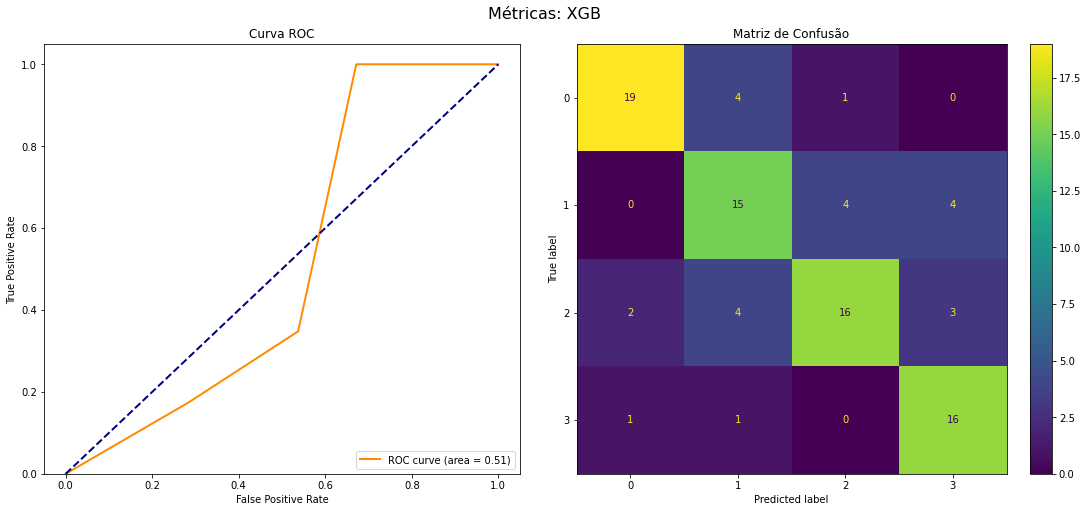

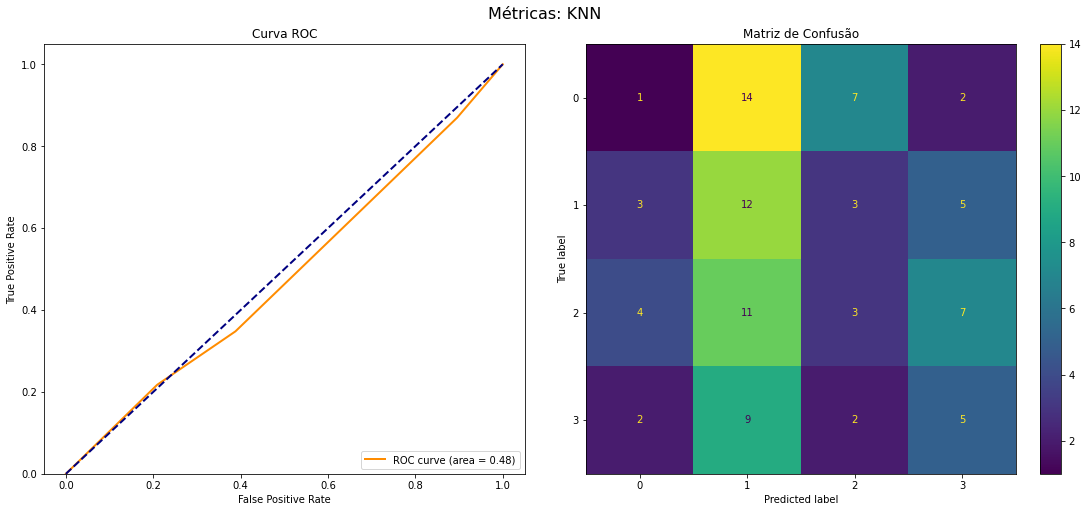

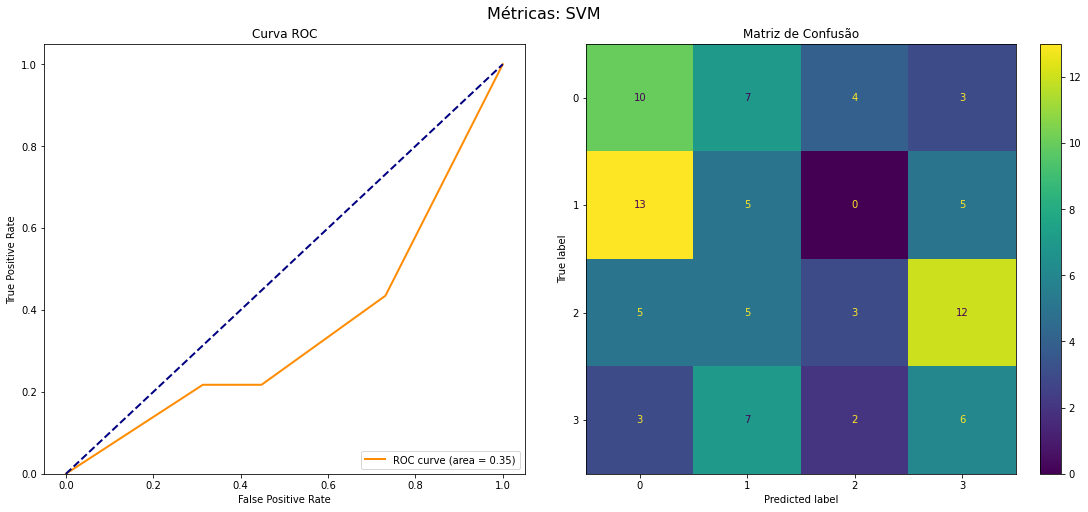

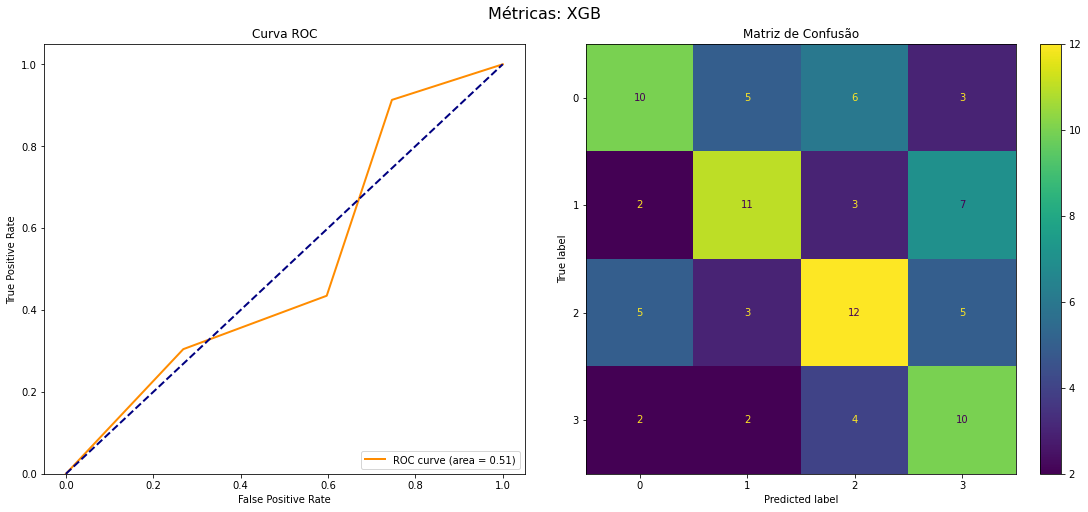

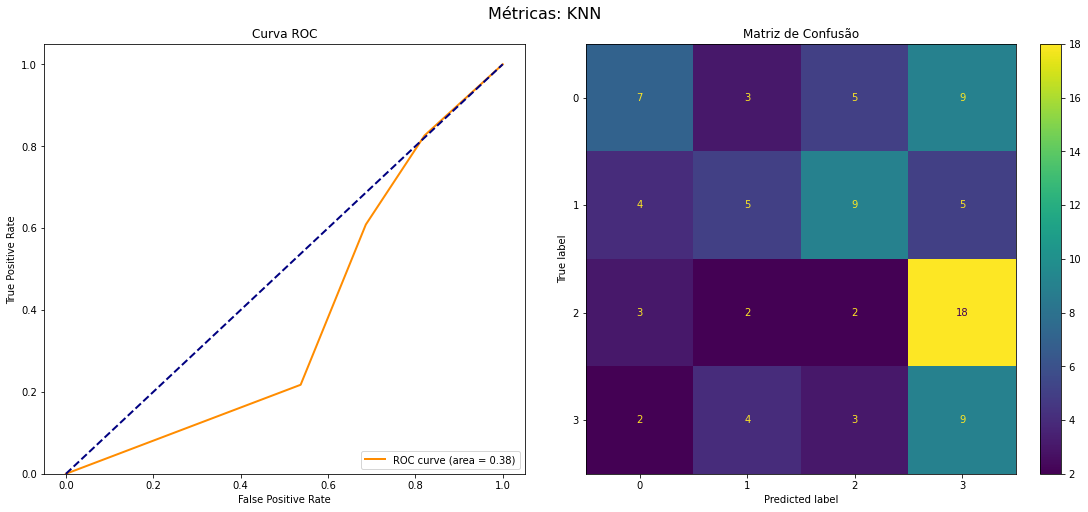

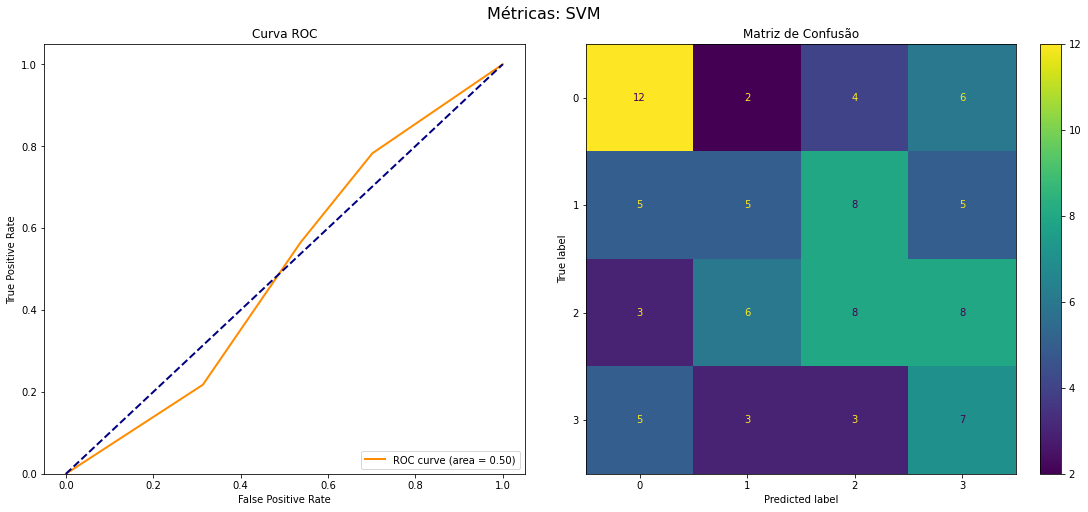

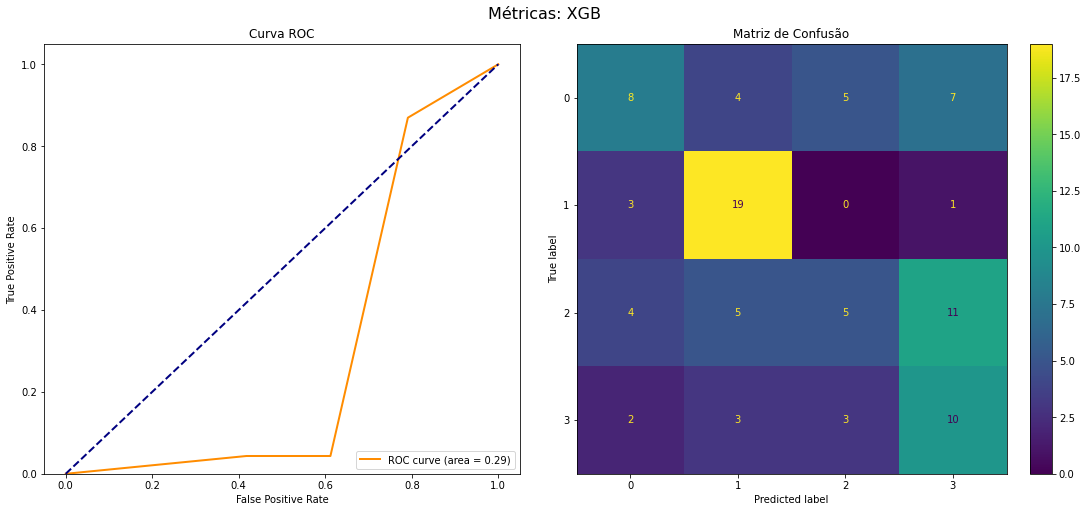

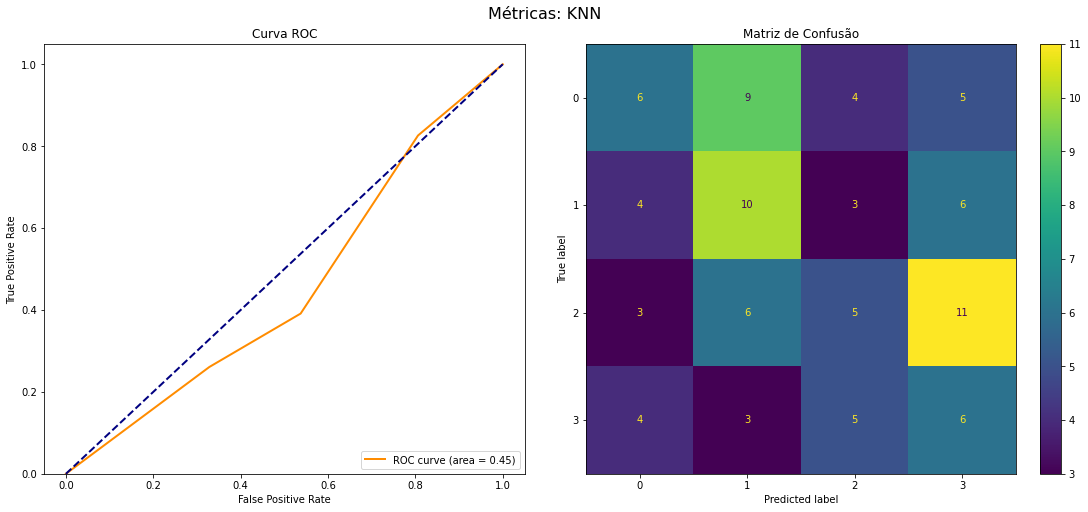

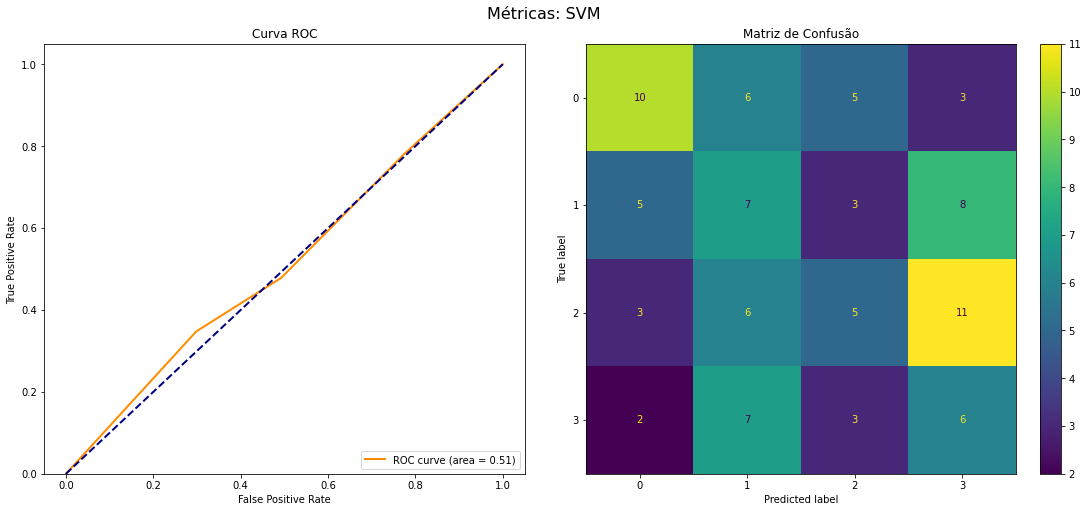

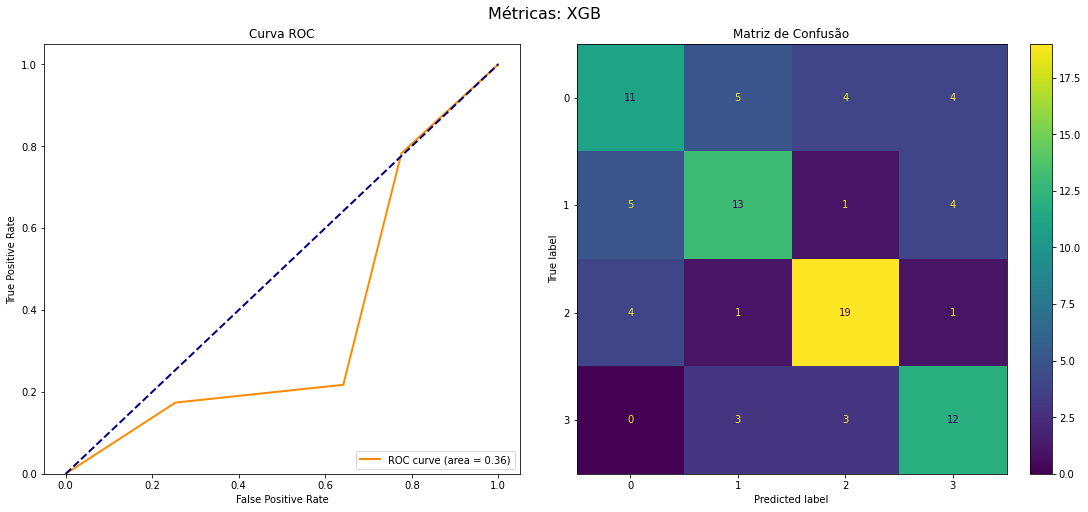

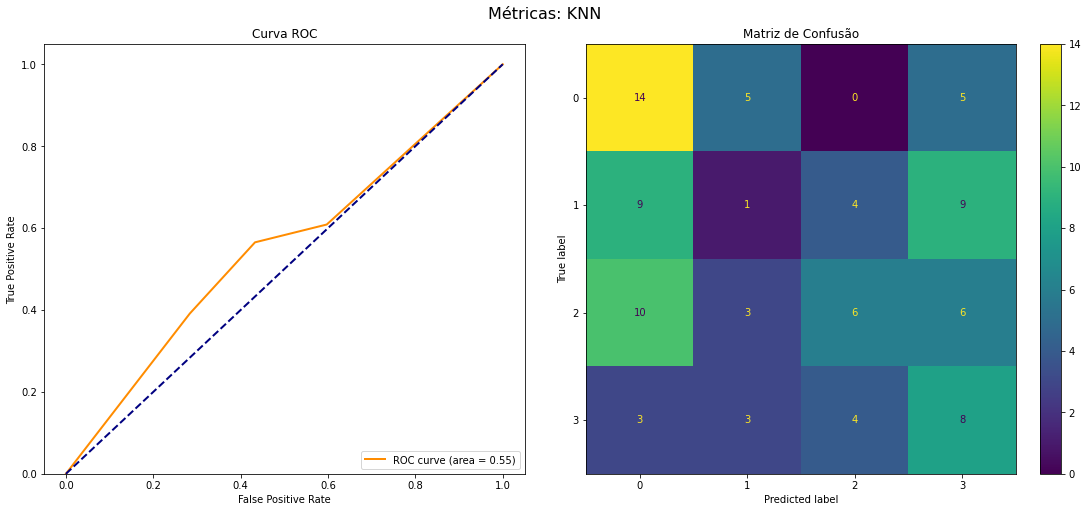

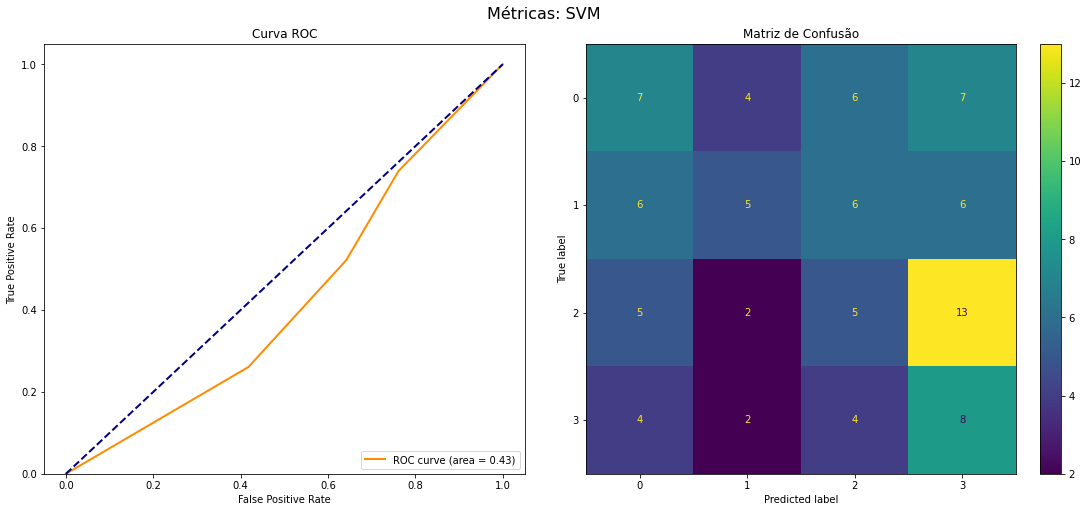

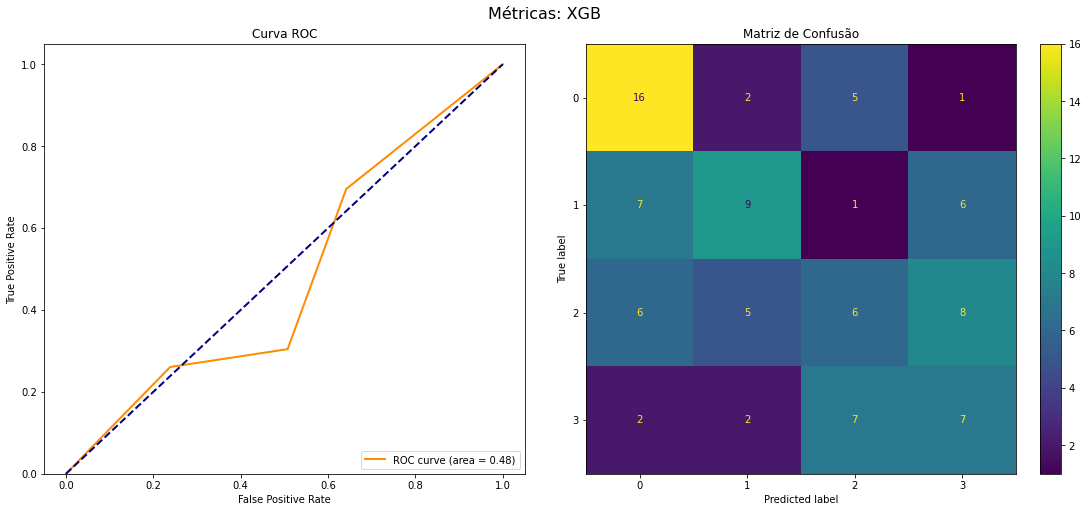

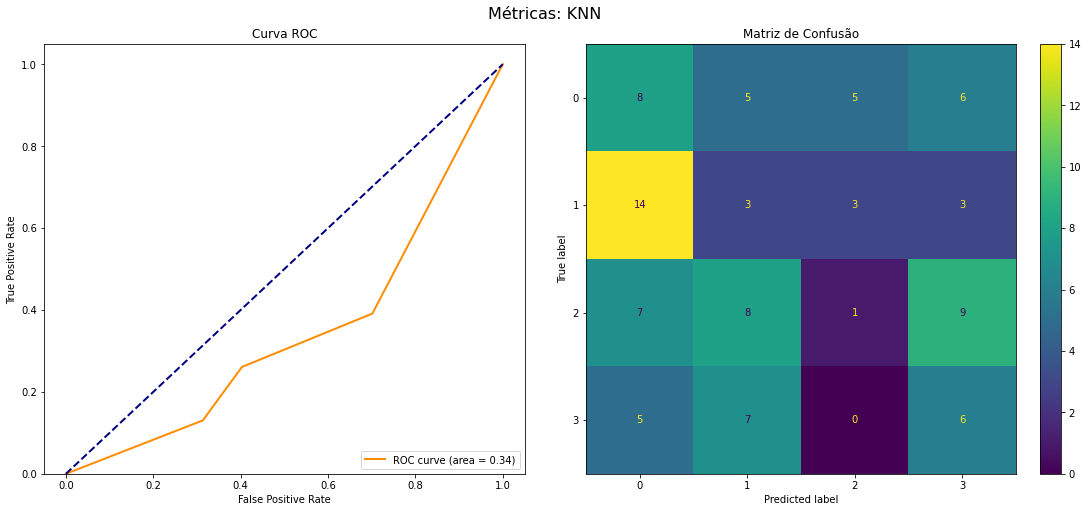

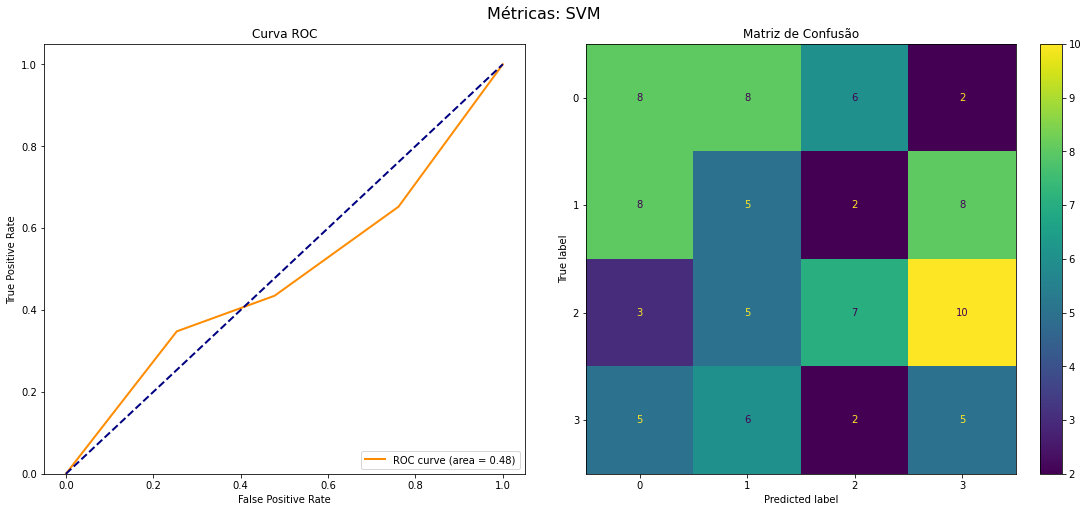

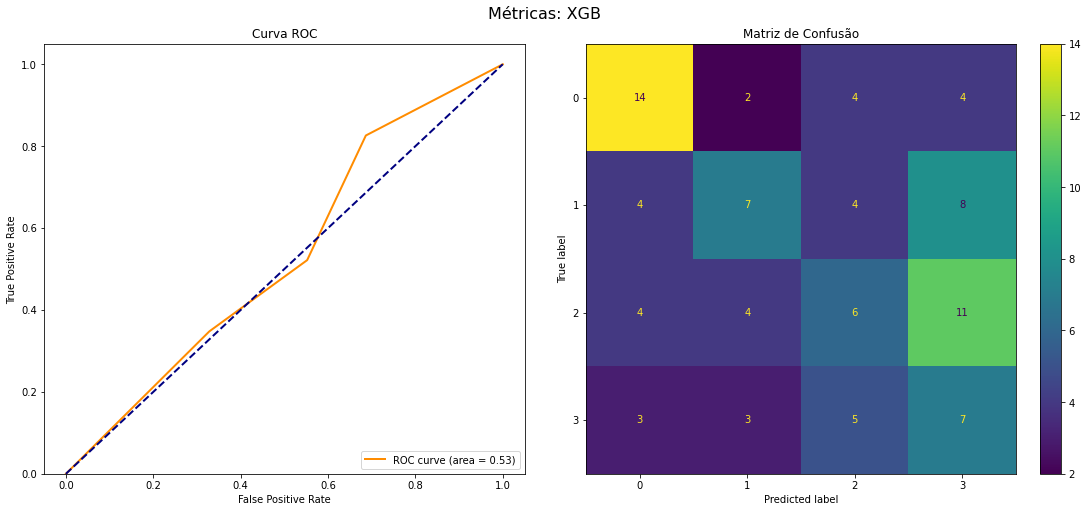

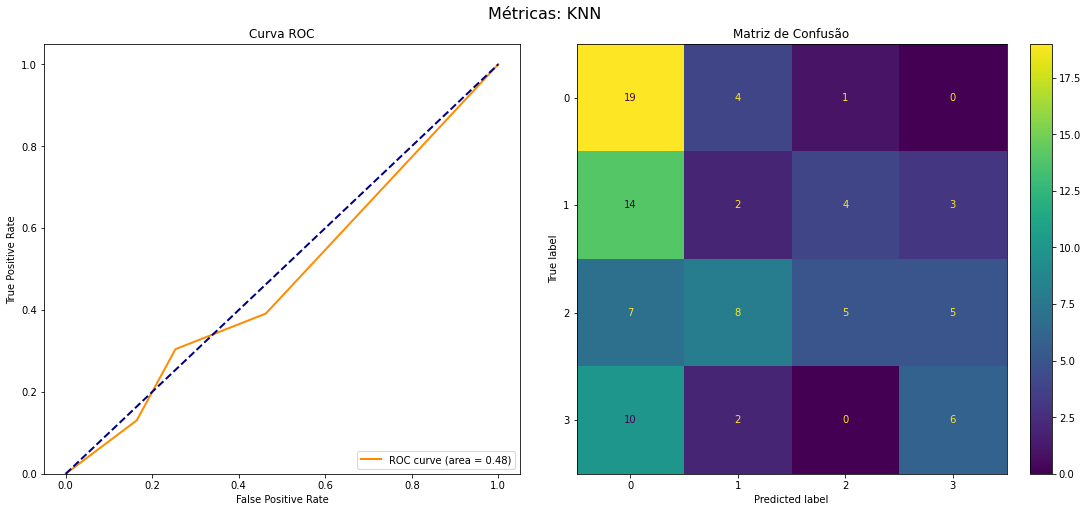

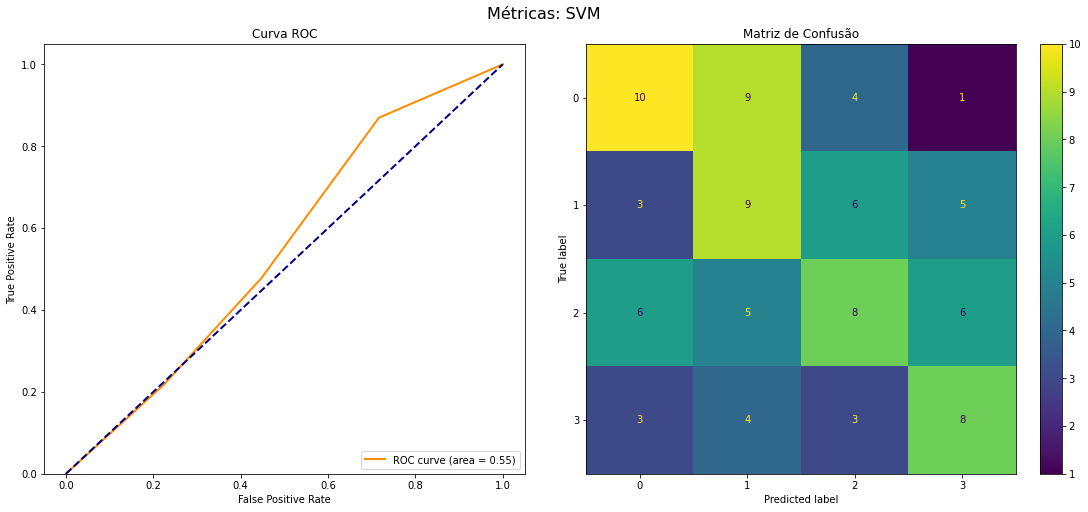

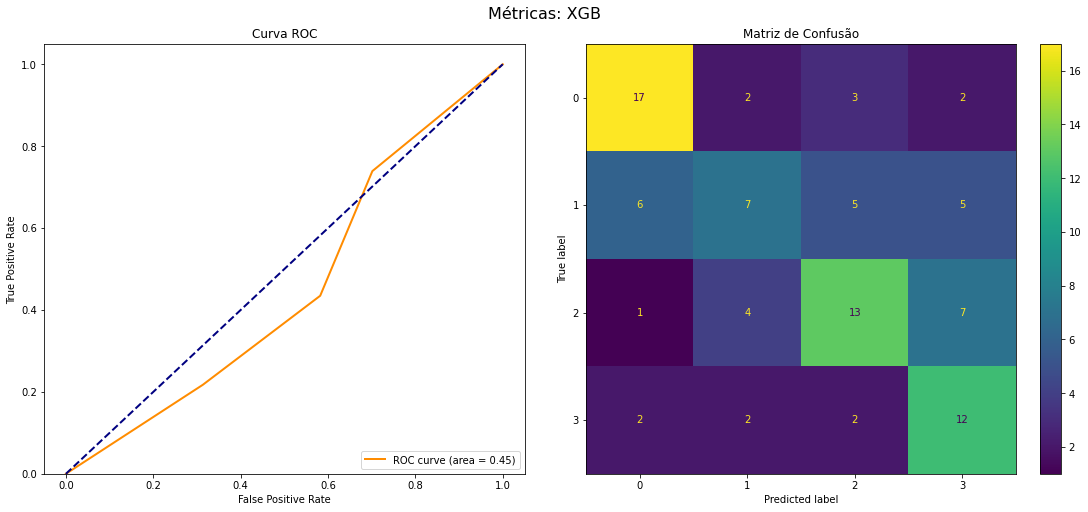

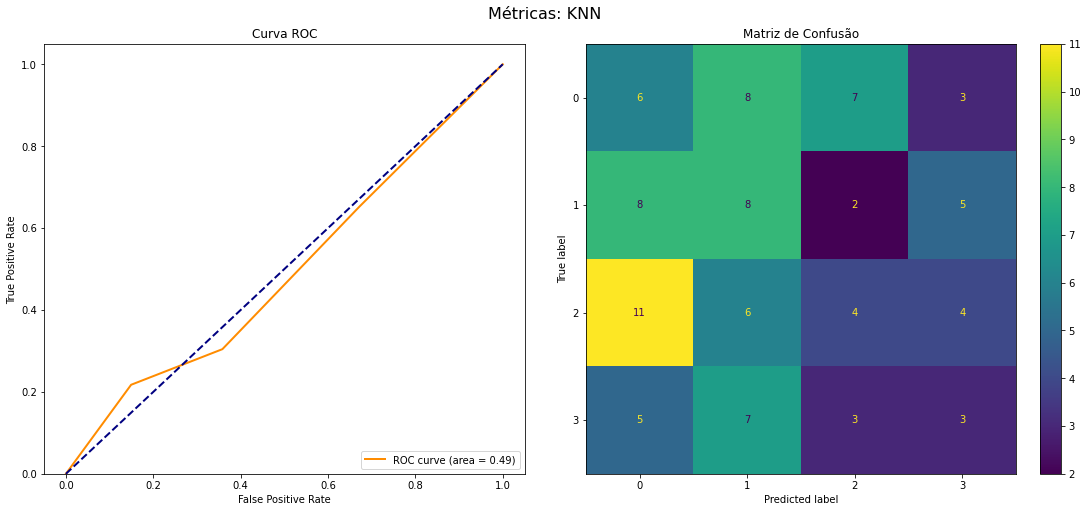

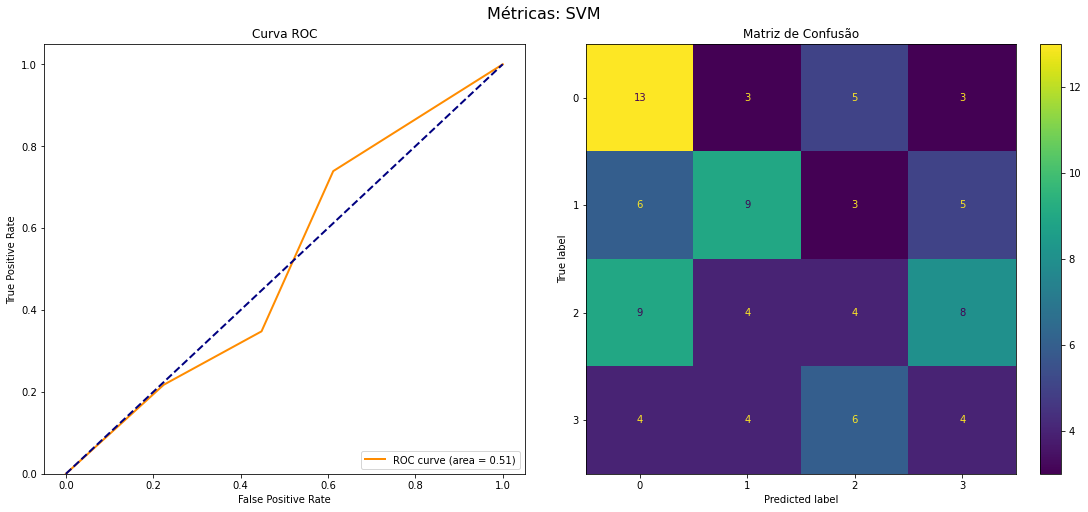

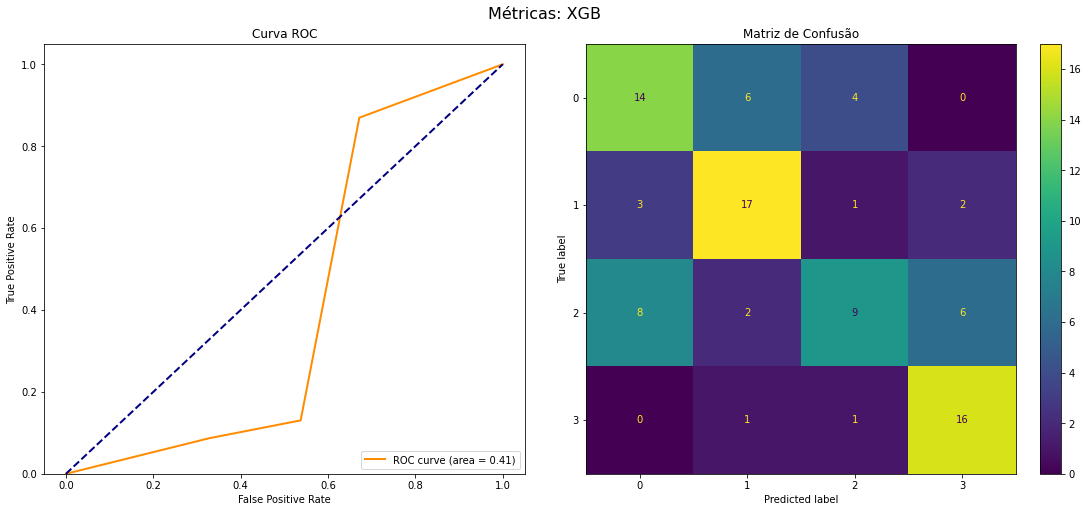

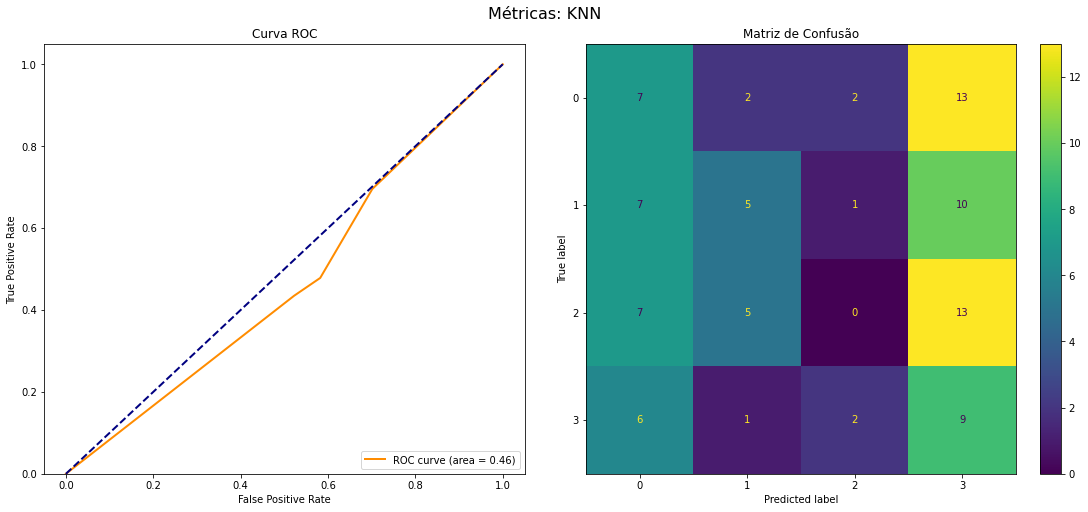

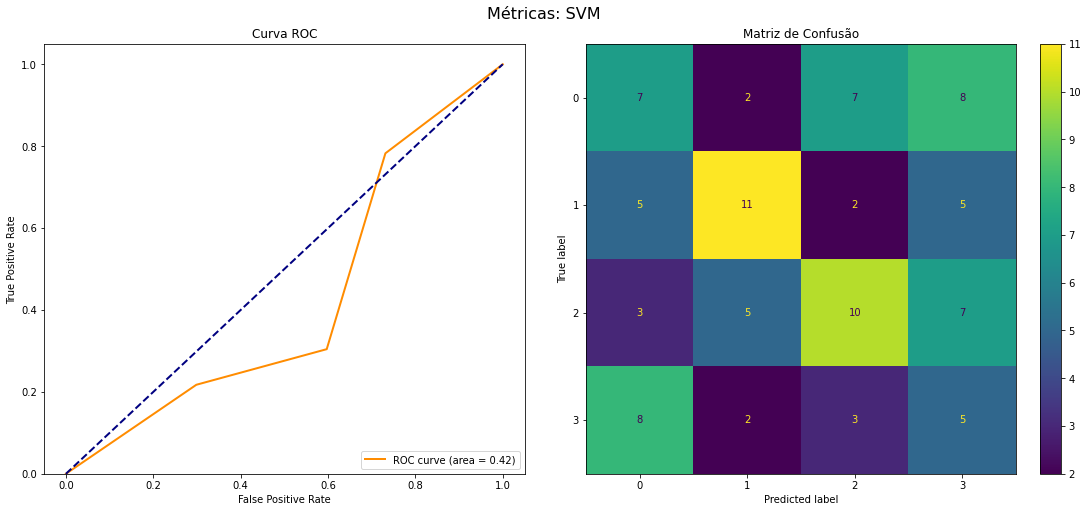

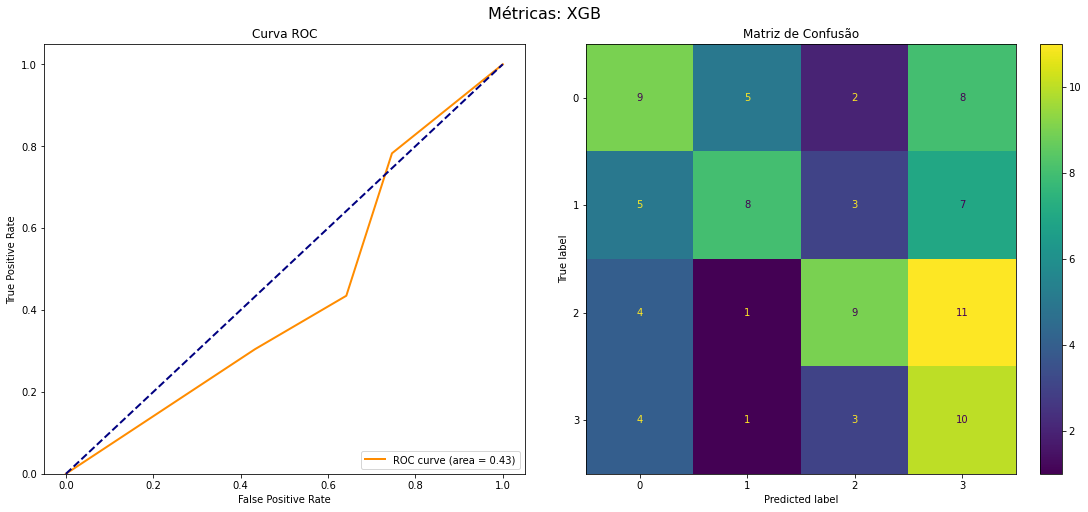

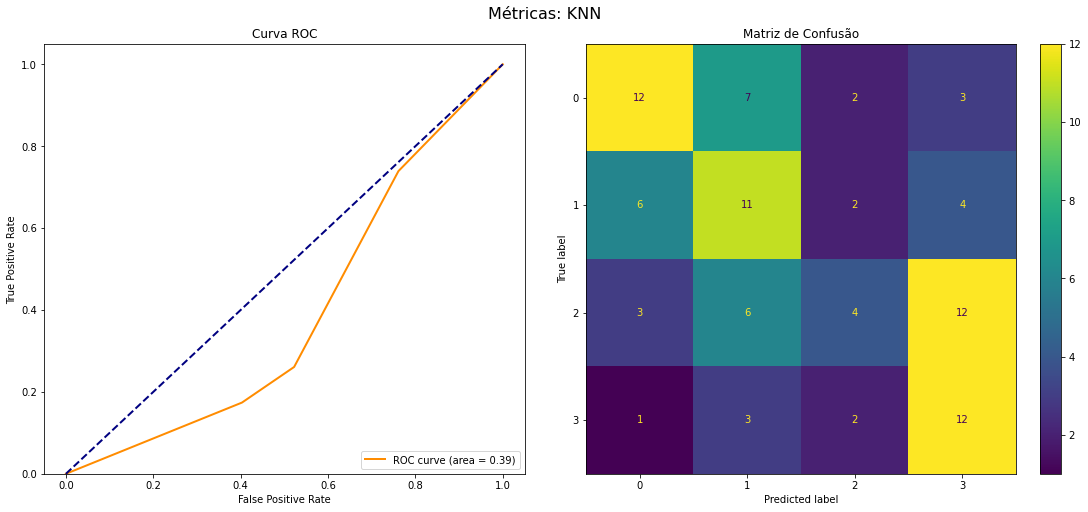

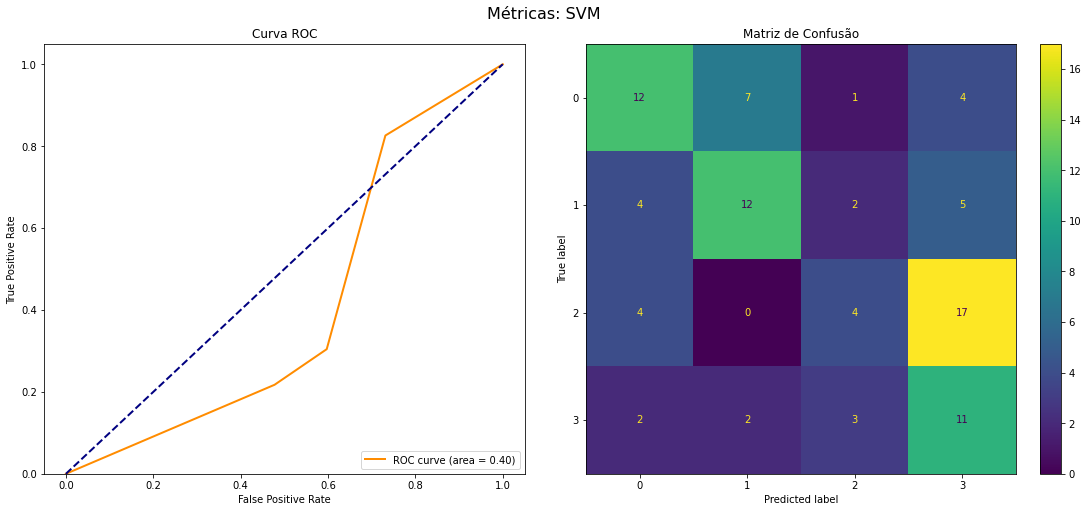

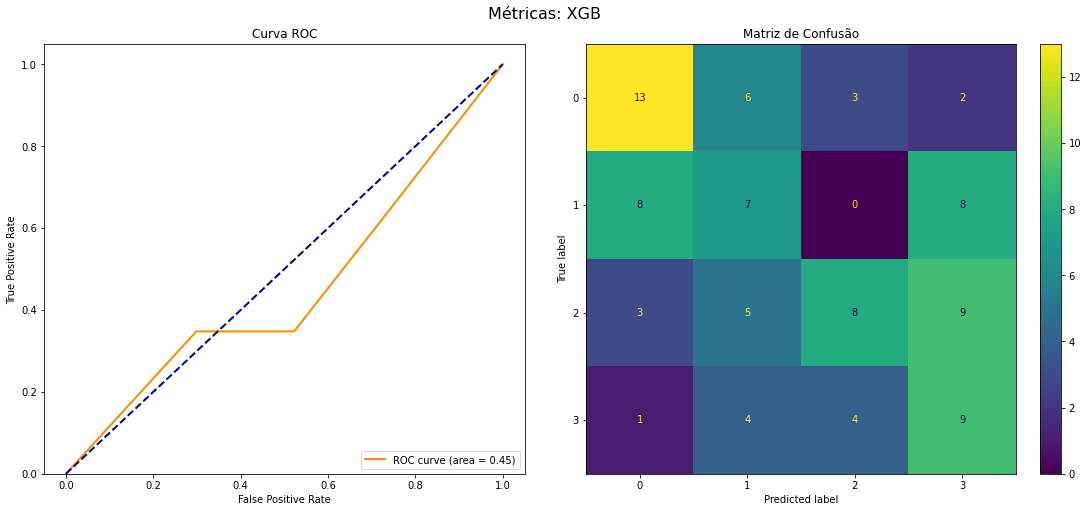

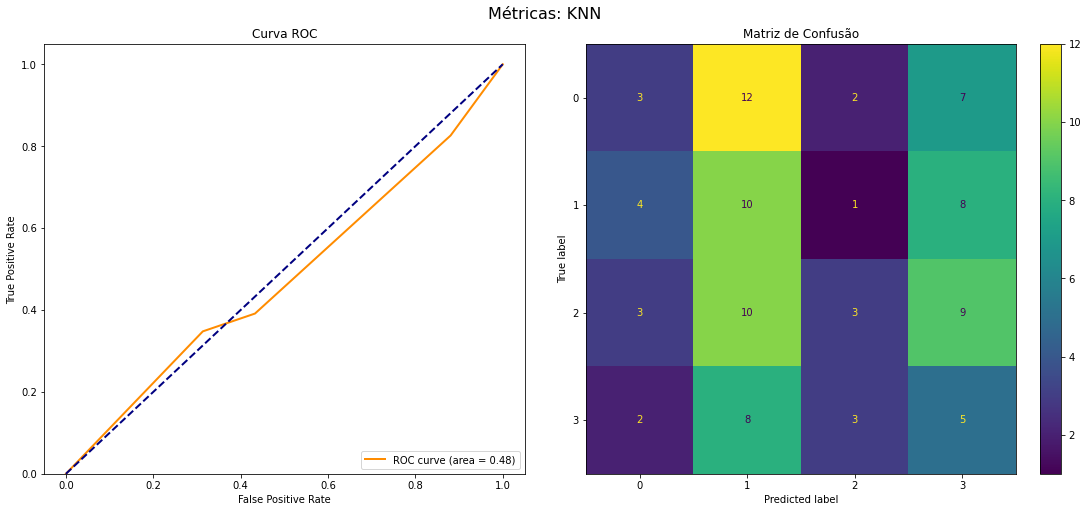

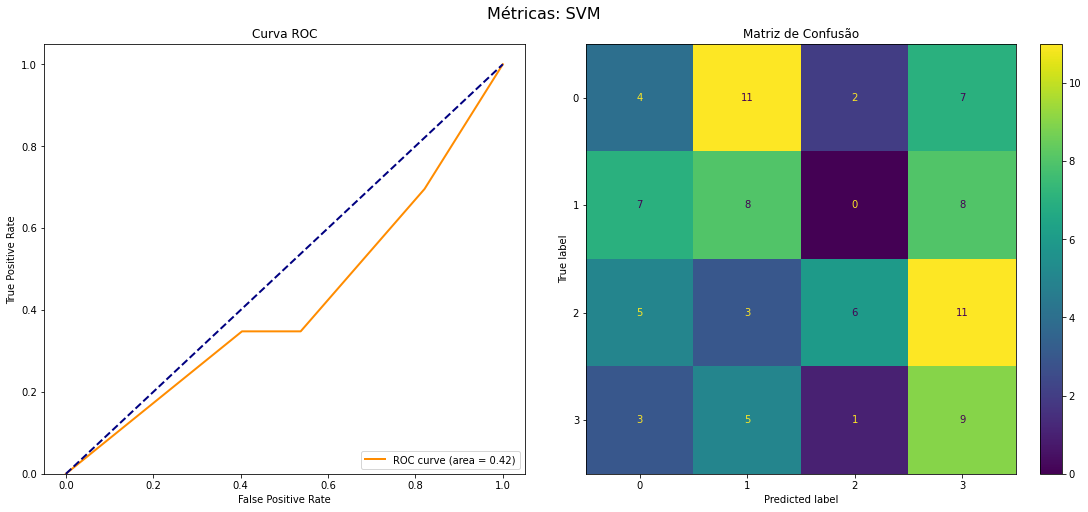

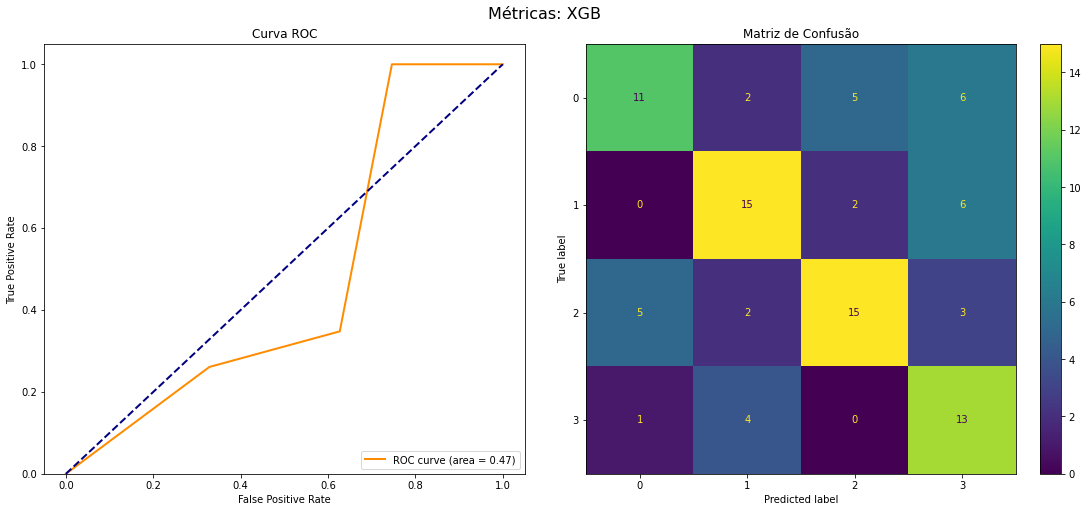

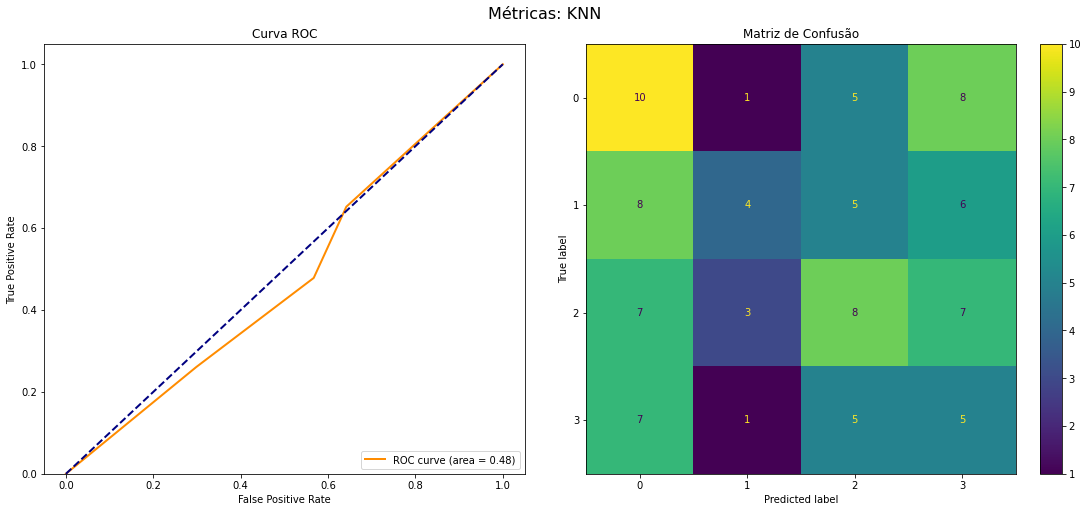

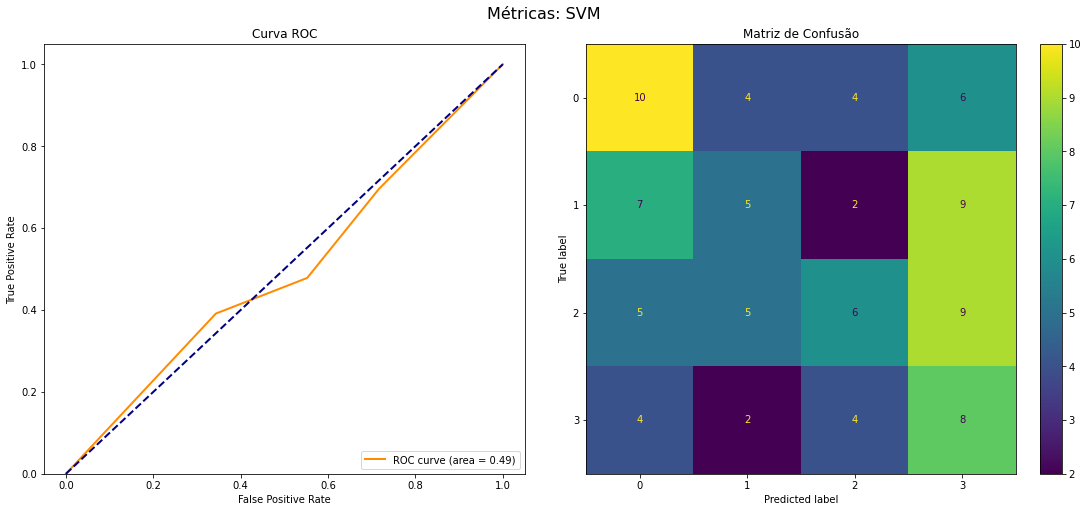

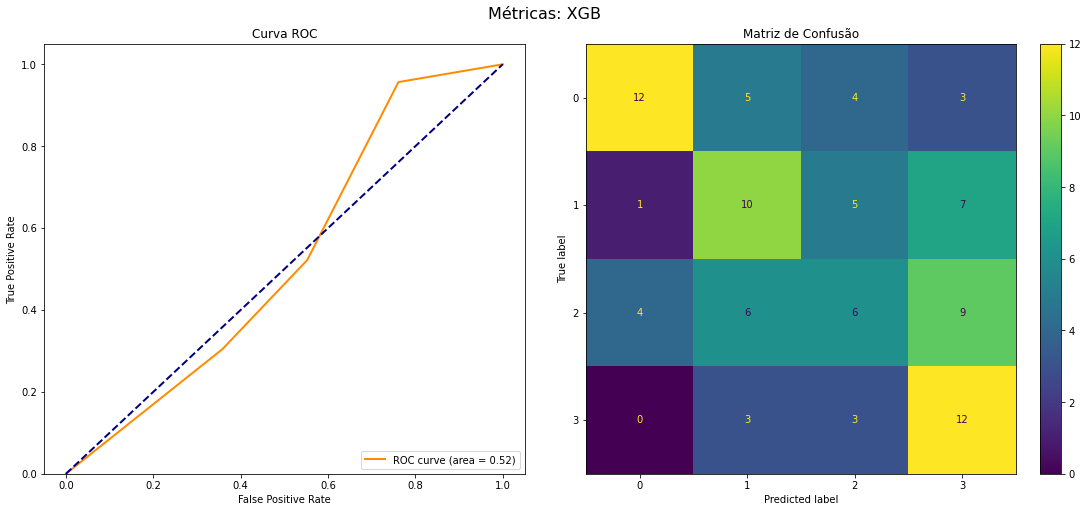

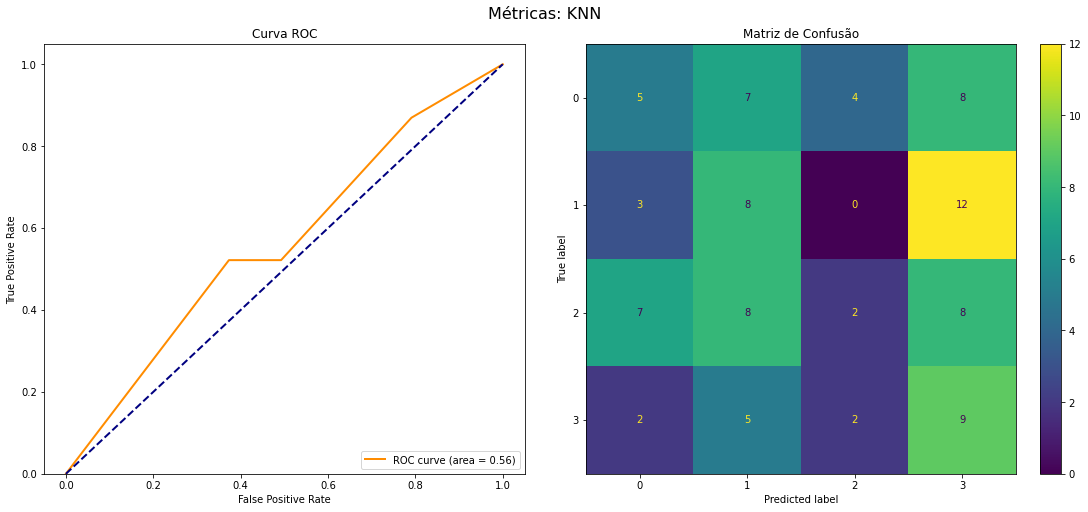

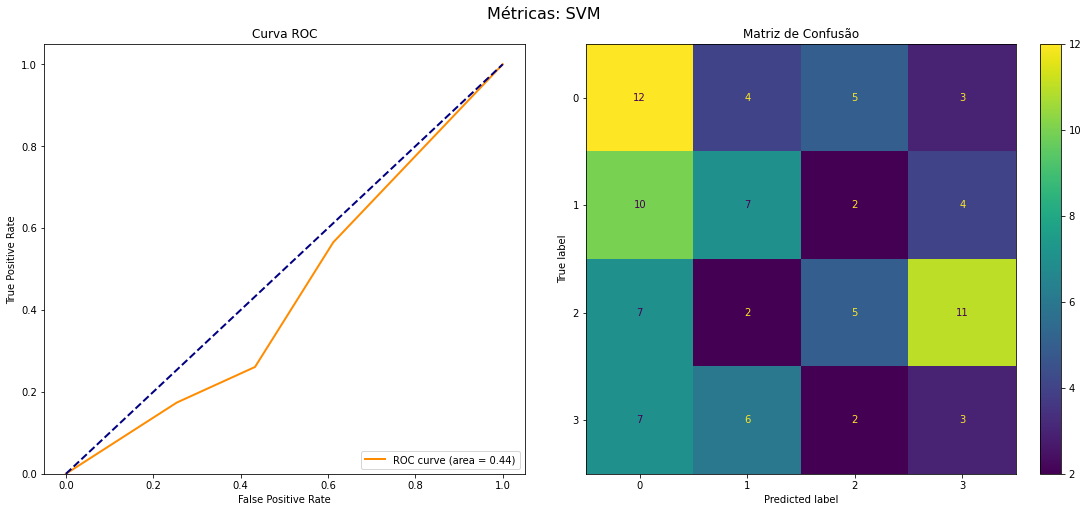

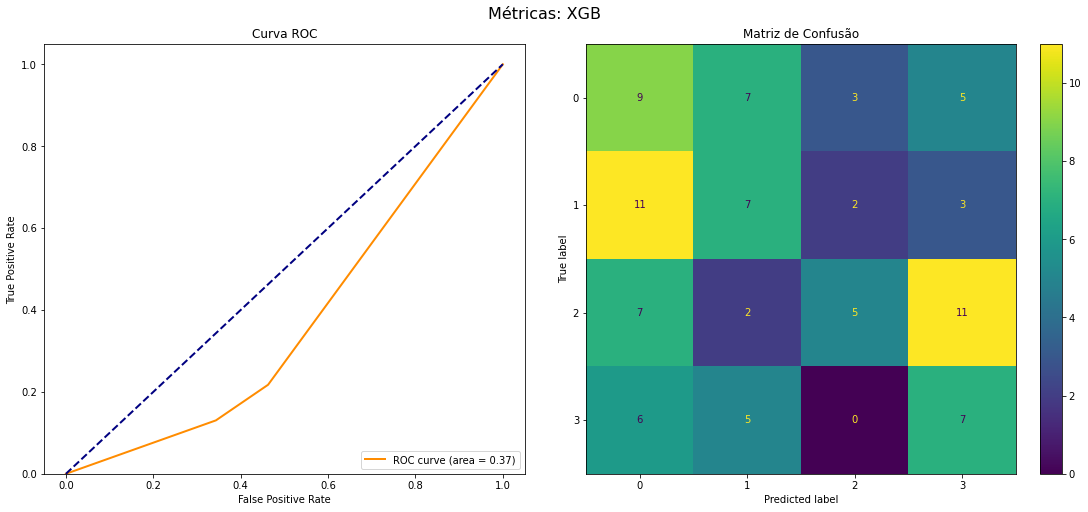

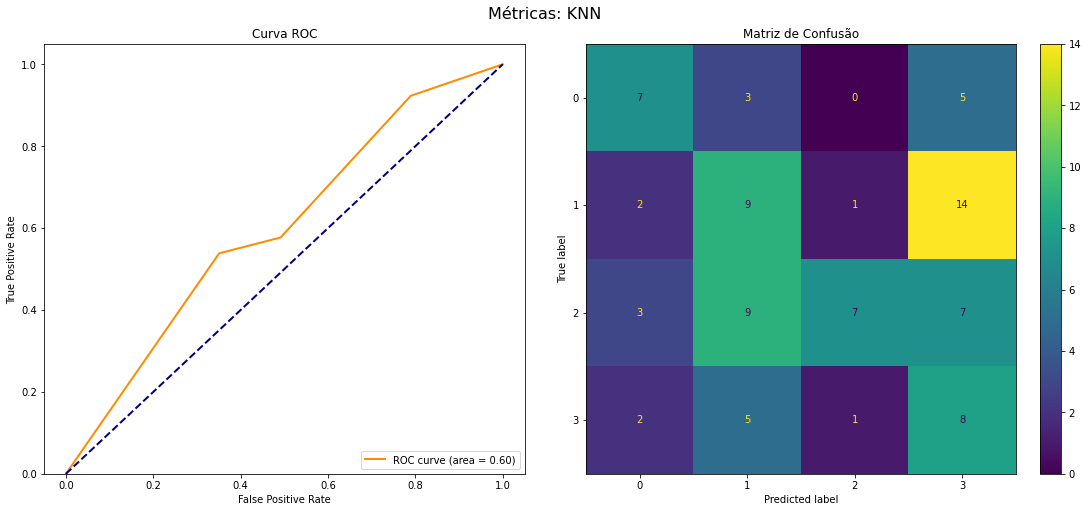

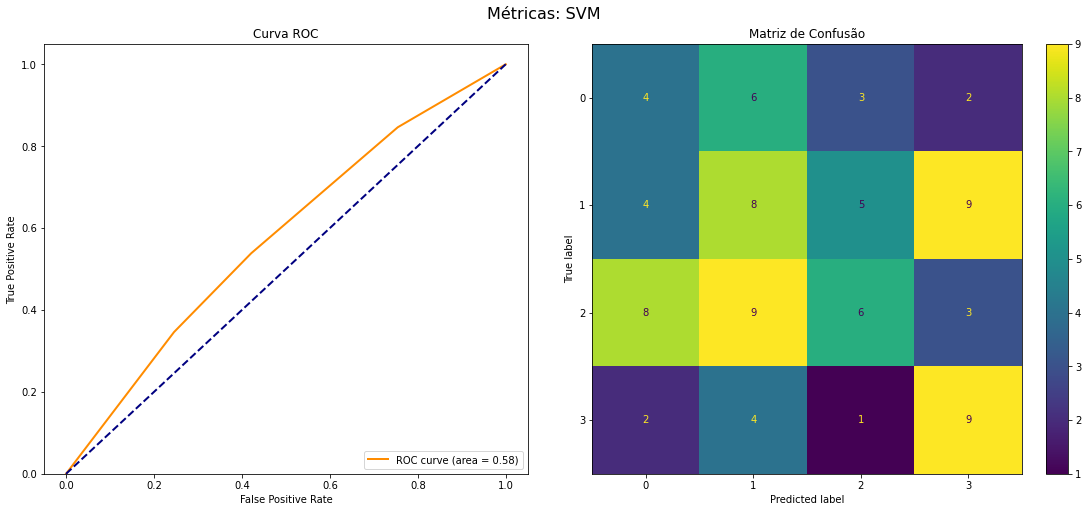

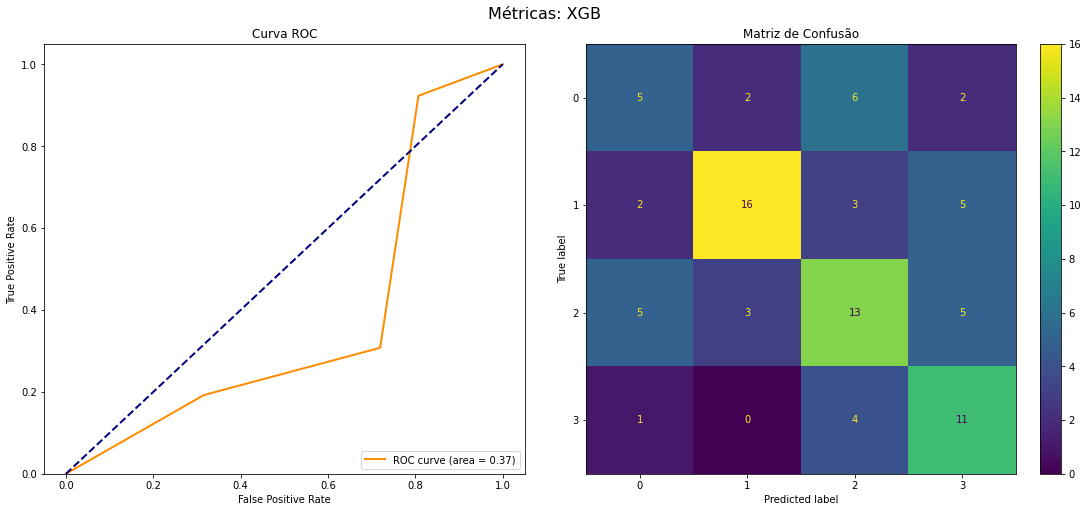

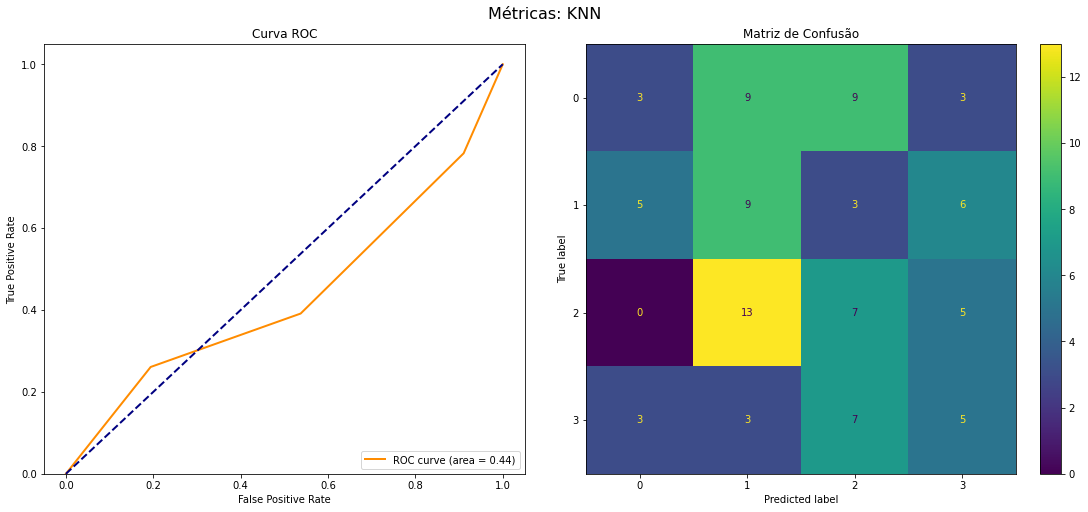

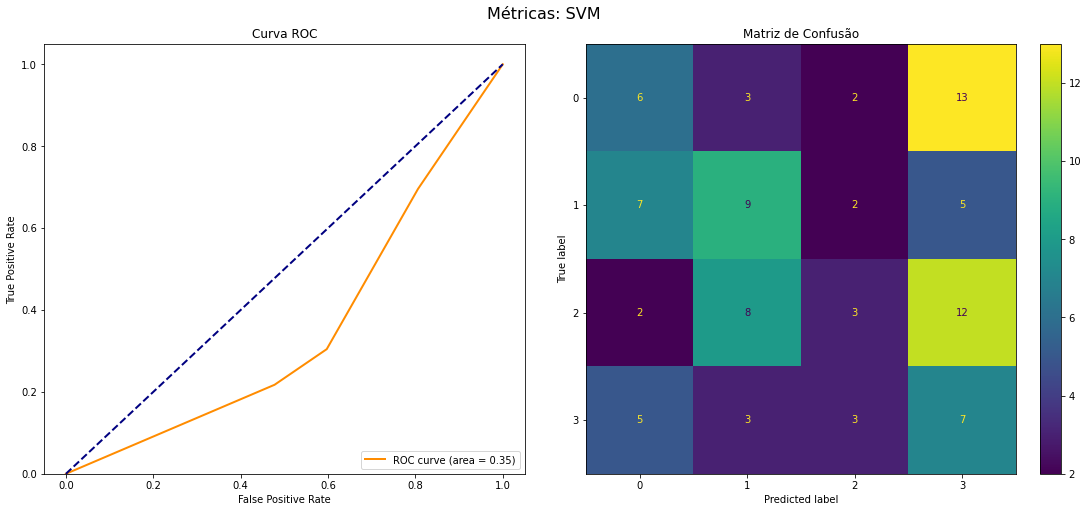

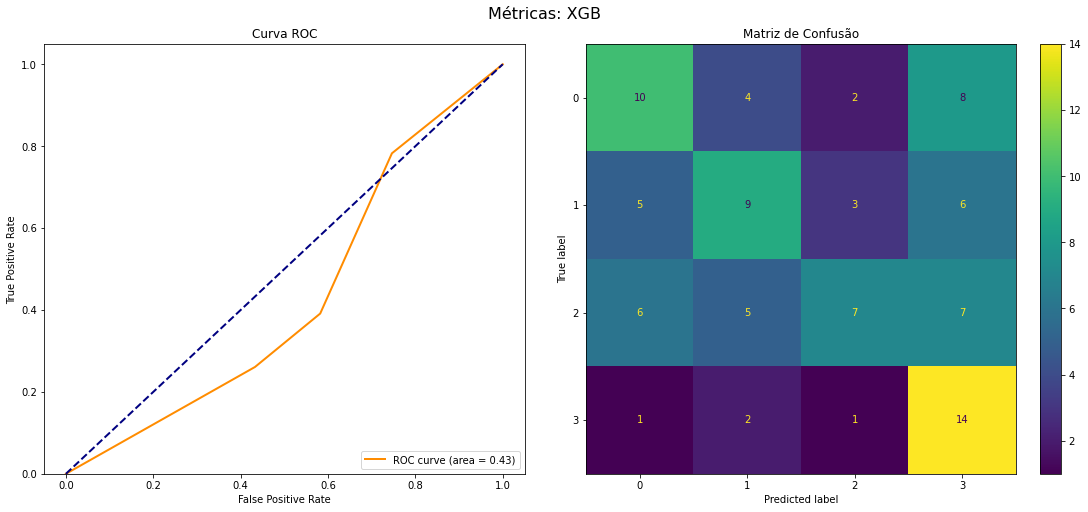

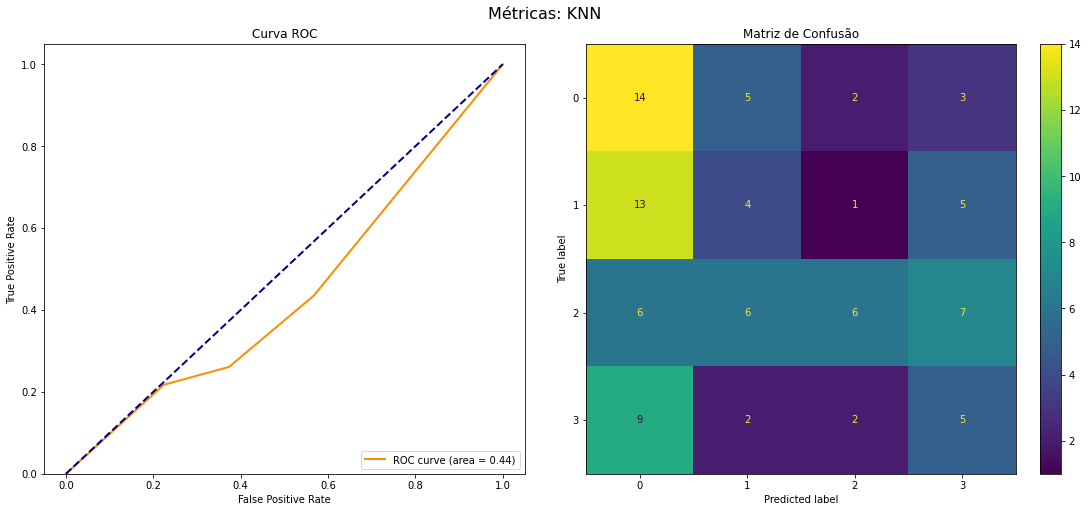

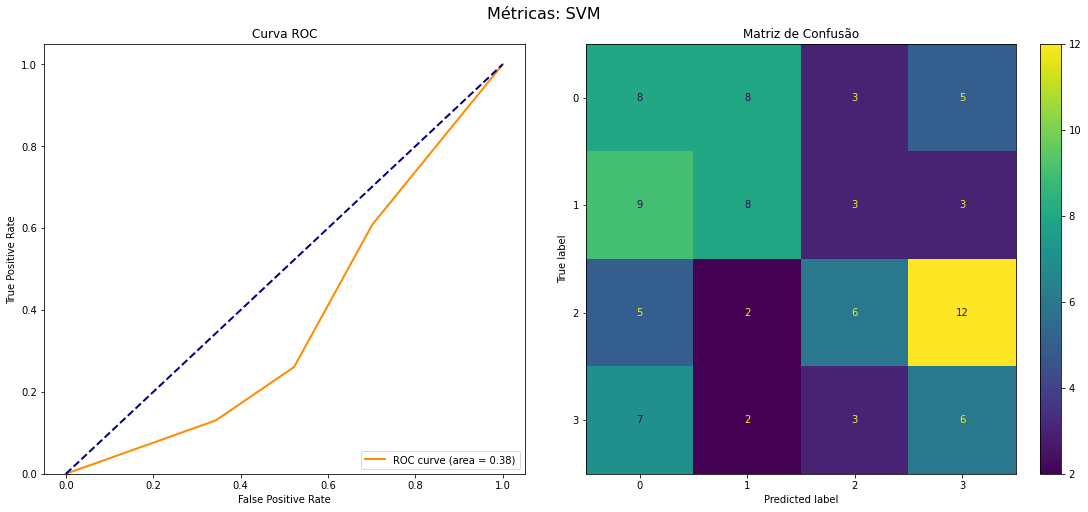

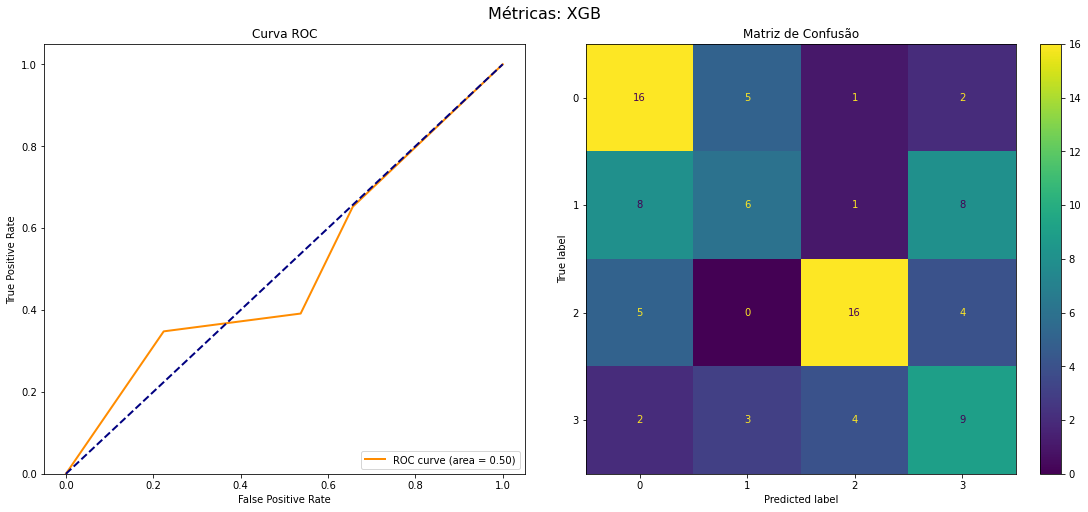

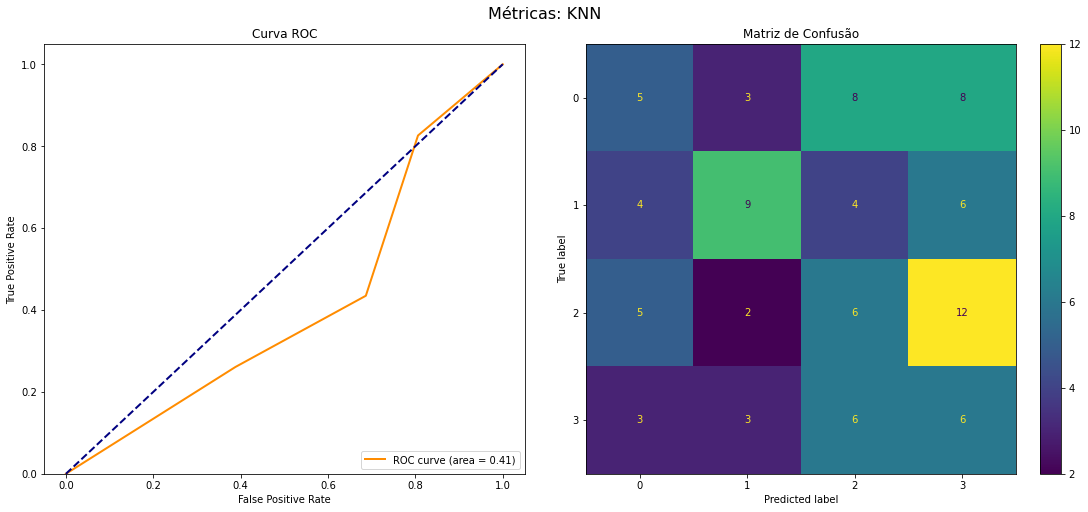

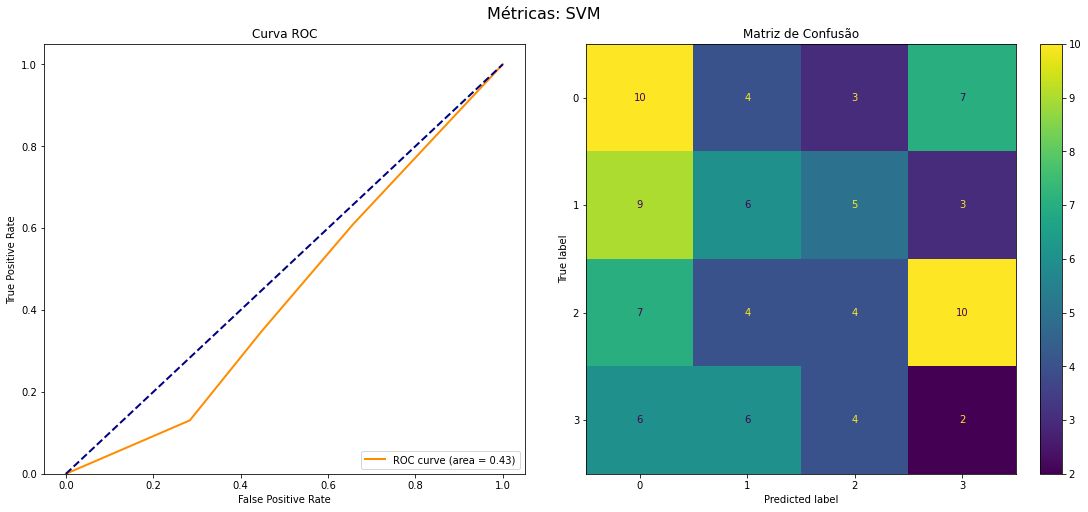

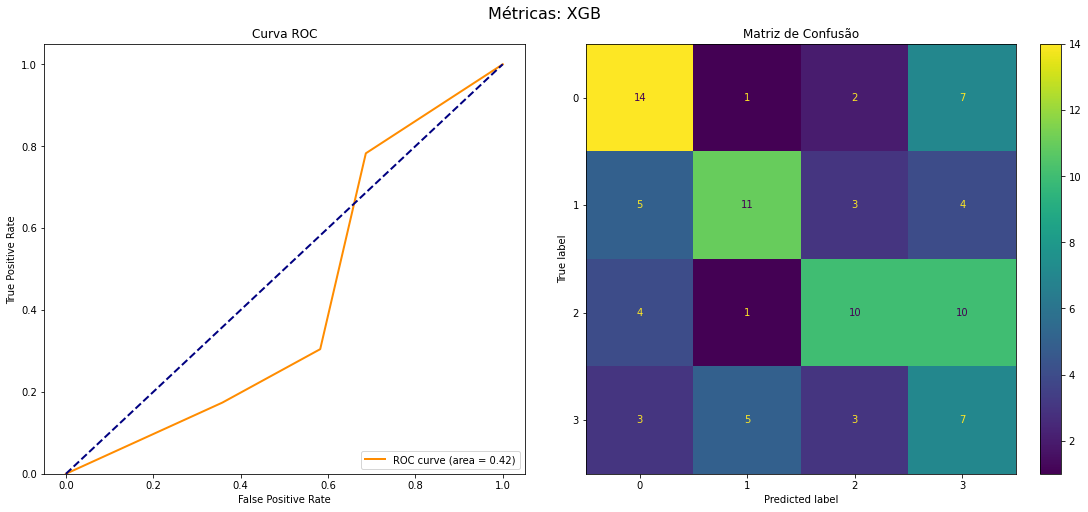

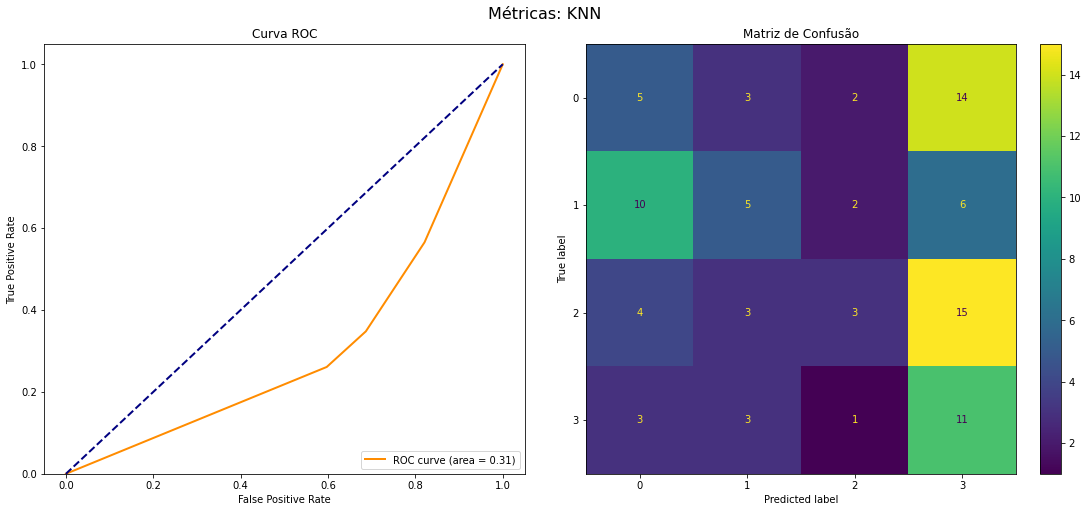

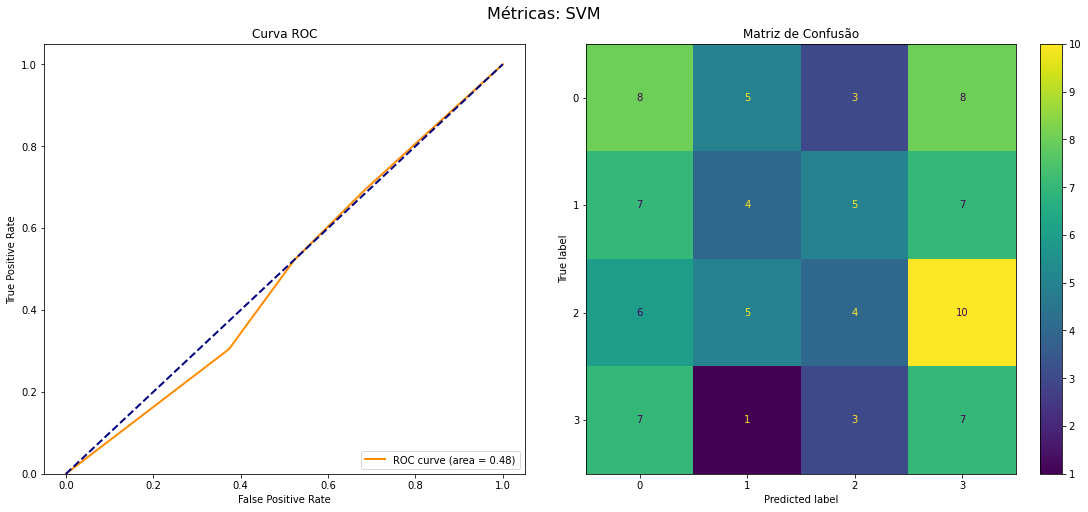

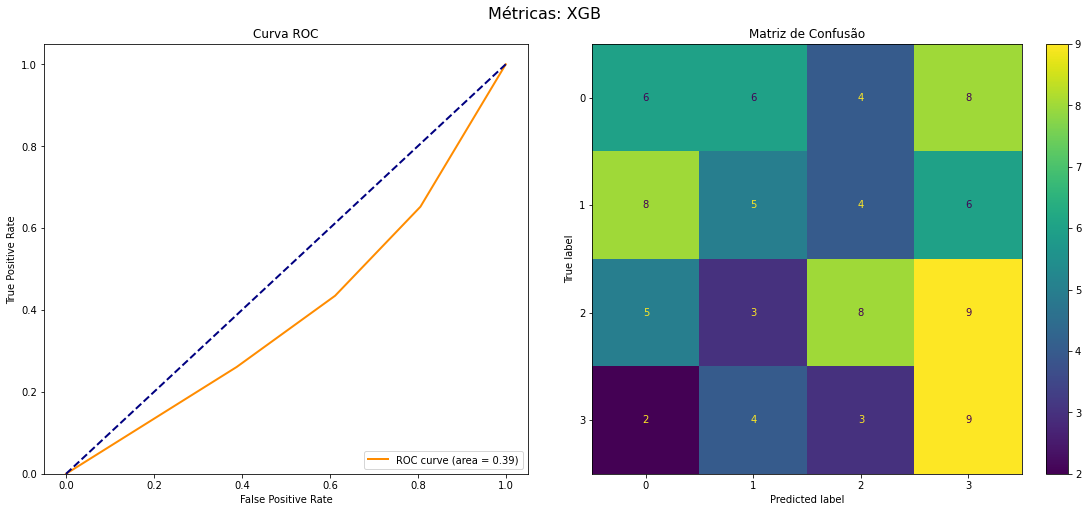

In [11]:
directory = 'C:/Users/Maods/Documents/TCC/data/eeg-motor-movementimagery-dataset/files/'
extension = '**/*.edf'
files = [ file.name for file in Path(directory).glob('**/*') if len(file.name) == 4]
for file in files:
    x_movementimagery, y_movementimagery  = load_eeg_data_edf(directory + file, extension)
    nb_classes = np.unique(y_movementimagery).shape[0]
    if nb_classes != 4 or len(np.shape(x_movementimagery)) < 3:
        continue
    _, channels, samples = np.shape(x_movementimagery)

    binary = len(np.unique(y_movementimagery)) == 2
    run_pipeline(x_movementimagery, y_movementimagery, "eeg-mi", file, metrics_results, fs=160, binary=binary)

In [13]:
result = pd.DataFrame(metrics_results)
result = result.sort_values(['cross_val_score','F1_score'], ascending=False)
result.head(30)

cross_val_score  Accuracy  Precision    Recall  F1_score       auc  \
71             0.722  0.700000   0.694514  0.700000  0.695579  0.451330   
89             0.722  0.633333   0.660601  0.633333  0.634113  0.390655   
53             0.711  0.466667   0.466843  0.466667  0.465214  0.536016   
22             0.690  0.680000   0.680000  0.680000  0.680000  0.679872   
4              0.640  0.740000   0.748995  0.740000  0.736834  0.737895   
110            0.622  0.733333   0.740796  0.733333  0.732745  0.509734   
11             0.620  0.510000   0.510625  0.510000  0.509853  0.510404   
140            0.611  0.600000   0.621467  0.600000  0.600105  0.467878   
3              0.610  0.540000   0.541697  0.540000  0.538894  0.541016   
56             0.600  0.677778   0.724417  0.677778  0.666406  0.354640   
16             0.600  0.510000   0.512750  0.510000  0.505109  0.512005   
119            0.589  0.611111   0.607436  0.611111  0.607056  0.364698   
68             0.589  0.533333   0.580267  0.533333  0.545643  0.332576   
65             0.589  0.533333   0.541239  0.533333  0.533236  0.481830   
50             0.589  0.533333   0.538428  0.533333  0.532817  0.392602   
19             0.580  0.640000   0.642909  0.640000  0.639135  0.641056   
35             0.580  0.513889   0.522396  0.513889  0.513232  0.518648   
9              0.570  0.520000   0.526839  0.520000  0.505813  0.523409   
59             0.567  0.433333   0.409698  0.433333  0.410481  0.486372   
149            0.562  0.542169   0.556999  0.542169  0.543192  0.370783   
18             0.560  0.530000   0.531932  0.530000  0.528351  0.531212   
20             0.560  0.520000   0.522811  0.520000  0.516135  0.521809   
113            0.556  0.477778   0.487547  0.477778  0.478165  0.505516   
14             0.550  0.420000   0.419091  0.420000  0.415330  0.421769   
12             0.540  0.490000   0.490200  0.490000  0.490051  0.489996   
2              0.540  0.474286   0.474919  0.474286  0.474354  0.474510   
0              0.536  0.488571   0.489446  0.488571  0.488526  0.489052   
80             0.533  0.544444   0.563880  0.544444  0.540217  0.368592   
62             0.533  0.500000   0.505213  0.500000  0.495636  0.440623   
17             0.530  0.530000   0.529351  0.530000  0.528347  0.528812   

        kappa  mathew_coef    dataset            subject  \
71   0.599407     0.600397     eeg-mi               S009   
89   0.510547     0.516175     eeg-mi               S018   
53   0.287129     0.287746     eeg-mi               S002   
22   0.359744     0.359744   BCICIV_I  BCICIV_calib_ds1g   
4    0.477702     0.487642   BCICIV_I  BCICIV_calib_ds1a   
110  0.644795     0.647245     eeg-mi               S026   
11   0.020783     0.020821   BCICIV_I  BCICIV_calib_ds1c   
140  0.469635     0.475789     eeg-mi               S037   
3    0.081836     0.082430   BCICIV_I  BCICIV_calib_ds1a   
56   0.575472     0.596127     eeg-mi               S003   
16   0.023904     0.024500   BCICIV_I  BCICIV_calib_ds1e   
119  0.480284     0.481475     eeg-mi               S029   
68   0.378289     0.381872     eeg-mi               S008   
65   0.378085     0.380023     eeg-mi               S007   
50   0.377573     0.379008     eeg-mi               S001   
19   0.281437     0.283477   BCICIV_I  BCICIV_calib_ds1f   
35   0.036697     0.037398  BCICIV_II               A04T   
9    0.046484     0.049775   BCICIV_I  BCICIV_calib_ds1c   
59   0.248403     0.252926     eeg-mi               S004   
149  0.382053     0.384996     eeg-mi               S041   
18   0.062251     0.062867   BCICIV_I  BCICIV_calib_ds1f   
20   0.043444     0.044333   BCICIV_I  BCICIV_calib_ds1f   
113  0.304962     0.306929     eeg-mi               S027   
14  -0.155839    -0.159029   BCICIV_I  BCICIV_calib_ds1d   
12  -0.020000    -0.020004   BCICIV_I  BCICIV_calib_ds1d   
2   -0.050914    -0.050967   BCICIV_I                all   
0   -0.021856    -0.021899   BCICIV_I                all   

In [14]:
result.to_csv('./artifacts/ml_models_results.csv', index=False, header=True)